In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
from torch.utils.data import DataLoader,Dataset

In [2]:
def generate_data(data_size,corruption_percentage):
    dims =50
    #np.random.seed(1234)
    y = np.ones(data_size,dtype="long")
    idx = np.random.uniform(size =data_size)>0.5
    y[idx] = 0 
    print("positive_class",sum(y==1),"negative_class",sum(y==0))
    idx1 = ~idx #positive class indices
    idx2 = idx #negative class indices 

    x = np.zeros((data_size,dims))
    x[idx1,0] = np.random.randn(sum(idx1)) # standard normal
    x[idx2,0] = np.random.randn(sum(idx2)) +10 # normal with mean 10 and standard deviation 1

    x[:,1:] = np.random.uniform(-1,1,size=(data_size,dims-1))
    
    plt.figure(figsize=(8,5))
    plt.hist(x[idx1,0],density=True,label = str(data_size)+"_1 class")  #positive class histogram 

    plt.hist(x[idx2,0],density = True, label = str(data_size)+"_0 class")  #negative class histogram
    plt.xlabel("x1")
    plt.ylabel("probability density")
    plt.legend()
    plt.title("corruption_percentage: "+str(corruption_percentage)+"_Data size: "+str(data_size)+"_histogram")
    
    #corruption_percentage = 0.5
    noise_indices = np.random.randint(low =0 ,high = data_size,size = int(corruption_percentage*data_size))
    print(noise_indices.shape)
    a = np.array(y)
    #print("true",a[mask])
    print(noise_indices)
    
    
    
    print("a",sum(a[noise_indices]==1) ,sum(a[noise_indices]==0))
    
    a[noise_indices] = np.logical_not(a[noise_indices])
    
    print("a",sum(a[noise_indices]==1) ,sum(a[noise_indices]==0))
    
    y = list(a)
    
    return x,y,noise_indices

In [3]:
def accuracy( a, b):
    length = a.shape
    #print(a,"dfgfg",length)
    correct = a==b
    return sum(correct)/length


In [4]:
class Synthetic_data(Dataset):
    def __init__(self,x,y):
        super(Synthetic_data,self).__init__()
        self.x = x
        self.y = y
    
    
    def __len__(self):
        return(len(self.y))
    
    
    def __getitem__(self,idx):
        return self.x[idx,:],self.y[idx]

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.linear1 = nn.Linear(50,16)
        self.linear2 = nn.Linear(16,2)
#         self.linear3 = nn.Linear(128,64)
#         self.linear4 = nn.Linear(64,2)
    def forward(self,x):
        x =  F.relu(self.linear1(x))
        x =  self.linear2(x)
#         x = F.relu(self.linear3(x))
#         x = self.linear4(x)
        return x

positive_class 5062 negative_class 4938
(100,)
[1550 6227 9051 8818 5925 9349  988 2499 5140 8147 4652 5371 3530 5284
 8950 4031  706 8807 7472 6463 3007 7877 3697 9144 9093 3864 9247 7776
 8258 6723 5644 5908 9618 2572 3543 3073 3109 3652 8325 9745 2724 8211
 6261 3751 5958 8364 7657 3097 7564 2599 1210 2529 9190 8136 5475 7839
 3364  260 9538 6171 1178 2882 1152 4473 6070 1185 2955 2876 8788 1356
 7834 5003 2967 7363 4552 7090  192 6240 2816 1995 6055 3997 2172 4715
 3206 4660 2215 5037 8291  391 9490 1047 9487 3740 7388 9124 2597 4251
 2875 9538]
a 51 49
a 49 51


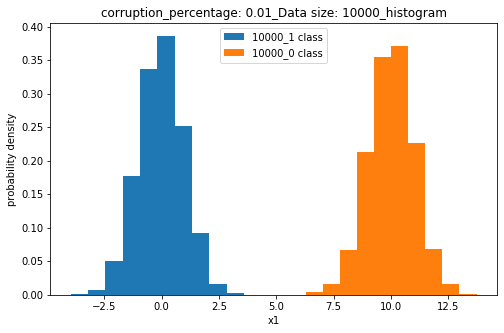

In [242]:
 x,y,noise_indices = generate_data(data_size=10000, corruption_percentage= 0.01)   # 1 means 100% noise

positive_class 456 negative_class 544
(0,)
[]
a 0 0
a 0 0


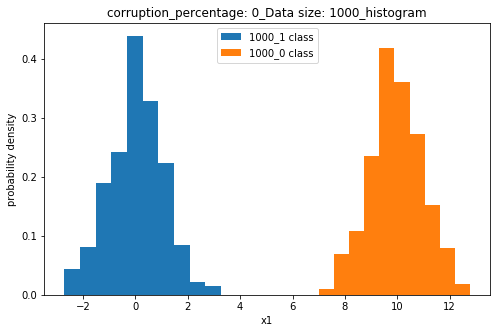

In [243]:
x_test,y_test,noise_test = generate_data(data_size= 1000, corruption_percentage= 0)
#print(sum(mask))
data_set = Synthetic_data(x,y)
test_set = Synthetic_data(x_test,y_test)

In [244]:
data_set = Synthetic_data(x,y)
test_set = Synthetic_data(x_test,y_test)

In [245]:
trainloader = DataLoader(data_set,batch_size=20,shuffle=False)
testloader = DataLoader(test_set,batch_size=20,shuffle=False)
net = Net().double()

In [246]:
def train(net,data_loader,epochs):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(),lr =0.01)
    
    for epoch in range(epochs):
        running_loss = 0.0
        cnt = 0 
        for i,data in enumerate(data_loader):
            x_input ,targets = data
            #true.append(targets.cpu().numpy())
            optimizer.zero_grad()

            outputs = net(x_input)
            #out.append(outputs.cpu())

            _, predicted = torch.max(outputs, 1)
            #pred.append(predicted.cpu().numpy())
            loss = criterion(outputs,targets)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()

            if cnt % 4 == 3:    # print every 50 mini-batches
                print('[%d, %5d] loss: %.3f' %(epoch + 1, cnt + 1, running_loss / 4))
                running_loss = 0.0
            cnt=cnt+1
    return net,criterion

In [247]:
net,criterion = train(net,trainloader,500)

[1,     4] loss: 0.726
[1,     8] loss: 0.616
[1,    12] loss: 0.589
[1,    16] loss: 0.564
[1,    20] loss: 0.573
[1,    24] loss: 0.553
[1,    28] loss: 0.531
[1,    32] loss: 0.505
[1,    36] loss: 0.542
[1,    40] loss: 0.435
[1,    44] loss: 0.474
[1,    48] loss: 0.449
[1,    52] loss: 0.501
[1,    56] loss: 0.509
[1,    60] loss: 0.453
[1,    64] loss: 0.430
[1,    68] loss: 0.415
[1,    72] loss: 0.421
[1,    76] loss: 0.394
[1,    80] loss: 0.393
[1,    84] loss: 0.423
[1,    88] loss: 0.422
[1,    92] loss: 0.350
[1,    96] loss: 0.338
[1,   100] loss: 0.382
[1,   104] loss: 0.430
[1,   108] loss: 0.343
[1,   112] loss: 0.327
[1,   116] loss: 0.353
[1,   120] loss: 0.223
[1,   124] loss: 0.282
[1,   128] loss: 0.379
[1,   132] loss: 0.379
[1,   136] loss: 0.275
[1,   140] loss: 0.282
[1,   144] loss: 0.321
[1,   148] loss: 0.372
[1,   152] loss: 0.364
[1,   156] loss: 0.313
[1,   160] loss: 0.273
[1,   164] loss: 0.340
[1,   168] loss: 0.273
[1,   172] loss: 0.272
[1,   176] 

[3,   476] loss: 0.112
[3,   480] loss: 0.078
[3,   484] loss: 0.099
[3,   488] loss: 0.083
[3,   492] loss: 0.032
[3,   496] loss: 0.033
[3,   500] loss: 0.034
[4,     4] loss: 0.036
[4,     8] loss: 0.026
[4,    12] loss: 0.100
[4,    16] loss: 0.078
[4,    20] loss: 0.077
[4,    24] loss: 0.033
[4,    28] loss: 0.036
[4,    32] loss: 0.032
[4,    36] loss: 0.080
[4,    40] loss: 0.026
[4,    44] loss: 0.035
[4,    48] loss: 0.034
[4,    52] loss: 0.077
[4,    56] loss: 0.082
[4,    60] loss: 0.196
[4,    64] loss: 0.082
[4,    68] loss: 0.084
[4,    72] loss: 0.030
[4,    76] loss: 0.031
[4,    80] loss: 0.080
[4,    84] loss: 0.043
[4,    88] loss: 0.037
[4,    92] loss: 0.030
[4,    96] loss: 0.030
[4,   100] loss: 0.082
[4,   104] loss: 0.036
[4,   108] loss: 0.030
[4,   112] loss: 0.107
[4,   116] loss: 0.035
[4,   120] loss: 0.021
[4,   124] loss: 0.026
[4,   128] loss: 0.147
[4,   132] loss: 0.155
[4,   136] loss: 0.036
[4,   140] loss: 0.067
[4,   144] loss: 0.176
[4,   148] 

[6,   444] loss: 0.097
[6,   448] loss: 0.084
[6,   452] loss: 0.017
[6,   456] loss: 0.124
[6,   460] loss: 0.156
[6,   464] loss: 0.063
[6,   468] loss: 0.060
[6,   472] loss: 0.016
[6,   476] loss: 0.108
[6,   480] loss: 0.071
[6,   484] loss: 0.087
[6,   488] loss: 0.071
[6,   492] loss: 0.019
[6,   496] loss: 0.019
[6,   500] loss: 0.019
[7,     4] loss: 0.019
[7,     8] loss: 0.014
[7,    12] loss: 0.089
[7,    16] loss: 0.075
[7,    20] loss: 0.058
[7,    24] loss: 0.018
[7,    28] loss: 0.020
[7,    32] loss: 0.017
[7,    36] loss: 0.073
[7,    40] loss: 0.015
[7,    44] loss: 0.019
[7,    48] loss: 0.019
[7,    52] loss: 0.071
[7,    56] loss: 0.068
[7,    60] loss: 0.204
[7,    64] loss: 0.074
[7,    68] loss: 0.073
[7,    72] loss: 0.016
[7,    76] loss: 0.018
[7,    80] loss: 0.077
[7,    84] loss: 0.026
[7,    88] loss: 0.020
[7,    92] loss: 0.016
[7,    96] loss: 0.016
[7,   100] loss: 0.070
[7,   104] loss: 0.019
[7,   108] loss: 0.017
[7,   112] loss: 0.113
[7,   116] 

[9,   448] loss: 0.081
[9,   452] loss: 0.014
[9,   456] loss: 0.120
[9,   460] loss: 0.160
[9,   464] loss: 0.064
[9,   468] loss: 0.060
[9,   472] loss: 0.013
[9,   476] loss: 0.108
[9,   480] loss: 0.070
[9,   484] loss: 0.085
[9,   488] loss: 0.068
[9,   492] loss: 0.015
[9,   496] loss: 0.016
[9,   500] loss: 0.015
[10,     4] loss: 0.015
[10,     8] loss: 0.011
[10,    12] loss: 0.089
[10,    16] loss: 0.075
[10,    20] loss: 0.052
[10,    24] loss: 0.015
[10,    28] loss: 0.016
[10,    32] loss: 0.014
[10,    36] loss: 0.071
[10,    40] loss: 0.012
[10,    44] loss: 0.015
[10,    48] loss: 0.015
[10,    52] loss: 0.071
[10,    56] loss: 0.065
[10,    60] loss: 0.211
[10,    64] loss: 0.073
[10,    68] loss: 0.069
[10,    72] loss: 0.013
[10,    76] loss: 0.014
[10,    80] loss: 0.076
[10,    84] loss: 0.021
[10,    88] loss: 0.015
[10,    92] loss: 0.012
[10,    96] loss: 0.013
[10,   100] loss: 0.066
[10,   104] loss: 0.015
[10,   108] loss: 0.013
[10,   112] loss: 0.116
[10,  

[12,   412] loss: 0.060
[12,   416] loss: 0.130
[12,   420] loss: 0.132
[12,   424] loss: 0.018
[12,   428] loss: 0.016
[12,   432] loss: 0.011
[12,   436] loss: 0.013
[12,   440] loss: 0.071
[12,   444] loss: 0.104
[12,   448] loss: 0.079
[12,   452] loss: 0.012
[12,   456] loss: 0.119
[12,   460] loss: 0.161
[12,   464] loss: 0.065
[12,   468] loss: 0.060
[12,   472] loss: 0.011
[12,   476] loss: 0.108
[12,   480] loss: 0.069
[12,   484] loss: 0.085
[12,   488] loss: 0.067
[12,   492] loss: 0.014
[12,   496] loss: 0.014
[12,   500] loss: 0.014
[13,     4] loss: 0.013
[13,     8] loss: 0.010
[13,    12] loss: 0.091
[13,    16] loss: 0.074
[13,    20] loss: 0.049
[13,    24] loss: 0.014
[13,    28] loss: 0.014
[13,    32] loss: 0.013
[13,    36] loss: 0.070
[13,    40] loss: 0.011
[13,    44] loss: 0.014
[13,    48] loss: 0.014
[13,    52] loss: 0.071
[13,    56] loss: 0.064
[13,    60] loss: 0.215
[13,    64] loss: 0.073
[13,    68] loss: 0.067
[13,    72] loss: 0.012
[13,    76] loss

[15,   424] loss: 0.017
[15,   428] loss: 0.015
[15,   432] loss: 0.011
[15,   436] loss: 0.012
[15,   440] loss: 0.070
[15,   444] loss: 0.106
[15,   448] loss: 0.076
[15,   452] loss: 0.012
[15,   456] loss: 0.118
[15,   460] loss: 0.161
[15,   464] loss: 0.065
[15,   468] loss: 0.061
[15,   472] loss: 0.011
[15,   476] loss: 0.108
[15,   480] loss: 0.068
[15,   484] loss: 0.084
[15,   488] loss: 0.066
[15,   492] loss: 0.014
[15,   496] loss: 0.013
[15,   500] loss: 0.013
[16,     4] loss: 0.012
[16,     8] loss: 0.010
[16,    12] loss: 0.092
[16,    16] loss: 0.073
[16,    20] loss: 0.048
[16,    24] loss: 0.013
[16,    28] loss: 0.014
[16,    32] loss: 0.012
[16,    36] loss: 0.069
[16,    40] loss: 0.011
[16,    44] loss: 0.013
[16,    48] loss: 0.013
[16,    52] loss: 0.071
[16,    56] loss: 0.064
[16,    60] loss: 0.218
[16,    64] loss: 0.072
[16,    68] loss: 0.066
[16,    72] loss: 0.011
[16,    76] loss: 0.012
[16,    80] loss: 0.075
[16,    84] loss: 0.018
[16,    88] loss

[18,   440] loss: 0.068
[18,   444] loss: 0.107
[18,   448] loss: 0.075
[18,   452] loss: 0.011
[18,   456] loss: 0.116
[18,   460] loss: 0.161
[18,   464] loss: 0.066
[18,   468] loss: 0.061
[18,   472] loss: 0.010
[18,   476] loss: 0.107
[18,   480] loss: 0.068
[18,   484] loss: 0.084
[18,   488] loss: 0.065
[18,   492] loss: 0.014
[18,   496] loss: 0.013
[18,   500] loss: 0.013
[19,     4] loss: 0.012
[19,     8] loss: 0.010
[19,    12] loss: 0.093
[19,    16] loss: 0.073
[19,    20] loss: 0.046
[19,    24] loss: 0.013
[19,    28] loss: 0.013
[19,    32] loss: 0.012
[19,    36] loss: 0.068
[19,    40] loss: 0.011
[19,    44] loss: 0.013
[19,    48] loss: 0.013
[19,    52] loss: 0.071
[19,    56] loss: 0.064
[19,    60] loss: 0.220
[19,    64] loss: 0.071
[19,    68] loss: 0.066
[19,    72] loss: 0.011
[19,    76] loss: 0.012
[19,    80] loss: 0.073
[19,    84] loss: 0.018
[19,    88] loss: 0.012
[19,    92] loss: 0.009
[19,    96] loss: 0.010
[19,   100] loss: 0.061
[19,   104] loss

[21,   436] loss: 0.012
[21,   440] loss: 0.068
[21,   444] loss: 0.108
[21,   448] loss: 0.074
[21,   452] loss: 0.011
[21,   456] loss: 0.115
[21,   460] loss: 0.161
[21,   464] loss: 0.066
[21,   468] loss: 0.061
[21,   472] loss: 0.010
[21,   476] loss: 0.107
[21,   480] loss: 0.067
[21,   484] loss: 0.083
[21,   488] loss: 0.064
[21,   492] loss: 0.014
[21,   496] loss: 0.013
[21,   500] loss: 0.013
[22,     4] loss: 0.011
[22,     8] loss: 0.010
[22,    12] loss: 0.094
[22,    16] loss: 0.072
[22,    20] loss: 0.046
[22,    24] loss: 0.013
[22,    28] loss: 0.013
[22,    32] loss: 0.012
[22,    36] loss: 0.067
[22,    40] loss: 0.011
[22,    44] loss: 0.012
[22,    48] loss: 0.012
[22,    52] loss: 0.071
[22,    56] loss: 0.064
[22,    60] loss: 0.221
[22,    64] loss: 0.070
[22,    68] loss: 0.065
[22,    72] loss: 0.010
[22,    76] loss: 0.011
[22,    80] loss: 0.072
[22,    84] loss: 0.017
[22,    88] loss: 0.011
[22,    92] loss: 0.009
[22,    96] loss: 0.010
[22,   100] loss

[24,   408] loss: 0.130
[24,   412] loss: 0.055
[24,   416] loss: 0.127
[24,   420] loss: 0.128
[24,   424] loss: 0.016
[24,   428] loss: 0.015
[24,   432] loss: 0.010
[24,   436] loss: 0.012
[24,   440] loss: 0.067
[24,   444] loss: 0.108
[24,   448] loss: 0.072
[24,   452] loss: 0.011
[24,   456] loss: 0.115
[24,   460] loss: 0.160
[24,   464] loss: 0.067
[24,   468] loss: 0.061
[24,   472] loss: 0.010
[24,   476] loss: 0.106
[24,   480] loss: 0.066
[24,   484] loss: 0.083
[24,   488] loss: 0.063
[24,   492] loss: 0.014
[24,   496] loss: 0.012
[24,   500] loss: 0.013
[25,     4] loss: 0.011
[25,     8] loss: 0.010
[25,    12] loss: 0.095
[25,    16] loss: 0.071
[25,    20] loss: 0.045
[25,    24] loss: 0.013
[25,    28] loss: 0.013
[25,    32] loss: 0.012
[25,    36] loss: 0.066
[25,    40] loss: 0.011
[25,    44] loss: 0.012
[25,    48] loss: 0.012
[25,    52] loss: 0.071
[25,    56] loss: 0.064
[25,    60] loss: 0.222
[25,    64] loss: 0.069
[25,    68] loss: 0.064
[25,    72] loss

[27,   416] loss: 0.126
[27,   420] loss: 0.128
[27,   424] loss: 0.015
[27,   428] loss: 0.015
[27,   432] loss: 0.010
[27,   436] loss: 0.012
[27,   440] loss: 0.066
[27,   444] loss: 0.109
[27,   448] loss: 0.071
[27,   452] loss: 0.011
[27,   456] loss: 0.114
[27,   460] loss: 0.160
[27,   464] loss: 0.067
[27,   468] loss: 0.061
[27,   472] loss: 0.010
[27,   476] loss: 0.106
[27,   480] loss: 0.065
[27,   484] loss: 0.083
[27,   488] loss: 0.063
[27,   492] loss: 0.014
[27,   496] loss: 0.012
[27,   500] loss: 0.013
[28,     4] loss: 0.011
[28,     8] loss: 0.010
[28,    12] loss: 0.095
[28,    16] loss: 0.070
[28,    20] loss: 0.044
[28,    24] loss: 0.013
[28,    28] loss: 0.013
[28,    32] loss: 0.012
[28,    36] loss: 0.065
[28,    40] loss: 0.011
[28,    44] loss: 0.012
[28,    48] loss: 0.012
[28,    52] loss: 0.071
[28,    56] loss: 0.064
[28,    60] loss: 0.223
[28,    64] loss: 0.069
[28,    68] loss: 0.063
[28,    72] loss: 0.010
[28,    76] loss: 0.011
[28,    80] loss

[30,   404] loss: 0.011
[30,   408] loss: 0.129
[30,   412] loss: 0.053
[30,   416] loss: 0.125
[30,   420] loss: 0.127
[30,   424] loss: 0.015
[30,   428] loss: 0.015
[30,   432] loss: 0.010
[30,   436] loss: 0.012
[30,   440] loss: 0.066
[30,   444] loss: 0.109
[30,   448] loss: 0.070
[30,   452] loss: 0.011
[30,   456] loss: 0.113
[30,   460] loss: 0.159
[30,   464] loss: 0.067
[30,   468] loss: 0.061
[30,   472] loss: 0.010
[30,   476] loss: 0.105
[30,   480] loss: 0.065
[30,   484] loss: 0.082
[30,   488] loss: 0.062
[30,   492] loss: 0.014
[30,   496] loss: 0.012
[30,   500] loss: 0.013
[31,     4] loss: 0.011
[31,     8] loss: 0.010
[31,    12] loss: 0.096
[31,    16] loss: 0.070
[31,    20] loss: 0.044
[31,    24] loss: 0.013
[31,    28] loss: 0.013
[31,    32] loss: 0.012
[31,    36] loss: 0.064
[31,    40] loss: 0.011
[31,    44] loss: 0.012
[31,    48] loss: 0.012
[31,    52] loss: 0.071
[31,    56] loss: 0.065
[31,    60] loss: 0.224
[31,    64] loss: 0.068
[31,    68] loss

[33,   400] loss: 0.011
[33,   404] loss: 0.011
[33,   408] loss: 0.128
[33,   412] loss: 0.052
[33,   416] loss: 0.125
[33,   420] loss: 0.126
[33,   424] loss: 0.015
[33,   428] loss: 0.015
[33,   432] loss: 0.010
[33,   436] loss: 0.012
[33,   440] loss: 0.065
[33,   444] loss: 0.109
[33,   448] loss: 0.069
[33,   452] loss: 0.011
[33,   456] loss: 0.113
[33,   460] loss: 0.159
[33,   464] loss: 0.066
[33,   468] loss: 0.061
[33,   472] loss: 0.010
[33,   476] loss: 0.105
[33,   480] loss: 0.064
[33,   484] loss: 0.082
[33,   488] loss: 0.062
[33,   492] loss: 0.014
[33,   496] loss: 0.012
[33,   500] loss: 0.013
[34,     4] loss: 0.011
[34,     8] loss: 0.010
[34,    12] loss: 0.096
[34,    16] loss: 0.069
[34,    20] loss: 0.043
[34,    24] loss: 0.013
[34,    28] loss: 0.013
[34,    32] loss: 0.012
[34,    36] loss: 0.063
[34,    40] loss: 0.011
[34,    44] loss: 0.012
[34,    48] loss: 0.012
[34,    52] loss: 0.071
[34,    56] loss: 0.065
[34,    60] loss: 0.224
[34,    64] loss

[36,   412] loss: 0.052
[36,   416] loss: 0.124
[36,   420] loss: 0.125
[36,   424] loss: 0.015
[36,   428] loss: 0.016
[36,   432] loss: 0.010
[36,   436] loss: 0.012
[36,   440] loss: 0.065
[36,   444] loss: 0.109
[36,   448] loss: 0.069
[36,   452] loss: 0.011
[36,   456] loss: 0.112
[36,   460] loss: 0.158
[36,   464] loss: 0.066
[36,   468] loss: 0.061
[36,   472] loss: 0.010
[36,   476] loss: 0.104
[36,   480] loss: 0.063
[36,   484] loss: 0.082
[36,   488] loss: 0.061
[36,   492] loss: 0.014
[36,   496] loss: 0.012
[36,   500] loss: 0.013
[37,     4] loss: 0.011
[37,     8] loss: 0.010
[37,    12] loss: 0.097
[37,    16] loss: 0.069
[37,    20] loss: 0.042
[37,    24] loss: 0.013
[37,    28] loss: 0.013
[37,    32] loss: 0.012
[37,    36] loss: 0.063
[37,    40] loss: 0.011
[37,    44] loss: 0.012
[37,    48] loss: 0.012
[37,    52] loss: 0.071
[37,    56] loss: 0.065
[37,    60] loss: 0.224
[37,    64] loss: 0.067
[37,    68] loss: 0.061
[37,    72] loss: 0.010
[37,    76] loss

[39,   428] loss: 0.016
[39,   432] loss: 0.010
[39,   436] loss: 0.012
[39,   440] loss: 0.065
[39,   444] loss: 0.109
[39,   448] loss: 0.068
[39,   452] loss: 0.011
[39,   456] loss: 0.112
[39,   460] loss: 0.158
[39,   464] loss: 0.066
[39,   468] loss: 0.061
[39,   472] loss: 0.010
[39,   476] loss: 0.104
[39,   480] loss: 0.063
[39,   484] loss: 0.082
[39,   488] loss: 0.060
[39,   492] loss: 0.014
[39,   496] loss: 0.012
[39,   500] loss: 0.013
[40,     4] loss: 0.011
[40,     8] loss: 0.010
[40,    12] loss: 0.097
[40,    16] loss: 0.068
[40,    20] loss: 0.041
[40,    24] loss: 0.013
[40,    28] loss: 0.013
[40,    32] loss: 0.012
[40,    36] loss: 0.062
[40,    40] loss: 0.011
[40,    44] loss: 0.012
[40,    48] loss: 0.012
[40,    52] loss: 0.070
[40,    56] loss: 0.065
[40,    60] loss: 0.225
[40,    64] loss: 0.067
[40,    68] loss: 0.060
[40,    72] loss: 0.010
[40,    76] loss: 0.011
[40,    80] loss: 0.067
[40,    84] loss: 0.017
[40,    88] loss: 0.011
[40,    92] loss

[42,   416] loss: 0.122
[42,   420] loss: 0.124
[42,   424] loss: 0.015
[42,   428] loss: 0.016
[42,   432] loss: 0.010
[42,   436] loss: 0.012
[42,   440] loss: 0.065
[42,   444] loss: 0.109
[42,   448] loss: 0.067
[42,   452] loss: 0.011
[42,   456] loss: 0.111
[42,   460] loss: 0.157
[42,   464] loss: 0.066
[42,   468] loss: 0.061
[42,   472] loss: 0.010
[42,   476] loss: 0.103
[42,   480] loss: 0.062
[42,   484] loss: 0.082
[42,   488] loss: 0.060
[42,   492] loss: 0.014
[42,   496] loss: 0.012
[42,   500] loss: 0.013
[43,     4] loss: 0.011
[43,     8] loss: 0.010
[43,    12] loss: 0.098
[43,    16] loss: 0.067
[43,    20] loss: 0.041
[43,    24] loss: 0.013
[43,    28] loss: 0.013
[43,    32] loss: 0.012
[43,    36] loss: 0.061
[43,    40] loss: 0.011
[43,    44] loss: 0.012
[43,    48] loss: 0.012
[43,    52] loss: 0.070
[43,    56] loss: 0.065
[43,    60] loss: 0.225
[43,    64] loss: 0.066
[43,    68] loss: 0.060
[43,    72] loss: 0.010
[43,    76] loss: 0.011
[43,    80] loss

[45,   376] loss: 0.085
[45,   380] loss: 0.064
[45,   384] loss: 0.070
[45,   388] loss: 0.013
[45,   392] loss: 0.197
[45,   396] loss: 0.077
[45,   400] loss: 0.011
[45,   404] loss: 0.011
[45,   408] loss: 0.126
[45,   412] loss: 0.049
[45,   416] loss: 0.121
[45,   420] loss: 0.124
[45,   424] loss: 0.015
[45,   428] loss: 0.016
[45,   432] loss: 0.010
[45,   436] loss: 0.012
[45,   440] loss: 0.065
[45,   444] loss: 0.108
[45,   448] loss: 0.066
[45,   452] loss: 0.011
[45,   456] loss: 0.111
[45,   460] loss: 0.156
[45,   464] loss: 0.066
[45,   468] loss: 0.061
[45,   472] loss: 0.010
[45,   476] loss: 0.103
[45,   480] loss: 0.061
[45,   484] loss: 0.082
[45,   488] loss: 0.059
[45,   492] loss: 0.014
[45,   496] loss: 0.012
[45,   500] loss: 0.013
[46,     4] loss: 0.011
[46,     8] loss: 0.010
[46,    12] loss: 0.098
[46,    16] loss: 0.067
[46,    20] loss: 0.040
[46,    24] loss: 0.013
[46,    28] loss: 0.013
[46,    32] loss: 0.012
[46,    36] loss: 0.061
[46,    40] loss

[48,   380] loss: 0.064
[48,   384] loss: 0.069
[48,   388] loss: 0.013
[48,   392] loss: 0.196
[48,   396] loss: 0.077
[48,   400] loss: 0.011
[48,   404] loss: 0.011
[48,   408] loss: 0.126
[48,   412] loss: 0.049
[48,   416] loss: 0.121
[48,   420] loss: 0.123
[48,   424] loss: 0.014
[48,   428] loss: 0.016
[48,   432] loss: 0.010
[48,   436] loss: 0.011
[48,   440] loss: 0.065
[48,   444] loss: 0.108
[48,   448] loss: 0.065
[48,   452] loss: 0.011
[48,   456] loss: 0.110
[48,   460] loss: 0.156
[48,   464] loss: 0.065
[48,   468] loss: 0.061
[48,   472] loss: 0.010
[48,   476] loss: 0.103
[48,   480] loss: 0.061
[48,   484] loss: 0.081
[48,   488] loss: 0.059
[48,   492] loss: 0.014
[48,   496] loss: 0.012
[48,   500] loss: 0.013
[49,     4] loss: 0.011
[49,     8] loss: 0.010
[49,    12] loss: 0.099
[49,    16] loss: 0.066
[49,    20] loss: 0.040
[49,    24] loss: 0.013
[49,    28] loss: 0.013
[49,    32] loss: 0.012
[49,    36] loss: 0.060
[49,    40] loss: 0.011
[49,    44] loss

[51,   264] loss: 0.010
[51,   268] loss: 0.047
[51,   272] loss: 0.054
[51,   276] loss: 0.065
[51,   280] loss: 0.013
[51,   284] loss: 0.068
[51,   288] loss: 0.012
[51,   292] loss: 0.011
[51,   296] loss: 0.055
[51,   300] loss: 0.107
[51,   304] loss: 0.089
[51,   308] loss: 0.011
[51,   312] loss: 0.093
[51,   316] loss: 0.094
[51,   320] loss: 0.014
[51,   324] loss: 0.072
[51,   328] loss: 0.016
[51,   332] loss: 0.013
[51,   336] loss: 0.011
[51,   340] loss: 0.069
[51,   344] loss: 0.014
[51,   348] loss: 0.014
[51,   352] loss: 0.014
[51,   356] loss: 0.061
[51,   360] loss: 0.010
[51,   364] loss: 0.008
[51,   368] loss: 0.009
[51,   372] loss: 0.126
[51,   376] loss: 0.085
[51,   380] loss: 0.065
[51,   384] loss: 0.069
[51,   388] loss: 0.013
[51,   392] loss: 0.195
[51,   396] loss: 0.077
[51,   400] loss: 0.011
[51,   404] loss: 0.011
[51,   408] loss: 0.125
[51,   412] loss: 0.048
[51,   416] loss: 0.120
[51,   420] loss: 0.122
[51,   424] loss: 0.014
[51,   428] loss

[54,   260] loss: 0.075
[54,   264] loss: 0.010
[54,   268] loss: 0.047
[54,   272] loss: 0.054
[54,   276] loss: 0.065
[54,   280] loss: 0.013
[54,   284] loss: 0.068
[54,   288] loss: 0.012
[54,   292] loss: 0.011
[54,   296] loss: 0.055
[54,   300] loss: 0.106
[54,   304] loss: 0.089
[54,   308] loss: 0.011
[54,   312] loss: 0.092
[54,   316] loss: 0.094
[54,   320] loss: 0.014
[54,   324] loss: 0.072
[54,   328] loss: 0.016
[54,   332] loss: 0.013
[54,   336] loss: 0.011
[54,   340] loss: 0.069
[54,   344] loss: 0.014
[54,   348] loss: 0.014
[54,   352] loss: 0.014
[54,   356] loss: 0.061
[54,   360] loss: 0.010
[54,   364] loss: 0.008
[54,   368] loss: 0.009
[54,   372] loss: 0.126
[54,   376] loss: 0.085
[54,   380] loss: 0.065
[54,   384] loss: 0.069
[54,   388] loss: 0.013
[54,   392] loss: 0.195
[54,   396] loss: 0.077
[54,   400] loss: 0.011
[54,   404] loss: 0.011
[54,   408] loss: 0.125
[54,   412] loss: 0.047
[54,   416] loss: 0.120
[54,   420] loss: 0.122
[54,   424] loss

[57,   228] loss: 0.072
[57,   232] loss: 0.011
[57,   236] loss: 0.210
[57,   240] loss: 0.010
[57,   244] loss: 0.010
[57,   248] loss: 0.010
[57,   252] loss: 0.115
[57,   256] loss: 0.012
[57,   260] loss: 0.075
[57,   264] loss: 0.010
[57,   268] loss: 0.046
[57,   272] loss: 0.053
[57,   276] loss: 0.064
[57,   280] loss: 0.013
[57,   284] loss: 0.068
[57,   288] loss: 0.012
[57,   292] loss: 0.011
[57,   296] loss: 0.055
[57,   300] loss: 0.105
[57,   304] loss: 0.088
[57,   308] loss: 0.010
[57,   312] loss: 0.092
[57,   316] loss: 0.093
[57,   320] loss: 0.014
[57,   324] loss: 0.071
[57,   328] loss: 0.016
[57,   332] loss: 0.013
[57,   336] loss: 0.011
[57,   340] loss: 0.068
[57,   344] loss: 0.014
[57,   348] loss: 0.014
[57,   352] loss: 0.014
[57,   356] loss: 0.061
[57,   360] loss: 0.010
[57,   364] loss: 0.008
[57,   368] loss: 0.009
[57,   372] loss: 0.126
[57,   376] loss: 0.084
[57,   380] loss: 0.066
[57,   384] loss: 0.068
[57,   388] loss: 0.013
[57,   392] loss

[60,   216] loss: 0.055
[60,   220] loss: 0.009
[60,   224] loss: 0.084
[60,   228] loss: 0.071
[60,   232] loss: 0.011
[60,   236] loss: 0.210
[60,   240] loss: 0.010
[60,   244] loss: 0.010
[60,   248] loss: 0.010
[60,   252] loss: 0.115
[60,   256] loss: 0.012
[60,   260] loss: 0.074
[60,   264] loss: 0.010
[60,   268] loss: 0.046
[60,   272] loss: 0.053
[60,   276] loss: 0.064
[60,   280] loss: 0.013
[60,   284] loss: 0.068
[60,   288] loss: 0.012
[60,   292] loss: 0.011
[60,   296] loss: 0.054
[60,   300] loss: 0.105
[60,   304] loss: 0.088
[60,   308] loss: 0.010
[60,   312] loss: 0.091
[60,   316] loss: 0.092
[60,   320] loss: 0.014
[60,   324] loss: 0.070
[60,   328] loss: 0.016
[60,   332] loss: 0.013
[60,   336] loss: 0.011
[60,   340] loss: 0.068
[60,   344] loss: 0.014
[60,   348] loss: 0.014
[60,   352] loss: 0.014
[60,   356] loss: 0.061
[60,   360] loss: 0.010
[60,   364] loss: 0.008
[60,   368] loss: 0.008
[60,   372] loss: 0.127
[60,   376] loss: 0.084
[60,   380] loss

[63,   204] loss: 0.080
[63,   208] loss: 0.009
[63,   212] loss: 0.011
[63,   216] loss: 0.055
[63,   220] loss: 0.009
[63,   224] loss: 0.084
[63,   228] loss: 0.071
[63,   232] loss: 0.011
[63,   236] loss: 0.210
[63,   240] loss: 0.010
[63,   244] loss: 0.010
[63,   248] loss: 0.010
[63,   252] loss: 0.115
[63,   256] loss: 0.012
[63,   260] loss: 0.074
[63,   264] loss: 0.009
[63,   268] loss: 0.045
[63,   272] loss: 0.053
[63,   276] loss: 0.064
[63,   280] loss: 0.013
[63,   284] loss: 0.069
[63,   288] loss: 0.012
[63,   292] loss: 0.011
[63,   296] loss: 0.054
[63,   300] loss: 0.103
[63,   304] loss: 0.088
[63,   308] loss: 0.010
[63,   312] loss: 0.091
[63,   316] loss: 0.092
[63,   320] loss: 0.014
[63,   324] loss: 0.070
[63,   328] loss: 0.016
[63,   332] loss: 0.012
[63,   336] loss: 0.011
[63,   340] loss: 0.068
[63,   344] loss: 0.014
[63,   348] loss: 0.014
[63,   352] loss: 0.014
[63,   356] loss: 0.061
[63,   360] loss: 0.010
[63,   364] loss: 0.007
[63,   368] loss

[66,   192] loss: 0.011
[66,   196] loss: 0.044
[66,   200] loss: 0.061
[66,   204] loss: 0.080
[66,   208] loss: 0.009
[66,   212] loss: 0.011
[66,   216] loss: 0.054
[66,   220] loss: 0.009
[66,   224] loss: 0.084
[66,   228] loss: 0.070
[66,   232] loss: 0.011
[66,   236] loss: 0.209
[66,   240] loss: 0.010
[66,   244] loss: 0.010
[66,   248] loss: 0.010
[66,   252] loss: 0.114
[66,   256] loss: 0.012
[66,   260] loss: 0.074
[66,   264] loss: 0.009
[66,   268] loss: 0.044
[66,   272] loss: 0.052
[66,   276] loss: 0.064
[66,   280] loss: 0.013
[66,   284] loss: 0.069
[66,   288] loss: 0.012
[66,   292] loss: 0.011
[66,   296] loss: 0.054
[66,   300] loss: 0.103
[66,   304] loss: 0.087
[66,   308] loss: 0.010
[66,   312] loss: 0.090
[66,   316] loss: 0.091
[66,   320] loss: 0.014
[66,   324] loss: 0.069
[66,   328] loss: 0.016
[66,   332] loss: 0.012
[66,   336] loss: 0.011
[66,   340] loss: 0.067
[66,   344] loss: 0.014
[66,   348] loss: 0.014
[66,   352] loss: 0.013
[66,   356] loss

[69,   196] loss: 0.043
[69,   200] loss: 0.061
[69,   204] loss: 0.080
[69,   208] loss: 0.009
[69,   212] loss: 0.011
[69,   216] loss: 0.054
[69,   220] loss: 0.009
[69,   224] loss: 0.084
[69,   228] loss: 0.070
[69,   232] loss: 0.011
[69,   236] loss: 0.209
[69,   240] loss: 0.010
[69,   244] loss: 0.010
[69,   248] loss: 0.010
[69,   252] loss: 0.114
[69,   256] loss: 0.012
[69,   260] loss: 0.073
[69,   264] loss: 0.009
[69,   268] loss: 0.044
[69,   272] loss: 0.052
[69,   276] loss: 0.064
[69,   280] loss: 0.013
[69,   284] loss: 0.069
[69,   288] loss: 0.012
[69,   292] loss: 0.011
[69,   296] loss: 0.053
[69,   300] loss: 0.102
[69,   304] loss: 0.087
[69,   308] loss: 0.010
[69,   312] loss: 0.090
[69,   316] loss: 0.090
[69,   320] loss: 0.014
[69,   324] loss: 0.068
[69,   328] loss: 0.016
[69,   332] loss: 0.012
[69,   336] loss: 0.011
[69,   340] loss: 0.067
[69,   344] loss: 0.014
[69,   348] loss: 0.014
[69,   352] loss: 0.013
[69,   356] loss: 0.061
[69,   360] loss

[72,   160] loss: 0.009
[72,   164] loss: 0.073
[72,   168] loss: 0.011
[72,   172] loss: 0.032
[72,   176] loss: 0.010
[72,   180] loss: 0.106
[72,   184] loss: 0.055
[72,   188] loss: 0.150
[72,   192] loss: 0.011
[72,   196] loss: 0.043
[72,   200] loss: 0.060
[72,   204] loss: 0.081
[72,   208] loss: 0.009
[72,   212] loss: 0.011
[72,   216] loss: 0.054
[72,   220] loss: 0.009
[72,   224] loss: 0.084
[72,   228] loss: 0.069
[72,   232] loss: 0.011
[72,   236] loss: 0.208
[72,   240] loss: 0.010
[72,   244] loss: 0.010
[72,   248] loss: 0.010
[72,   252] loss: 0.113
[72,   256] loss: 0.012
[72,   260] loss: 0.073
[72,   264] loss: 0.009
[72,   268] loss: 0.044
[72,   272] loss: 0.052
[72,   276] loss: 0.064
[72,   280] loss: 0.013
[72,   284] loss: 0.069
[72,   288] loss: 0.013
[72,   292] loss: 0.011
[72,   296] loss: 0.053
[72,   300] loss: 0.101
[72,   304] loss: 0.087
[72,   308] loss: 0.010
[72,   312] loss: 0.089
[72,   316] loss: 0.090
[72,   320] loss: 0.014
[72,   324] loss

[75,   164] loss: 0.074
[75,   168] loss: 0.011
[75,   172] loss: 0.031
[75,   176] loss: 0.010
[75,   180] loss: 0.106
[75,   184] loss: 0.055
[75,   188] loss: 0.149
[75,   192] loss: 0.011
[75,   196] loss: 0.043
[75,   200] loss: 0.060
[75,   204] loss: 0.081
[75,   208] loss: 0.009
[75,   212] loss: 0.011
[75,   216] loss: 0.053
[75,   220] loss: 0.009
[75,   224] loss: 0.084
[75,   228] loss: 0.068
[75,   232] loss: 0.011
[75,   236] loss: 0.208
[75,   240] loss: 0.010
[75,   244] loss: 0.010
[75,   248] loss: 0.010
[75,   252] loss: 0.113
[75,   256] loss: 0.012
[75,   260] loss: 0.073
[75,   264] loss: 0.009
[75,   268] loss: 0.043
[75,   272] loss: 0.051
[75,   276] loss: 0.064
[75,   280] loss: 0.014
[75,   284] loss: 0.069
[75,   288] loss: 0.013
[75,   292] loss: 0.011
[75,   296] loss: 0.052
[75,   300] loss: 0.100
[75,   304] loss: 0.086
[75,   308] loss: 0.010
[75,   312] loss: 0.088
[75,   316] loss: 0.089
[75,   320] loss: 0.014
[75,   324] loss: 0.067
[75,   328] loss

[78,   120] loss: 0.007
[78,   124] loss: 0.009
[78,   128] loss: 0.139
[78,   132] loss: 0.134
[78,   136] loss: 0.011
[78,   140] loss: 0.062
[78,   144] loss: 0.161
[78,   148] loss: 0.116
[78,   152] loss: 0.150
[78,   156] loss: 0.138
[78,   160] loss: 0.009
[78,   164] loss: 0.074
[78,   168] loss: 0.011
[78,   172] loss: 0.031
[78,   176] loss: 0.010
[78,   180] loss: 0.106
[78,   184] loss: 0.054
[78,   188] loss: 0.147
[78,   192] loss: 0.011
[78,   196] loss: 0.042
[78,   200] loss: 0.059
[78,   204] loss: 0.081
[78,   208] loss: 0.008
[78,   212] loss: 0.011
[78,   216] loss: 0.053
[78,   220] loss: 0.009
[78,   224] loss: 0.084
[78,   228] loss: 0.068
[78,   232] loss: 0.011
[78,   236] loss: 0.208
[78,   240] loss: 0.010
[78,   244] loss: 0.010
[78,   248] loss: 0.010
[78,   252] loss: 0.112
[78,   256] loss: 0.012
[78,   260] loss: 0.073
[78,   264] loss: 0.009
[78,   268] loss: 0.043
[78,   272] loss: 0.051
[78,   276] loss: 0.064
[78,   280] loss: 0.014
[78,   284] loss

[81,   100] loss: 0.055
[81,   104] loss: 0.012
[81,   108] loss: 0.010
[81,   112] loss: 0.114
[81,   116] loss: 0.010
[81,   120] loss: 0.007
[81,   124] loss: 0.009
[81,   128] loss: 0.138
[81,   132] loss: 0.134
[81,   136] loss: 0.011
[81,   140] loss: 0.061
[81,   144] loss: 0.160
[81,   148] loss: 0.115
[81,   152] loss: 0.149
[81,   156] loss: 0.137
[81,   160] loss: 0.009
[81,   164] loss: 0.074
[81,   168] loss: 0.011
[81,   172] loss: 0.031
[81,   176] loss: 0.010
[81,   180] loss: 0.106
[81,   184] loss: 0.054
[81,   188] loss: 0.146
[81,   192] loss: 0.011
[81,   196] loss: 0.042
[81,   200] loss: 0.059
[81,   204] loss: 0.081
[81,   208] loss: 0.008
[81,   212] loss: 0.011
[81,   216] loss: 0.053
[81,   220] loss: 0.009
[81,   224] loss: 0.084
[81,   228] loss: 0.067
[81,   232] loss: 0.011
[81,   236] loss: 0.207
[81,   240] loss: 0.010
[81,   244] loss: 0.010
[81,   248] loss: 0.010
[81,   252] loss: 0.112
[81,   256] loss: 0.012
[81,   260] loss: 0.072
[81,   264] loss

[84,    52] loss: 0.068
[84,    56] loss: 0.062
[84,    60] loss: 0.223
[84,    64] loss: 0.059
[84,    68] loss: 0.051
[84,    72] loss: 0.010
[84,    76] loss: 0.010
[84,    80] loss: 0.058
[84,    84] loss: 0.017
[84,    88] loss: 0.010
[84,    92] loss: 0.008
[84,    96] loss: 0.009
[84,   100] loss: 0.056
[84,   104] loss: 0.012
[84,   108] loss: 0.010
[84,   112] loss: 0.114
[84,   116] loss: 0.010
[84,   120] loss: 0.007
[84,   124] loss: 0.009
[84,   128] loss: 0.138
[84,   132] loss: 0.133
[84,   136] loss: 0.011
[84,   140] loss: 0.061
[84,   144] loss: 0.159
[84,   148] loss: 0.115
[84,   152] loss: 0.149
[84,   156] loss: 0.136
[84,   160] loss: 0.009
[84,   164] loss: 0.074
[84,   168] loss: 0.011
[84,   172] loss: 0.031
[84,   176] loss: 0.010
[84,   180] loss: 0.106
[84,   184] loss: 0.054
[84,   188] loss: 0.144
[84,   192] loss: 0.011
[84,   196] loss: 0.042
[84,   200] loss: 0.059
[84,   204] loss: 0.081
[84,   208] loss: 0.008
[84,   212] loss: 0.011
[84,   216] loss

[86,   488] loss: 0.053
[86,   492] loss: 0.015
[86,   496] loss: 0.012
[86,   500] loss: 0.012
[87,     4] loss: 0.010
[87,     8] loss: 0.009
[87,    12] loss: 0.100
[87,    16] loss: 0.061
[87,    20] loss: 0.035
[87,    24] loss: 0.012
[87,    28] loss: 0.013
[87,    32] loss: 0.012
[87,    36] loss: 0.054
[87,    40] loss: 0.011
[87,    44] loss: 0.011
[87,    48] loss: 0.011
[87,    52] loss: 0.068
[87,    56] loss: 0.062
[87,    60] loss: 0.222
[87,    64] loss: 0.059
[87,    68] loss: 0.050
[87,    72] loss: 0.010
[87,    76] loss: 0.010
[87,    80] loss: 0.057
[87,    84] loss: 0.017
[87,    88] loss: 0.010
[87,    92] loss: 0.008
[87,    96] loss: 0.008
[87,   100] loss: 0.056
[87,   104] loss: 0.012
[87,   108] loss: 0.010
[87,   112] loss: 0.114
[87,   116] loss: 0.010
[87,   120] loss: 0.007
[87,   124] loss: 0.009
[87,   128] loss: 0.137
[87,   132] loss: 0.133
[87,   136] loss: 0.011
[87,   140] loss: 0.060
[87,   144] loss: 0.158
[87,   148] loss: 0.114
[87,   152] loss

[90,     8] loss: 0.009
[90,    12] loss: 0.101
[90,    16] loss: 0.061
[90,    20] loss: 0.034
[90,    24] loss: 0.012
[90,    28] loss: 0.013
[90,    32] loss: 0.012
[90,    36] loss: 0.054
[90,    40] loss: 0.011
[90,    44] loss: 0.011
[90,    48] loss: 0.010
[90,    52] loss: 0.068
[90,    56] loss: 0.062
[90,    60] loss: 0.222
[90,    64] loss: 0.058
[90,    68] loss: 0.050
[90,    72] loss: 0.010
[90,    76] loss: 0.010
[90,    80] loss: 0.057
[90,    84] loss: 0.017
[90,    88] loss: 0.010
[90,    92] loss: 0.008
[90,    96] loss: 0.008
[90,   100] loss: 0.056
[90,   104] loss: 0.012
[90,   108] loss: 0.010
[90,   112] loss: 0.113
[90,   116] loss: 0.010
[90,   120] loss: 0.007
[90,   124] loss: 0.009
[90,   128] loss: 0.137
[90,   132] loss: 0.132
[90,   136] loss: 0.011
[90,   140] loss: 0.060
[90,   144] loss: 0.156
[90,   148] loss: 0.114
[90,   152] loss: 0.148
[90,   156] loss: 0.134
[90,   160] loss: 0.009
[90,   164] loss: 0.074
[90,   168] loss: 0.011
[90,   172] loss

[92,   484] loss: 0.078
[92,   488] loss: 0.053
[92,   492] loss: 0.016
[92,   496] loss: 0.011
[92,   500] loss: 0.012
[93,     4] loss: 0.009
[93,     8] loss: 0.009
[93,    12] loss: 0.101
[93,    16] loss: 0.060
[93,    20] loss: 0.034
[93,    24] loss: 0.012
[93,    28] loss: 0.013
[93,    32] loss: 0.012
[93,    36] loss: 0.053
[93,    40] loss: 0.011
[93,    44] loss: 0.011
[93,    48] loss: 0.010
[93,    52] loss: 0.068
[93,    56] loss: 0.061
[93,    60] loss: 0.222
[93,    64] loss: 0.057
[93,    68] loss: 0.049
[93,    72] loss: 0.010
[93,    76] loss: 0.010
[93,    80] loss: 0.056
[93,    84] loss: 0.017
[93,    88] loss: 0.010
[93,    92] loss: 0.008
[93,    96] loss: 0.008
[93,   100] loss: 0.056
[93,   104] loss: 0.012
[93,   108] loss: 0.010
[93,   112] loss: 0.113
[93,   116] loss: 0.010
[93,   120] loss: 0.007
[93,   124] loss: 0.009
[93,   128] loss: 0.136
[93,   132] loss: 0.132
[93,   136] loss: 0.011
[93,   140] loss: 0.059
[93,   144] loss: 0.155
[93,   148] loss

[95,   492] loss: 0.016
[95,   496] loss: 0.011
[95,   500] loss: 0.012
[96,     4] loss: 0.009
[96,     8] loss: 0.009
[96,    12] loss: 0.100
[96,    16] loss: 0.060
[96,    20] loss: 0.034
[96,    24] loss: 0.012
[96,    28] loss: 0.013
[96,    32] loss: 0.012
[96,    36] loss: 0.052
[96,    40] loss: 0.012
[96,    44] loss: 0.011
[96,    48] loss: 0.010
[96,    52] loss: 0.068
[96,    56] loss: 0.061
[96,    60] loss: 0.222
[96,    64] loss: 0.057
[96,    68] loss: 0.048
[96,    72] loss: 0.010
[96,    76] loss: 0.010
[96,    80] loss: 0.056
[96,    84] loss: 0.017
[96,    88] loss: 0.010
[96,    92] loss: 0.008
[96,    96] loss: 0.008
[96,   100] loss: 0.056
[96,   104] loss: 0.012
[96,   108] loss: 0.010
[96,   112] loss: 0.112
[96,   116] loss: 0.009
[96,   120] loss: 0.007
[96,   124] loss: 0.009
[96,   128] loss: 0.136
[96,   132] loss: 0.131
[96,   136] loss: 0.011
[96,   140] loss: 0.059
[96,   144] loss: 0.154
[96,   148] loss: 0.113
[96,   152] loss: 0.147
[96,   156] loss

[98,   444] loss: 0.101
[98,   448] loss: 0.052
[98,   452] loss: 0.010
[98,   456] loss: 0.107
[98,   460] loss: 0.141
[98,   464] loss: 0.060
[98,   468] loss: 0.059
[98,   472] loss: 0.010
[98,   476] loss: 0.097
[98,   480] loss: 0.055
[98,   484] loss: 0.078
[98,   488] loss: 0.052
[98,   492] loss: 0.016
[98,   496] loss: 0.011
[98,   500] loss: 0.012
[99,     4] loss: 0.009
[99,     8] loss: 0.009
[99,    12] loss: 0.100
[99,    16] loss: 0.059
[99,    20] loss: 0.034
[99,    24] loss: 0.012
[99,    28] loss: 0.012
[99,    32] loss: 0.012
[99,    36] loss: 0.052
[99,    40] loss: 0.012
[99,    44] loss: 0.011
[99,    48] loss: 0.010
[99,    52] loss: 0.068
[99,    56] loss: 0.061
[99,    60] loss: 0.221
[99,    64] loss: 0.056
[99,    68] loss: 0.048
[99,    72] loss: 0.011
[99,    76] loss: 0.010
[99,    80] loss: 0.055
[99,    84] loss: 0.017
[99,    88] loss: 0.010
[99,    92] loss: 0.008
[99,    96] loss: 0.008
[99,   100] loss: 0.056
[99,   104] loss: 0.012
[99,   108] loss

[101,   320] loss: 0.014
[101,   324] loss: 0.062
[101,   328] loss: 0.016
[101,   332] loss: 0.012
[101,   336] loss: 0.012
[101,   340] loss: 0.061
[101,   344] loss: 0.013
[101,   348] loss: 0.013
[101,   352] loss: 0.013
[101,   356] loss: 0.060
[101,   360] loss: 0.010
[101,   364] loss: 0.007
[101,   368] loss: 0.008
[101,   372] loss: 0.129
[101,   376] loss: 0.084
[101,   380] loss: 0.069
[101,   384] loss: 0.063
[101,   388] loss: 0.012
[101,   392] loss: 0.185
[101,   396] loss: 0.075
[101,   400] loss: 0.011
[101,   404] loss: 0.011
[101,   408] loss: 0.118
[101,   412] loss: 0.045
[101,   416] loss: 0.111
[101,   420] loss: 0.109
[101,   424] loss: 0.013
[101,   428] loss: 0.016
[101,   432] loss: 0.009
[101,   436] loss: 0.011
[101,   440] loss: 0.067
[101,   444] loss: 0.101
[101,   448] loss: 0.051
[101,   452] loss: 0.010
[101,   456] loss: 0.107
[101,   460] loss: 0.141
[101,   464] loss: 0.060
[101,   468] loss: 0.059
[101,   472] loss: 0.010
[101,   476] loss: 0.097


[104,   244] loss: 0.009
[104,   248] loss: 0.010
[104,   252] loss: 0.108
[104,   256] loss: 0.012
[104,   260] loss: 0.071
[104,   264] loss: 0.009
[104,   268] loss: 0.040
[104,   272] loss: 0.048
[104,   276] loss: 0.065
[104,   280] loss: 0.014
[104,   284] loss: 0.070
[104,   288] loss: 0.013
[104,   292] loss: 0.010
[104,   296] loss: 0.049
[104,   300] loss: 0.093
[104,   304] loss: 0.081
[104,   308] loss: 0.010
[104,   312] loss: 0.083
[104,   316] loss: 0.084
[104,   320] loss: 0.014
[104,   324] loss: 0.061
[104,   328] loss: 0.016
[104,   332] loss: 0.012
[104,   336] loss: 0.012
[104,   340] loss: 0.061
[104,   344] loss: 0.013
[104,   348] loss: 0.013
[104,   352] loss: 0.013
[104,   356] loss: 0.060
[104,   360] loss: 0.010
[104,   364] loss: 0.007
[104,   368] loss: 0.008
[104,   372] loss: 0.129
[104,   376] loss: 0.084
[104,   380] loss: 0.069
[104,   384] loss: 0.063
[104,   388] loss: 0.012
[104,   392] loss: 0.184
[104,   396] loss: 0.075
[104,   400] loss: 0.010


[107,   136] loss: 0.010
[107,   140] loss: 0.057
[107,   144] loss: 0.150
[107,   148] loss: 0.111
[107,   152] loss: 0.147
[107,   156] loss: 0.129
[107,   160] loss: 0.009
[107,   164] loss: 0.075
[107,   168] loss: 0.011
[107,   172] loss: 0.029
[107,   176] loss: 0.010
[107,   180] loss: 0.105
[107,   184] loss: 0.051
[107,   188] loss: 0.132
[107,   192] loss: 0.011
[107,   196] loss: 0.041
[107,   200] loss: 0.056
[107,   204] loss: 0.082
[107,   208] loss: 0.008
[107,   212] loss: 0.011
[107,   216] loss: 0.049
[107,   220] loss: 0.009
[107,   224] loss: 0.084
[107,   228] loss: 0.063
[107,   232] loss: 0.011
[107,   236] loss: 0.204
[107,   240] loss: 0.010
[107,   244] loss: 0.009
[107,   248] loss: 0.010
[107,   252] loss: 0.107
[107,   256] loss: 0.012
[107,   260] loss: 0.070
[107,   264] loss: 0.009
[107,   268] loss: 0.039
[107,   272] loss: 0.048
[107,   276] loss: 0.065
[107,   280] loss: 0.014
[107,   284] loss: 0.070
[107,   288] loss: 0.013
[107,   292] loss: 0.010


[110,    96] loss: 0.008
[110,   100] loss: 0.057
[110,   104] loss: 0.011
[110,   108] loss: 0.010
[110,   112] loss: 0.110
[110,   116] loss: 0.009
[110,   120] loss: 0.007
[110,   124] loss: 0.009
[110,   128] loss: 0.135
[110,   132] loss: 0.129
[110,   136] loss: 0.010
[110,   140] loss: 0.056
[110,   144] loss: 0.149
[110,   148] loss: 0.110
[110,   152] loss: 0.146
[110,   156] loss: 0.129
[110,   160] loss: 0.009
[110,   164] loss: 0.075
[110,   168] loss: 0.011
[110,   172] loss: 0.029
[110,   176] loss: 0.010
[110,   180] loss: 0.105
[110,   184] loss: 0.050
[110,   188] loss: 0.131
[110,   192] loss: 0.011
[110,   196] loss: 0.041
[110,   200] loss: 0.055
[110,   204] loss: 0.082
[110,   208] loss: 0.008
[110,   212] loss: 0.011
[110,   216] loss: 0.048
[110,   220] loss: 0.009
[110,   224] loss: 0.084
[110,   228] loss: 0.063
[110,   232] loss: 0.012
[110,   236] loss: 0.204
[110,   240] loss: 0.010
[110,   244] loss: 0.009
[110,   248] loss: 0.010
[110,   252] loss: 0.107


[113,    24] loss: 0.011
[113,    28] loss: 0.012
[113,    32] loss: 0.012
[113,    36] loss: 0.048
[113,    40] loss: 0.012
[113,    44] loss: 0.011
[113,    48] loss: 0.010
[113,    52] loss: 0.068
[113,    56] loss: 0.061
[113,    60] loss: 0.220
[113,    64] loss: 0.053
[113,    68] loss: 0.045
[113,    72] loss: 0.011
[113,    76] loss: 0.009
[113,    80] loss: 0.053
[113,    84] loss: 0.017
[113,    88] loss: 0.010
[113,    92] loss: 0.008
[113,    96] loss: 0.008
[113,   100] loss: 0.057
[113,   104] loss: 0.011
[113,   108] loss: 0.010
[113,   112] loss: 0.110
[113,   116] loss: 0.009
[113,   120] loss: 0.007
[113,   124] loss: 0.009
[113,   128] loss: 0.135
[113,   132] loss: 0.128
[113,   136] loss: 0.010
[113,   140] loss: 0.055
[113,   144] loss: 0.148
[113,   148] loss: 0.110
[113,   152] loss: 0.146
[113,   156] loss: 0.128
[113,   160] loss: 0.009
[113,   164] loss: 0.075
[113,   168] loss: 0.011
[113,   172] loss: 0.028
[113,   176] loss: 0.010
[113,   180] loss: 0.105


[115,   464] loss: 0.058
[115,   468] loss: 0.058
[115,   472] loss: 0.010
[115,   476] loss: 0.095
[115,   480] loss: 0.054
[115,   484] loss: 0.076
[115,   488] loss: 0.051
[115,   492] loss: 0.016
[115,   496] loss: 0.011
[115,   500] loss: 0.012
[116,     4] loss: 0.009
[116,     8] loss: 0.009
[116,    12] loss: 0.100
[116,    16] loss: 0.058
[116,    20] loss: 0.032
[116,    24] loss: 0.011
[116,    28] loss: 0.012
[116,    32] loss: 0.012
[116,    36] loss: 0.047
[116,    40] loss: 0.012
[116,    44] loss: 0.010
[116,    48] loss: 0.010
[116,    52] loss: 0.068
[116,    56] loss: 0.061
[116,    60] loss: 0.220
[116,    64] loss: 0.053
[116,    68] loss: 0.044
[116,    72] loss: 0.011
[116,    76] loss: 0.009
[116,    80] loss: 0.052
[116,    84] loss: 0.017
[116,    88] loss: 0.010
[116,    92] loss: 0.008
[116,    96] loss: 0.008
[116,   100] loss: 0.057
[116,   104] loss: 0.011
[116,   108] loss: 0.010
[116,   112] loss: 0.109
[116,   116] loss: 0.009
[116,   120] loss: 0.007


[118,   372] loss: 0.129
[118,   376] loss: 0.084
[118,   380] loss: 0.070
[118,   384] loss: 0.060
[118,   388] loss: 0.012
[118,   392] loss: 0.181
[118,   396] loss: 0.075
[118,   400] loss: 0.010
[118,   404] loss: 0.011
[118,   408] loss: 0.117
[118,   412] loss: 0.045
[118,   416] loss: 0.109
[118,   420] loss: 0.103
[118,   424] loss: 0.013
[118,   428] loss: 0.015
[118,   432] loss: 0.009
[118,   436] loss: 0.011
[118,   440] loss: 0.068
[118,   444] loss: 0.098
[118,   448] loss: 0.048
[118,   452] loss: 0.009
[118,   456] loss: 0.106
[118,   460] loss: 0.136
[118,   464] loss: 0.057
[118,   468] loss: 0.058
[118,   472] loss: 0.010
[118,   476] loss: 0.095
[118,   480] loss: 0.054
[118,   484] loss: 0.076
[118,   488] loss: 0.050
[118,   492] loss: 0.016
[118,   496] loss: 0.011
[118,   500] loss: 0.011
[119,     4] loss: 0.009
[119,     8] loss: 0.009
[119,    12] loss: 0.099
[119,    16] loss: 0.058
[119,    20] loss: 0.032
[119,    24] loss: 0.011
[119,    28] loss: 0.012


[121,   264] loss: 0.009
[121,   268] loss: 0.037
[121,   272] loss: 0.047
[121,   276] loss: 0.066
[121,   280] loss: 0.014
[121,   284] loss: 0.071
[121,   288] loss: 0.013
[121,   292] loss: 0.010
[121,   296] loss: 0.048
[121,   300] loss: 0.089
[121,   304] loss: 0.077
[121,   308] loss: 0.010
[121,   312] loss: 0.078
[121,   316] loss: 0.081
[121,   320] loss: 0.014
[121,   324] loss: 0.058
[121,   328] loss: 0.016
[121,   332] loss: 0.012
[121,   336] loss: 0.012
[121,   340] loss: 0.057
[121,   344] loss: 0.013
[121,   348] loss: 0.013
[121,   352] loss: 0.012
[121,   356] loss: 0.060
[121,   360] loss: 0.010
[121,   364] loss: 0.006
[121,   368] loss: 0.008
[121,   372] loss: 0.129
[121,   376] loss: 0.084
[121,   380] loss: 0.070
[121,   384] loss: 0.060
[121,   388] loss: 0.012
[121,   392] loss: 0.180
[121,   396] loss: 0.075
[121,   400] loss: 0.010
[121,   404] loss: 0.011
[121,   408] loss: 0.116
[121,   412] loss: 0.045
[121,   416] loss: 0.108
[121,   420] loss: 0.102


[124,   216] loss: 0.046
[124,   220] loss: 0.009
[124,   224] loss: 0.084
[124,   228] loss: 0.062
[124,   232] loss: 0.012
[124,   236] loss: 0.203
[124,   240] loss: 0.010
[124,   244] loss: 0.009
[124,   248] loss: 0.010
[124,   252] loss: 0.104
[124,   256] loss: 0.012
[124,   260] loss: 0.069
[124,   264] loss: 0.009
[124,   268] loss: 0.037
[124,   272] loss: 0.046
[124,   276] loss: 0.067
[124,   280] loss: 0.014
[124,   284] loss: 0.071
[124,   288] loss: 0.013
[124,   292] loss: 0.010
[124,   296] loss: 0.048
[124,   300] loss: 0.088
[124,   304] loss: 0.077
[124,   308] loss: 0.010
[124,   312] loss: 0.077
[124,   316] loss: 0.080
[124,   320] loss: 0.014
[124,   324] loss: 0.059
[124,   328] loss: 0.016
[124,   332] loss: 0.011
[124,   336] loss: 0.012
[124,   340] loss: 0.056
[124,   344] loss: 0.013
[124,   348] loss: 0.013
[124,   352] loss: 0.012
[124,   356] loss: 0.060
[124,   360] loss: 0.010
[124,   364] loss: 0.006
[124,   368] loss: 0.008
[124,   372] loss: 0.129


[127,    96] loss: 0.008
[127,   100] loss: 0.058
[127,   104] loss: 0.011
[127,   108] loss: 0.009
[127,   112] loss: 0.108
[127,   116] loss: 0.009
[127,   120] loss: 0.006
[127,   124] loss: 0.009
[127,   128] loss: 0.134
[127,   132] loss: 0.125
[127,   136] loss: 0.010
[127,   140] loss: 0.053
[127,   144] loss: 0.143
[127,   148] loss: 0.107
[127,   152] loss: 0.141
[127,   156] loss: 0.125
[127,   160] loss: 0.009
[127,   164] loss: 0.074
[127,   168] loss: 0.010
[127,   172] loss: 0.027
[127,   176] loss: 0.010
[127,   180] loss: 0.103
[127,   184] loss: 0.048
[127,   188] loss: 0.123
[127,   192] loss: 0.011
[127,   196] loss: 0.039
[127,   200] loss: 0.053
[127,   204] loss: 0.082
[127,   208] loss: 0.008
[127,   212] loss: 0.010
[127,   216] loss: 0.046
[127,   220] loss: 0.009
[127,   224] loss: 0.084
[127,   228] loss: 0.061
[127,   232] loss: 0.012
[127,   236] loss: 0.200
[127,   240] loss: 0.010
[127,   244] loss: 0.009
[127,   248] loss: 0.010
[127,   252] loss: 0.104


[129,   432] loss: 0.009
[129,   436] loss: 0.011
[129,   440] loss: 0.069
[129,   444] loss: 0.096
[129,   448] loss: 0.045
[129,   452] loss: 0.009
[129,   456] loss: 0.105
[129,   460] loss: 0.131
[129,   464] loss: 0.055
[129,   468] loss: 0.056
[129,   472] loss: 0.010
[129,   476] loss: 0.094
[129,   480] loss: 0.054
[129,   484] loss: 0.074
[129,   488] loss: 0.050
[129,   492] loss: 0.016
[129,   496] loss: 0.011
[129,   500] loss: 0.011
[130,     4] loss: 0.009
[130,     8] loss: 0.009
[130,    12] loss: 0.098
[130,    16] loss: 0.057
[130,    20] loss: 0.031
[130,    24] loss: 0.011
[130,    28] loss: 0.012
[130,    32] loss: 0.012
[130,    36] loss: 0.045
[130,    40] loss: 0.012
[130,    44] loss: 0.010
[130,    48] loss: 0.009
[130,    52] loss: 0.068
[130,    56] loss: 0.062
[130,    60] loss: 0.217
[130,    64] loss: 0.050
[130,    68] loss: 0.042
[130,    72] loss: 0.011
[130,    76] loss: 0.009
[130,    80] loss: 0.049
[130,    84] loss: 0.017
[130,    88] loss: 0.010


[132,   300] loss: 0.087
[132,   304] loss: 0.074
[132,   308] loss: 0.010
[132,   312] loss: 0.074
[132,   316] loss: 0.078
[132,   320] loss: 0.014
[132,   324] loss: 0.058
[132,   328] loss: 0.016
[132,   332] loss: 0.011
[132,   336] loss: 0.012
[132,   340] loss: 0.054
[132,   344] loss: 0.013
[132,   348] loss: 0.013
[132,   352] loss: 0.012
[132,   356] loss: 0.060
[132,   360] loss: 0.009
[132,   364] loss: 0.006
[132,   368] loss: 0.007
[132,   372] loss: 0.129
[132,   376] loss: 0.084
[132,   380] loss: 0.069
[132,   384] loss: 0.058
[132,   388] loss: 0.011
[132,   392] loss: 0.175
[132,   396] loss: 0.074
[132,   400] loss: 0.010
[132,   404] loss: 0.011
[132,   408] loss: 0.115
[132,   412] loss: 0.044
[132,   416] loss: 0.107
[132,   420] loss: 0.099
[132,   424] loss: 0.012
[132,   428] loss: 0.015
[132,   432] loss: 0.009
[132,   436] loss: 0.011
[132,   440] loss: 0.070
[132,   444] loss: 0.095
[132,   448] loss: 0.044
[132,   452] loss: 0.009
[132,   456] loss: 0.105


[135,   200] loss: 0.052
[135,   204] loss: 0.083
[135,   208] loss: 0.008
[135,   212] loss: 0.010
[135,   216] loss: 0.044
[135,   220] loss: 0.009
[135,   224] loss: 0.084
[135,   228] loss: 0.061
[135,   232] loss: 0.012
[135,   236] loss: 0.196
[135,   240] loss: 0.010
[135,   244] loss: 0.009
[135,   248] loss: 0.010
[135,   252] loss: 0.102
[135,   256] loss: 0.012
[135,   260] loss: 0.068
[135,   264] loss: 0.009
[135,   268] loss: 0.036
[135,   272] loss: 0.045
[135,   276] loss: 0.067
[135,   280] loss: 0.014
[135,   284] loss: 0.071
[135,   288] loss: 0.013
[135,   292] loss: 0.009
[135,   296] loss: 0.047
[135,   300] loss: 0.086
[135,   304] loss: 0.073
[135,   308] loss: 0.010
[135,   312] loss: 0.074
[135,   316] loss: 0.078
[135,   320] loss: 0.014
[135,   324] loss: 0.057
[135,   328] loss: 0.016
[135,   332] loss: 0.011
[135,   336] loss: 0.012
[135,   340] loss: 0.053
[135,   344] loss: 0.013
[135,   348] loss: 0.012
[135,   352] loss: 0.012
[135,   356] loss: 0.060


[138,    84] loss: 0.017
[138,    88] loss: 0.009
[138,    92] loss: 0.008
[138,    96] loss: 0.008
[138,   100] loss: 0.059
[138,   104] loss: 0.011
[138,   108] loss: 0.009
[138,   112] loss: 0.107
[138,   116] loss: 0.009
[138,   120] loss: 0.006
[138,   124] loss: 0.009
[138,   128] loss: 0.133
[138,   132] loss: 0.122
[138,   136] loss: 0.010
[138,   140] loss: 0.049
[138,   144] loss: 0.140
[138,   148] loss: 0.105
[138,   152] loss: 0.138
[138,   156] loss: 0.121
[138,   160] loss: 0.009
[138,   164] loss: 0.073
[138,   168] loss: 0.010
[138,   172] loss: 0.025
[138,   176] loss: 0.009
[138,   180] loss: 0.101
[138,   184] loss: 0.046
[138,   188] loss: 0.118
[138,   192] loss: 0.011
[138,   196] loss: 0.038
[138,   200] loss: 0.051
[138,   204] loss: 0.083
[138,   208] loss: 0.008
[138,   212] loss: 0.010
[138,   216] loss: 0.044
[138,   220] loss: 0.009
[138,   224] loss: 0.084
[138,   228] loss: 0.060
[138,   232] loss: 0.012
[138,   236] loss: 0.195
[138,   240] loss: 0.010


[141,    44] loss: 0.010
[141,    48] loss: 0.009
[141,    52] loss: 0.067
[141,    56] loss: 0.062
[141,    60] loss: 0.215
[141,    64] loss: 0.048
[141,    68] loss: 0.040
[141,    72] loss: 0.011
[141,    76] loss: 0.009
[141,    80] loss: 0.048
[141,    84] loss: 0.017
[141,    88] loss: 0.009
[141,    92] loss: 0.008
[141,    96] loss: 0.008
[141,   100] loss: 0.060
[141,   104] loss: 0.011
[141,   108] loss: 0.009
[141,   112] loss: 0.106
[141,   116] loss: 0.009
[141,   120] loss: 0.006
[141,   124] loss: 0.009
[141,   128] loss: 0.132
[141,   132] loss: 0.121
[141,   136] loss: 0.010
[141,   140] loss: 0.048
[141,   144] loss: 0.139
[141,   148] loss: 0.104
[141,   152] loss: 0.138
[141,   156] loss: 0.120
[141,   160] loss: 0.009
[141,   164] loss: 0.073
[141,   168] loss: 0.010
[141,   172] loss: 0.025
[141,   176] loss: 0.009
[141,   180] loss: 0.100
[141,   184] loss: 0.046
[141,   188] loss: 0.116
[141,   192] loss: 0.011
[141,   196] loss: 0.038
[141,   200] loss: 0.051


[143,   452] loss: 0.009
[143,   456] loss: 0.103
[143,   460] loss: 0.125
[143,   464] loss: 0.054
[143,   468] loss: 0.055
[143,   472] loss: 0.010
[143,   476] loss: 0.093
[143,   480] loss: 0.054
[143,   484] loss: 0.072
[143,   488] loss: 0.049
[143,   492] loss: 0.016
[143,   496] loss: 0.011
[143,   500] loss: 0.011
[144,     4] loss: 0.009
[144,     8] loss: 0.009
[144,    12] loss: 0.095
[144,    16] loss: 0.056
[144,    20] loss: 0.030
[144,    24] loss: 0.011
[144,    28] loss: 0.012
[144,    32] loss: 0.011
[144,    36] loss: 0.042
[144,    40] loss: 0.012
[144,    44] loss: 0.010
[144,    48] loss: 0.009
[144,    52] loss: 0.067
[144,    56] loss: 0.062
[144,    60] loss: 0.215
[144,    64] loss: 0.048
[144,    68] loss: 0.039
[144,    72] loss: 0.011
[144,    76] loss: 0.009
[144,    80] loss: 0.047
[144,    84] loss: 0.017
[144,    88] loss: 0.009
[144,    92] loss: 0.008
[144,    96] loss: 0.008
[144,   100] loss: 0.060
[144,   104] loss: 0.011
[144,   108] loss: 0.009


[146,   408] loss: 0.114
[146,   412] loss: 0.042
[146,   416] loss: 0.105
[146,   420] loss: 0.093
[146,   424] loss: 0.012
[146,   428] loss: 0.014
[146,   432] loss: 0.009
[146,   436] loss: 0.011
[146,   440] loss: 0.070
[146,   444] loss: 0.093
[146,   448] loss: 0.042
[146,   452] loss: 0.009
[146,   456] loss: 0.102
[146,   460] loss: 0.124
[146,   464] loss: 0.054
[146,   468] loss: 0.054
[146,   472] loss: 0.010
[146,   476] loss: 0.093
[146,   480] loss: 0.054
[146,   484] loss: 0.072
[146,   488] loss: 0.048
[146,   492] loss: 0.016
[146,   496] loss: 0.011
[146,   500] loss: 0.011
[147,     4] loss: 0.009
[147,     8] loss: 0.009
[147,    12] loss: 0.094
[147,    16] loss: 0.056
[147,    20] loss: 0.030
[147,    24] loss: 0.011
[147,    28] loss: 0.012
[147,    32] loss: 0.011
[147,    36] loss: 0.042
[147,    40] loss: 0.012
[147,    44] loss: 0.010
[147,    48] loss: 0.009
[147,    52] loss: 0.067
[147,    56] loss: 0.062
[147,    60] loss: 0.215
[147,    64] loss: 0.047


[149,   348] loss: 0.012
[149,   352] loss: 0.011
[149,   356] loss: 0.059
[149,   360] loss: 0.009
[149,   364] loss: 0.006
[149,   368] loss: 0.007
[149,   372] loss: 0.130
[149,   376] loss: 0.085
[149,   380] loss: 0.070
[149,   384] loss: 0.055
[149,   388] loss: 0.010
[149,   392] loss: 0.168
[149,   396] loss: 0.072
[149,   400] loss: 0.010
[149,   404] loss: 0.011
[149,   408] loss: 0.114
[149,   412] loss: 0.041
[149,   416] loss: 0.105
[149,   420] loss: 0.092
[149,   424] loss: 0.012
[149,   428] loss: 0.014
[149,   432] loss: 0.009
[149,   436] loss: 0.011
[149,   440] loss: 0.070
[149,   444] loss: 0.092
[149,   448] loss: 0.042
[149,   452] loss: 0.009
[149,   456] loss: 0.102
[149,   460] loss: 0.122
[149,   464] loss: 0.054
[149,   468] loss: 0.054
[149,   472] loss: 0.010
[149,   476] loss: 0.093
[149,   480] loss: 0.054
[149,   484] loss: 0.072
[149,   488] loss: 0.049
[149,   492] loss: 0.016
[149,   496] loss: 0.011
[149,   500] loss: 0.010
[150,     4] loss: 0.008


[152,   252] loss: 0.099
[152,   256] loss: 0.012
[152,   260] loss: 0.067
[152,   264] loss: 0.008
[152,   268] loss: 0.034
[152,   272] loss: 0.044
[152,   276] loss: 0.068
[152,   280] loss: 0.013
[152,   284] loss: 0.071
[152,   288] loss: 0.014
[152,   292] loss: 0.009
[152,   296] loss: 0.045
[152,   300] loss: 0.082
[152,   304] loss: 0.067
[152,   308] loss: 0.010
[152,   312] loss: 0.071
[152,   316] loss: 0.073
[152,   320] loss: 0.013
[152,   324] loss: 0.054
[152,   328] loss: 0.016
[152,   332] loss: 0.011
[152,   336] loss: 0.013
[152,   340] loss: 0.049
[152,   344] loss: 0.013
[152,   348] loss: 0.012
[152,   352] loss: 0.011
[152,   356] loss: 0.059
[152,   360] loss: 0.009
[152,   364] loss: 0.006
[152,   368] loss: 0.007
[152,   372] loss: 0.130
[152,   376] loss: 0.085
[152,   380] loss: 0.070
[152,   384] loss: 0.054
[152,   388] loss: 0.010
[152,   392] loss: 0.167
[152,   396] loss: 0.072
[152,   400] loss: 0.010
[152,   404] loss: 0.011
[152,   408] loss: 0.113


[155,   216] loss: 0.042
[155,   220] loss: 0.008
[155,   224] loss: 0.085
[155,   228] loss: 0.058
[155,   232] loss: 0.013
[155,   236] loss: 0.191
[155,   240] loss: 0.010
[155,   244] loss: 0.008
[155,   248] loss: 0.010
[155,   252] loss: 0.098
[155,   256] loss: 0.012
[155,   260] loss: 0.067
[155,   264] loss: 0.008
[155,   268] loss: 0.033
[155,   272] loss: 0.043
[155,   276] loss: 0.068
[155,   280] loss: 0.013
[155,   284] loss: 0.071
[155,   288] loss: 0.014
[155,   292] loss: 0.009
[155,   296] loss: 0.045
[155,   300] loss: 0.082
[155,   304] loss: 0.066
[155,   308] loss: 0.010
[155,   312] loss: 0.071
[155,   316] loss: 0.072
[155,   320] loss: 0.013
[155,   324] loss: 0.054
[155,   328] loss: 0.017
[155,   332] loss: 0.011
[155,   336] loss: 0.013
[155,   340] loss: 0.048
[155,   344] loss: 0.013
[155,   348] loss: 0.012
[155,   352] loss: 0.011
[155,   356] loss: 0.059
[155,   360] loss: 0.009
[155,   364] loss: 0.005
[155,   368] loss: 0.007
[155,   372] loss: 0.130


[158,   152] loss: 0.134
[158,   156] loss: 0.112
[158,   160] loss: 0.009
[158,   164] loss: 0.072
[158,   168] loss: 0.010
[158,   172] loss: 0.022
[158,   176] loss: 0.009
[158,   180] loss: 0.096
[158,   184] loss: 0.043
[158,   188] loss: 0.108
[158,   192] loss: 0.011
[158,   196] loss: 0.036
[158,   200] loss: 0.048
[158,   204] loss: 0.084
[158,   208] loss: 0.008
[158,   212] loss: 0.010
[158,   216] loss: 0.041
[158,   220] loss: 0.008
[158,   224] loss: 0.085
[158,   228] loss: 0.057
[158,   232] loss: 0.013
[158,   236] loss: 0.190
[158,   240] loss: 0.010
[158,   244] loss: 0.008
[158,   248] loss: 0.010
[158,   252] loss: 0.097
[158,   256] loss: 0.012
[158,   260] loss: 0.067
[158,   264] loss: 0.008
[158,   268] loss: 0.032
[158,   272] loss: 0.043
[158,   276] loss: 0.069
[158,   280] loss: 0.013
[158,   284] loss: 0.072
[158,   288] loss: 0.014
[158,   292] loss: 0.009
[158,   296] loss: 0.045
[158,   300] loss: 0.081
[158,   304] loss: 0.065
[158,   308] loss: 0.010


[161,   104] loss: 0.011
[161,   108] loss: 0.009
[161,   112] loss: 0.103
[161,   116] loss: 0.008
[161,   120] loss: 0.006
[161,   124] loss: 0.009
[161,   128] loss: 0.131
[161,   132] loss: 0.115
[161,   136] loss: 0.010
[161,   140] loss: 0.043
[161,   144] loss: 0.131
[161,   148] loss: 0.100
[161,   152] loss: 0.133
[161,   156] loss: 0.111
[161,   160] loss: 0.009
[161,   164] loss: 0.072
[161,   168] loss: 0.010
[161,   172] loss: 0.022
[161,   176] loss: 0.009
[161,   180] loss: 0.095
[161,   184] loss: 0.042
[161,   188] loss: 0.107
[161,   192] loss: 0.011
[161,   196] loss: 0.036
[161,   200] loss: 0.048
[161,   204] loss: 0.084
[161,   208] loss: 0.008
[161,   212] loss: 0.010
[161,   216] loss: 0.041
[161,   220] loss: 0.008
[161,   224] loss: 0.085
[161,   228] loss: 0.057
[161,   232] loss: 0.014
[161,   236] loss: 0.190
[161,   240] loss: 0.010
[161,   244] loss: 0.008
[161,   248] loss: 0.010
[161,   252] loss: 0.096
[161,   256] loss: 0.012
[161,   260] loss: 0.067


[164,    60] loss: 0.215
[164,    64] loss: 0.043
[164,    68] loss: 0.035
[164,    72] loss: 0.011
[164,    76] loss: 0.009
[164,    80] loss: 0.043
[164,    84] loss: 0.017
[164,    88] loss: 0.009
[164,    92] loss: 0.008
[164,    96] loss: 0.008
[164,   100] loss: 0.061
[164,   104] loss: 0.011
[164,   108] loss: 0.009
[164,   112] loss: 0.102
[164,   116] loss: 0.008
[164,   120] loss: 0.006
[164,   124] loss: 0.009
[164,   128] loss: 0.130
[164,   132] loss: 0.114
[164,   136] loss: 0.010
[164,   140] loss: 0.042
[164,   144] loss: 0.130
[164,   148] loss: 0.099
[164,   152] loss: 0.133
[164,   156] loss: 0.110
[164,   160] loss: 0.009
[164,   164] loss: 0.071
[164,   168] loss: 0.010
[164,   172] loss: 0.021
[164,   176] loss: 0.009
[164,   180] loss: 0.094
[164,   184] loss: 0.041
[164,   188] loss: 0.106
[164,   192] loss: 0.011
[164,   196] loss: 0.035
[164,   200] loss: 0.047
[164,   204] loss: 0.084
[164,   208] loss: 0.008
[164,   212] loss: 0.010
[164,   216] loss: 0.040


[166,   492] loss: 0.016
[166,   496] loss: 0.012
[166,   500] loss: 0.010
[167,     4] loss: 0.008
[167,     8] loss: 0.009
[167,    12] loss: 0.089
[167,    16] loss: 0.055
[167,    20] loss: 0.028
[167,    24] loss: 0.011
[167,    28] loss: 0.011
[167,    32] loss: 0.011
[167,    36] loss: 0.037
[167,    40] loss: 0.012
[167,    44] loss: 0.009
[167,    48] loss: 0.008
[167,    52] loss: 0.066
[167,    56] loss: 0.064
[167,    60] loss: 0.215
[167,    64] loss: 0.042
[167,    68] loss: 0.034
[167,    72] loss: 0.011
[167,    76] loss: 0.009
[167,    80] loss: 0.043
[167,    84] loss: 0.017
[167,    88] loss: 0.009
[167,    92] loss: 0.008
[167,    96] loss: 0.008
[167,   100] loss: 0.061
[167,   104] loss: 0.011
[167,   108] loss: 0.009
[167,   112] loss: 0.101
[167,   116] loss: 0.008
[167,   120] loss: 0.006
[167,   124] loss: 0.009
[167,   128] loss: 0.130
[167,   132] loss: 0.113
[167,   136] loss: 0.010
[167,   140] loss: 0.041
[167,   144] loss: 0.129
[167,   148] loss: 0.098


[169,   452] loss: 0.009
[169,   456] loss: 0.097
[169,   460] loss: 0.116
[169,   464] loss: 0.051
[169,   468] loss: 0.051
[169,   472] loss: 0.010
[169,   476] loss: 0.090
[169,   480] loss: 0.053
[169,   484] loss: 0.069
[169,   488] loss: 0.048
[169,   492] loss: 0.016
[169,   496] loss: 0.012
[169,   500] loss: 0.010
[170,     4] loss: 0.008
[170,     8] loss: 0.009
[170,    12] loss: 0.088
[170,    16] loss: 0.054
[170,    20] loss: 0.028
[170,    24] loss: 0.011
[170,    28] loss: 0.011
[170,    32] loss: 0.011
[170,    36] loss: 0.036
[170,    40] loss: 0.012
[170,    44] loss: 0.009
[170,    48] loss: 0.008
[170,    52] loss: 0.065
[170,    56] loss: 0.064
[170,    60] loss: 0.214
[170,    64] loss: 0.041
[170,    68] loss: 0.033
[170,    72] loss: 0.010
[170,    76] loss: 0.009
[170,    80] loss: 0.042
[170,    84] loss: 0.016
[170,    88] loss: 0.009
[170,    92] loss: 0.008
[170,    96] loss: 0.008
[170,   100] loss: 0.060
[170,   104] loss: 0.011
[170,   108] loss: 0.009


[172,   296] loss: 0.044
[172,   300] loss: 0.078
[172,   304] loss: 0.061
[172,   308] loss: 0.010
[172,   312] loss: 0.068
[172,   316] loss: 0.068
[172,   320] loss: 0.013
[172,   324] loss: 0.051
[172,   328] loss: 0.017
[172,   332] loss: 0.011
[172,   336] loss: 0.013
[172,   340] loss: 0.043
[172,   344] loss: 0.013
[172,   348] loss: 0.011
[172,   352] loss: 0.010
[172,   356] loss: 0.058
[172,   360] loss: 0.009
[172,   364] loss: 0.005
[172,   368] loss: 0.007
[172,   372] loss: 0.131
[172,   376] loss: 0.087
[172,   380] loss: 0.069
[172,   384] loss: 0.052
[172,   388] loss: 0.010
[172,   392] loss: 0.159
[172,   396] loss: 0.071
[172,   400] loss: 0.010
[172,   404] loss: 0.011
[172,   408] loss: 0.111
[172,   412] loss: 0.038
[172,   416] loss: 0.102
[172,   420] loss: 0.084
[172,   424] loss: 0.012
[172,   428] loss: 0.014
[172,   432] loss: 0.009
[172,   436] loss: 0.011
[172,   440] loss: 0.070
[172,   444] loss: 0.086
[172,   448] loss: 0.038
[172,   452] loss: 0.009


[175,   264] loss: 0.008
[175,   268] loss: 0.031
[175,   272] loss: 0.040
[175,   276] loss: 0.070
[175,   280] loss: 0.013
[175,   284] loss: 0.072
[175,   288] loss: 0.014
[175,   292] loss: 0.008
[175,   296] loss: 0.044
[175,   300] loss: 0.077
[175,   304] loss: 0.060
[175,   308] loss: 0.010
[175,   312] loss: 0.068
[175,   316] loss: 0.067
[175,   320] loss: 0.013
[175,   324] loss: 0.050
[175,   328] loss: 0.017
[175,   332] loss: 0.011
[175,   336] loss: 0.014
[175,   340] loss: 0.042
[175,   344] loss: 0.013
[175,   348] loss: 0.011
[175,   352] loss: 0.010
[175,   356] loss: 0.058
[175,   360] loss: 0.009
[175,   364] loss: 0.005
[175,   368] loss: 0.007
[175,   372] loss: 0.131
[175,   376] loss: 0.087
[175,   380] loss: 0.069
[175,   384] loss: 0.052
[175,   388] loss: 0.010
[175,   392] loss: 0.158
[175,   396] loss: 0.070
[175,   400] loss: 0.010
[175,   404] loss: 0.011
[175,   408] loss: 0.110
[175,   412] loss: 0.038
[175,   416] loss: 0.102
[175,   420] loss: 0.083


[178,   312] loss: 0.067
[178,   316] loss: 0.066
[178,   320] loss: 0.013
[178,   324] loss: 0.050
[178,   328] loss: 0.017
[178,   332] loss: 0.011
[178,   336] loss: 0.014
[178,   340] loss: 0.042
[178,   344] loss: 0.012
[178,   348] loss: 0.011
[178,   352] loss: 0.010
[178,   356] loss: 0.057
[178,   360] loss: 0.009
[178,   364] loss: 0.005
[178,   368] loss: 0.007
[178,   372] loss: 0.130
[178,   376] loss: 0.087
[178,   380] loss: 0.069
[178,   384] loss: 0.051
[178,   388] loss: 0.010
[178,   392] loss: 0.157
[178,   396] loss: 0.070
[178,   400] loss: 0.010
[178,   404] loss: 0.011
[178,   408] loss: 0.110
[178,   412] loss: 0.038
[178,   416] loss: 0.101
[178,   420] loss: 0.082
[178,   424] loss: 0.012
[178,   428] loss: 0.014
[178,   432] loss: 0.009
[178,   436] loss: 0.011
[178,   440] loss: 0.070
[178,   444] loss: 0.084
[178,   448] loss: 0.037
[178,   452] loss: 0.009
[178,   456] loss: 0.094
[178,   460] loss: 0.112
[178,   464] loss: 0.050
[178,   468] loss: 0.050


[181,   300] loss: 0.076
[181,   304] loss: 0.058
[181,   308] loss: 0.010
[181,   312] loss: 0.067
[181,   316] loss: 0.065
[181,   320] loss: 0.013
[181,   324] loss: 0.050
[181,   328] loss: 0.017
[181,   332] loss: 0.011
[181,   336] loss: 0.014
[181,   340] loss: 0.041
[181,   344] loss: 0.012
[181,   348] loss: 0.011
[181,   352] loss: 0.010
[181,   356] loss: 0.057
[181,   360] loss: 0.009
[181,   364] loss: 0.005
[181,   368] loss: 0.006
[181,   372] loss: 0.130
[181,   376] loss: 0.087
[181,   380] loss: 0.068
[181,   384] loss: 0.051
[181,   388] loss: 0.010
[181,   392] loss: 0.156
[181,   396] loss: 0.069
[181,   400] loss: 0.010
[181,   404] loss: 0.011
[181,   408] loss: 0.110
[181,   412] loss: 0.038
[181,   416] loss: 0.101
[181,   420] loss: 0.080
[181,   424] loss: 0.012
[181,   428] loss: 0.014
[181,   432] loss: 0.009
[181,   436] loss: 0.011
[181,   440] loss: 0.070
[181,   444] loss: 0.083
[181,   448] loss: 0.037
[181,   452] loss: 0.009
[181,   456] loss: 0.093


[184,   236] loss: 0.183
[184,   240] loss: 0.010
[184,   244] loss: 0.008
[184,   248] loss: 0.010
[184,   252] loss: 0.091
[184,   256] loss: 0.012
[184,   260] loss: 0.065
[184,   264] loss: 0.008
[184,   268] loss: 0.030
[184,   272] loss: 0.039
[184,   276] loss: 0.070
[184,   280] loss: 0.013
[184,   284] loss: 0.072
[184,   288] loss: 0.015
[184,   292] loss: 0.008
[184,   296] loss: 0.043
[184,   300] loss: 0.076
[184,   304] loss: 0.057
[184,   308] loss: 0.010
[184,   312] loss: 0.066
[184,   316] loss: 0.065
[184,   320] loss: 0.013
[184,   324] loss: 0.049
[184,   328] loss: 0.017
[184,   332] loss: 0.011
[184,   336] loss: 0.014
[184,   340] loss: 0.040
[184,   344] loss: 0.012
[184,   348] loss: 0.010
[184,   352] loss: 0.010
[184,   356] loss: 0.057
[184,   360] loss: 0.009
[184,   364] loss: 0.005
[184,   368] loss: 0.006
[184,   372] loss: 0.129
[184,   376] loss: 0.087
[184,   380] loss: 0.068
[184,   384] loss: 0.050
[184,   388] loss: 0.010
[184,   392] loss: 0.155


[187,   248] loss: 0.010
[187,   252] loss: 0.091
[187,   256] loss: 0.012
[187,   260] loss: 0.065
[187,   264] loss: 0.008
[187,   268] loss: 0.030
[187,   272] loss: 0.039
[187,   276] loss: 0.071
[187,   280] loss: 0.013
[187,   284] loss: 0.072
[187,   288] loss: 0.015
[187,   292] loss: 0.008
[187,   296] loss: 0.043
[187,   300] loss: 0.076
[187,   304] loss: 0.056
[187,   308] loss: 0.010
[187,   312] loss: 0.066
[187,   316] loss: 0.064
[187,   320] loss: 0.013
[187,   324] loss: 0.049
[187,   328] loss: 0.017
[187,   332] loss: 0.011
[187,   336] loss: 0.014
[187,   340] loss: 0.039
[187,   344] loss: 0.012
[187,   348] loss: 0.010
[187,   352] loss: 0.010
[187,   356] loss: 0.056
[187,   360] loss: 0.009
[187,   364] loss: 0.005
[187,   368] loss: 0.006
[187,   372] loss: 0.129
[187,   376] loss: 0.087
[187,   380] loss: 0.067
[187,   384] loss: 0.049
[187,   388] loss: 0.009
[187,   392] loss: 0.153
[187,   396] loss: 0.069
[187,   400] loss: 0.010
[187,   404] loss: 0.011


[190,   196] loss: 0.033
[190,   200] loss: 0.043
[190,   204] loss: 0.085
[190,   208] loss: 0.007
[190,   212] loss: 0.010
[190,   216] loss: 0.035
[190,   220] loss: 0.008
[190,   224] loss: 0.086
[190,   228] loss: 0.052
[190,   232] loss: 0.015
[190,   236] loss: 0.181
[190,   240] loss: 0.010
[190,   244] loss: 0.008
[190,   248] loss: 0.010
[190,   252] loss: 0.090
[190,   256] loss: 0.012
[190,   260] loss: 0.065
[190,   264] loss: 0.008
[190,   268] loss: 0.030
[190,   272] loss: 0.038
[190,   276] loss: 0.071
[190,   280] loss: 0.012
[190,   284] loss: 0.072
[190,   288] loss: 0.015
[190,   292] loss: 0.008
[190,   296] loss: 0.043
[190,   300] loss: 0.075
[190,   304] loss: 0.055
[190,   308] loss: 0.010
[190,   312] loss: 0.065
[190,   316] loss: 0.063
[190,   320] loss: 0.013
[190,   324] loss: 0.049
[190,   328] loss: 0.017
[190,   332] loss: 0.011
[190,   336] loss: 0.014
[190,   340] loss: 0.039
[190,   344] loss: 0.012
[190,   348] loss: 0.010
[190,   352] loss: 0.010


[193,   176] loss: 0.009
[193,   180] loss: 0.085
[193,   184] loss: 0.036
[193,   188] loss: 0.094
[193,   192] loss: 0.010
[193,   196] loss: 0.033
[193,   200] loss: 0.042
[193,   204] loss: 0.085
[193,   208] loss: 0.007
[193,   212] loss: 0.010
[193,   216] loss: 0.035
[193,   220] loss: 0.008
[193,   224] loss: 0.086
[193,   228] loss: 0.051
[193,   232] loss: 0.015
[193,   236] loss: 0.179
[193,   240] loss: 0.010
[193,   244] loss: 0.008
[193,   248] loss: 0.010
[193,   252] loss: 0.090
[193,   256] loss: 0.012
[193,   260] loss: 0.064
[193,   264] loss: 0.008
[193,   268] loss: 0.030
[193,   272] loss: 0.038
[193,   276] loss: 0.071
[193,   280] loss: 0.012
[193,   284] loss: 0.072
[193,   288] loss: 0.015
[193,   292] loss: 0.008
[193,   296] loss: 0.043
[193,   300] loss: 0.075
[193,   304] loss: 0.054
[193,   308] loss: 0.010
[193,   312] loss: 0.065
[193,   316] loss: 0.062
[193,   320] loss: 0.012
[193,   324] loss: 0.048
[193,   328] loss: 0.017
[193,   332] loss: 0.011


[196,   152] loss: 0.126
[196,   156] loss: 0.097
[196,   160] loss: 0.009
[196,   164] loss: 0.069
[196,   168] loss: 0.010
[196,   172] loss: 0.018
[196,   176] loss: 0.009
[196,   180] loss: 0.084
[196,   184] loss: 0.035
[196,   188] loss: 0.093
[196,   192] loss: 0.010
[196,   196] loss: 0.032
[196,   200] loss: 0.042
[196,   204] loss: 0.085
[196,   208] loss: 0.007
[196,   212] loss: 0.010
[196,   216] loss: 0.034
[196,   220] loss: 0.008
[196,   224] loss: 0.086
[196,   228] loss: 0.050
[196,   232] loss: 0.015
[196,   236] loss: 0.178
[196,   240] loss: 0.010
[196,   244] loss: 0.008
[196,   248] loss: 0.010
[196,   252] loss: 0.090
[196,   256] loss: 0.012
[196,   260] loss: 0.064
[196,   264] loss: 0.008
[196,   268] loss: 0.030
[196,   272] loss: 0.037
[196,   276] loss: 0.072
[196,   280] loss: 0.012
[196,   284] loss: 0.072
[196,   288] loss: 0.015
[196,   292] loss: 0.008
[196,   296] loss: 0.042
[196,   300] loss: 0.075
[196,   304] loss: 0.053
[196,   308] loss: 0.010


[199,   112] loss: 0.092
[199,   116] loss: 0.008
[199,   120] loss: 0.006
[199,   124] loss: 0.008
[199,   128] loss: 0.126
[199,   132] loss: 0.100
[199,   136] loss: 0.010
[199,   140] loss: 0.030
[199,   144] loss: 0.118
[199,   148] loss: 0.088
[199,   152] loss: 0.124
[199,   156] loss: 0.096
[199,   160] loss: 0.009
[199,   164] loss: 0.069
[199,   168] loss: 0.010
[199,   172] loss: 0.017
[199,   176] loss: 0.009
[199,   180] loss: 0.083
[199,   184] loss: 0.035
[199,   188] loss: 0.092
[199,   192] loss: 0.010
[199,   196] loss: 0.032
[199,   200] loss: 0.041
[199,   204] loss: 0.085
[199,   208] loss: 0.007
[199,   212] loss: 0.010
[199,   216] loss: 0.033
[199,   220] loss: 0.008
[199,   224] loss: 0.086
[199,   228] loss: 0.050
[199,   232] loss: 0.015
[199,   236] loss: 0.177
[199,   240] loss: 0.010
[199,   244] loss: 0.008
[199,   248] loss: 0.010
[199,   252] loss: 0.089
[199,   256] loss: 0.012
[199,   260] loss: 0.064
[199,   264] loss: 0.008
[199,   268] loss: 0.030


[202,   128] loss: 0.126
[202,   132] loss: 0.099
[202,   136] loss: 0.010
[202,   140] loss: 0.030
[202,   144] loss: 0.117
[202,   148] loss: 0.087
[202,   152] loss: 0.124
[202,   156] loss: 0.095
[202,   160] loss: 0.009
[202,   164] loss: 0.068
[202,   168] loss: 0.010
[202,   172] loss: 0.017
[202,   176] loss: 0.009
[202,   180] loss: 0.082
[202,   184] loss: 0.034
[202,   188] loss: 0.091
[202,   192] loss: 0.010
[202,   196] loss: 0.031
[202,   200] loss: 0.041
[202,   204] loss: 0.085
[202,   208] loss: 0.007
[202,   212] loss: 0.010
[202,   216] loss: 0.033
[202,   220] loss: 0.008
[202,   224] loss: 0.086
[202,   228] loss: 0.049
[202,   232] loss: 0.015
[202,   236] loss: 0.176
[202,   240] loss: 0.010
[202,   244] loss: 0.007
[202,   248] loss: 0.010
[202,   252] loss: 0.089
[202,   256] loss: 0.012
[202,   260] loss: 0.064
[202,   264] loss: 0.008
[202,   268] loss: 0.030
[202,   272] loss: 0.036
[202,   276] loss: 0.072
[202,   280] loss: 0.012
[202,   284] loss: 0.072


[205,   128] loss: 0.126
[205,   132] loss: 0.098
[205,   136] loss: 0.010
[205,   140] loss: 0.028
[205,   144] loss: 0.115
[205,   148] loss: 0.086
[205,   152] loss: 0.123
[205,   156] loss: 0.093
[205,   160] loss: 0.009
[205,   164] loss: 0.068
[205,   168] loss: 0.010
[205,   172] loss: 0.017
[205,   176] loss: 0.009
[205,   180] loss: 0.081
[205,   184] loss: 0.034
[205,   188] loss: 0.089
[205,   192] loss: 0.010
[205,   196] loss: 0.031
[205,   200] loss: 0.041
[205,   204] loss: 0.085
[205,   208] loss: 0.007
[205,   212] loss: 0.010
[205,   216] loss: 0.033
[205,   220] loss: 0.008
[205,   224] loss: 0.086
[205,   228] loss: 0.048
[205,   232] loss: 0.015
[205,   236] loss: 0.175
[205,   240] loss: 0.010
[205,   244] loss: 0.007
[205,   248] loss: 0.010
[205,   252] loss: 0.088
[205,   256] loss: 0.011
[205,   260] loss: 0.064
[205,   264] loss: 0.008
[205,   268] loss: 0.030
[205,   272] loss: 0.036
[205,   276] loss: 0.072
[205,   280] loss: 0.012
[205,   284] loss: 0.072


[208,    84] loss: 0.016
[208,    88] loss: 0.009
[208,    92] loss: 0.008
[208,    96] loss: 0.007
[208,   100] loss: 0.060
[208,   104] loss: 0.010
[208,   108] loss: 0.008
[208,   112] loss: 0.090
[208,   116] loss: 0.008
[208,   120] loss: 0.006
[208,   124] loss: 0.008
[208,   128] loss: 0.125
[208,   132] loss: 0.097
[208,   136] loss: 0.010
[208,   140] loss: 0.028
[208,   144] loss: 0.114
[208,   148] loss: 0.085
[208,   152] loss: 0.123
[208,   156] loss: 0.092
[208,   160] loss: 0.009
[208,   164] loss: 0.068
[208,   168] loss: 0.010
[208,   172] loss: 0.016
[208,   176] loss: 0.009
[208,   180] loss: 0.080
[208,   184] loss: 0.033
[208,   188] loss: 0.088
[208,   192] loss: 0.010
[208,   196] loss: 0.031
[208,   200] loss: 0.040
[208,   204] loss: 0.085
[208,   208] loss: 0.007
[208,   212] loss: 0.010
[208,   216] loss: 0.033
[208,   220] loss: 0.008
[208,   224] loss: 0.086
[208,   228] loss: 0.047
[208,   232] loss: 0.016
[208,   236] loss: 0.174
[208,   240] loss: 0.010


[211,    28] loss: 0.011
[211,    32] loss: 0.010
[211,    36] loss: 0.028
[211,    40] loss: 0.013
[211,    44] loss: 0.008
[211,    48] loss: 0.006
[211,    52] loss: 0.056
[211,    56] loss: 0.068
[211,    60] loss: 0.205
[211,    64] loss: 0.036
[211,    68] loss: 0.028
[211,    72] loss: 0.010
[211,    76] loss: 0.009
[211,    80] loss: 0.036
[211,    84] loss: 0.016
[211,    88] loss: 0.009
[211,    92] loss: 0.008
[211,    96] loss: 0.007
[211,   100] loss: 0.059
[211,   104] loss: 0.010
[211,   108] loss: 0.008
[211,   112] loss: 0.089
[211,   116] loss: 0.008
[211,   120] loss: 0.006
[211,   124] loss: 0.008
[211,   128] loss: 0.125
[211,   132] loss: 0.095
[211,   136] loss: 0.010
[211,   140] loss: 0.028
[211,   144] loss: 0.113
[211,   148] loss: 0.084
[211,   152] loss: 0.122
[211,   156] loss: 0.091
[211,   160] loss: 0.009
[211,   164] loss: 0.067
[211,   168] loss: 0.010
[211,   172] loss: 0.016
[211,   176] loss: 0.008
[211,   180] loss: 0.079
[211,   184] loss: 0.033


[213,   492] loss: 0.017
[213,   496] loss: 0.012
[213,   500] loss: 0.008
[214,     4] loss: 0.008
[214,     8] loss: 0.009
[214,    12] loss: 0.072
[214,    16] loss: 0.048
[214,    20] loss: 0.025
[214,    24] loss: 0.011
[214,    28] loss: 0.011
[214,    32] loss: 0.010
[214,    36] loss: 0.027
[214,    40] loss: 0.013
[214,    44] loss: 0.008
[214,    48] loss: 0.006
[214,    52] loss: 0.055
[214,    56] loss: 0.068
[214,    60] loss: 0.204
[214,    64] loss: 0.036
[214,    68] loss: 0.027
[214,    72] loss: 0.010
[214,    76] loss: 0.009
[214,    80] loss: 0.035
[214,    84] loss: 0.016
[214,    88] loss: 0.009
[214,    92] loss: 0.008
[214,    96] loss: 0.007
[214,   100] loss: 0.059
[214,   104] loss: 0.010
[214,   108] loss: 0.008
[214,   112] loss: 0.088
[214,   116] loss: 0.008
[214,   120] loss: 0.006
[214,   124] loss: 0.008
[214,   128] loss: 0.124
[214,   132] loss: 0.093
[214,   136] loss: 0.010
[214,   140] loss: 0.028
[214,   144] loss: 0.112
[214,   148] loss: 0.084


[217,    32] loss: 0.010
[217,    36] loss: 0.026
[217,    40] loss: 0.013
[217,    44] loss: 0.008
[217,    48] loss: 0.006
[217,    52] loss: 0.054
[217,    56] loss: 0.068
[217,    60] loss: 0.203
[217,    64] loss: 0.036
[217,    68] loss: 0.027
[217,    72] loss: 0.010
[217,    76] loss: 0.009
[217,    80] loss: 0.035
[217,    84] loss: 0.017
[217,    88] loss: 0.009
[217,    92] loss: 0.008
[217,    96] loss: 0.007
[217,   100] loss: 0.059
[217,   104] loss: 0.010
[217,   108] loss: 0.008
[217,   112] loss: 0.087
[217,   116] loss: 0.008
[217,   120] loss: 0.006
[217,   124] loss: 0.008
[217,   128] loss: 0.124
[217,   132] loss: 0.092
[217,   136] loss: 0.010
[217,   140] loss: 0.027
[217,   144] loss: 0.111
[217,   148] loss: 0.083
[217,   152] loss: 0.120
[217,   156] loss: 0.088
[217,   160] loss: 0.008
[217,   164] loss: 0.066
[217,   168] loss: 0.009
[217,   172] loss: 0.015
[217,   176] loss: 0.008
[217,   180] loss: 0.077
[217,   184] loss: 0.032
[217,   188] loss: 0.085


[220,    60] loss: 0.203
[220,    64] loss: 0.036
[220,    68] loss: 0.026
[220,    72] loss: 0.010
[220,    76] loss: 0.009
[220,    80] loss: 0.035
[220,    84] loss: 0.016
[220,    88] loss: 0.009
[220,    92] loss: 0.008
[220,    96] loss: 0.007
[220,   100] loss: 0.059
[220,   104] loss: 0.010
[220,   108] loss: 0.008
[220,   112] loss: 0.086
[220,   116] loss: 0.008
[220,   120] loss: 0.005
[220,   124] loss: 0.008
[220,   128] loss: 0.124
[220,   132] loss: 0.090
[220,   136] loss: 0.010
[220,   140] loss: 0.027
[220,   144] loss: 0.109
[220,   148] loss: 0.082
[220,   152] loss: 0.119
[220,   156] loss: 0.086
[220,   160] loss: 0.008
[220,   164] loss: 0.066
[220,   168] loss: 0.009
[220,   172] loss: 0.015
[220,   176] loss: 0.008
[220,   180] loss: 0.076
[220,   184] loss: 0.031
[220,   188] loss: 0.084
[220,   192] loss: 0.010
[220,   196] loss: 0.029
[220,   200] loss: 0.039
[220,   204] loss: 0.085
[220,   208] loss: 0.007
[220,   212] loss: 0.010
[220,   216] loss: 0.032


[222,   456] loss: 0.078
[222,   460] loss: 0.100
[222,   464] loss: 0.045
[222,   468] loss: 0.045
[222,   472] loss: 0.009
[222,   476] loss: 0.078
[222,   480] loss: 0.048
[222,   484] loss: 0.065
[222,   488] loss: 0.048
[222,   492] loss: 0.017
[222,   496] loss: 0.011
[222,   500] loss: 0.008
[223,     4] loss: 0.007
[223,     8] loss: 0.009
[223,    12] loss: 0.070
[223,    16] loss: 0.047
[223,    20] loss: 0.024
[223,    24] loss: 0.011
[223,    28] loss: 0.011
[223,    32] loss: 0.010
[223,    36] loss: 0.025
[223,    40] loss: 0.013
[223,    44] loss: 0.008
[223,    48] loss: 0.006
[223,    52] loss: 0.052
[223,    56] loss: 0.068
[223,    60] loss: 0.202
[223,    64] loss: 0.035
[223,    68] loss: 0.026
[223,    72] loss: 0.010
[223,    76] loss: 0.009
[223,    80] loss: 0.034
[223,    84] loss: 0.016
[223,    88] loss: 0.008
[223,    92] loss: 0.008
[223,    96] loss: 0.007
[223,   100] loss: 0.059
[223,   104] loss: 0.010
[223,   108] loss: 0.008
[223,   112] loss: 0.084


[225,   436] loss: 0.011
[225,   440] loss: 0.071
[225,   444] loss: 0.073
[225,   448] loss: 0.035
[225,   452] loss: 0.009
[225,   456] loss: 0.076
[225,   460] loss: 0.100
[225,   464] loss: 0.044
[225,   468] loss: 0.045
[225,   472] loss: 0.009
[225,   476] loss: 0.077
[225,   480] loss: 0.048
[225,   484] loss: 0.065
[225,   488] loss: 0.048
[225,   492] loss: 0.017
[225,   496] loss: 0.011
[225,   500] loss: 0.008
[226,     4] loss: 0.007
[226,     8] loss: 0.009
[226,    12] loss: 0.070
[226,    16] loss: 0.047
[226,    20] loss: 0.024
[226,    24] loss: 0.010
[226,    28] loss: 0.011
[226,    32] loss: 0.010
[226,    36] loss: 0.025
[226,    40] loss: 0.013
[226,    44] loss: 0.007
[226,    48] loss: 0.006
[226,    52] loss: 0.051
[226,    56] loss: 0.068
[226,    60] loss: 0.201
[226,    64] loss: 0.035
[226,    68] loss: 0.025
[226,    72] loss: 0.010
[226,    76] loss: 0.009
[226,    80] loss: 0.034
[226,    84] loss: 0.016
[226,    88] loss: 0.008
[226,    92] loss: 0.008


[228,   444] loss: 0.072
[228,   448] loss: 0.035
[228,   452] loss: 0.009
[228,   456] loss: 0.075
[228,   460] loss: 0.098
[228,   464] loss: 0.044
[228,   468] loss: 0.044
[228,   472] loss: 0.009
[228,   476] loss: 0.076
[228,   480] loss: 0.048
[228,   484] loss: 0.065
[228,   488] loss: 0.048
[228,   492] loss: 0.017
[228,   496] loss: 0.011
[228,   500] loss: 0.008
[229,     4] loss: 0.007
[229,     8] loss: 0.009
[229,    12] loss: 0.069
[229,    16] loss: 0.046
[229,    20] loss: 0.024
[229,    24] loss: 0.010
[229,    28] loss: 0.011
[229,    32] loss: 0.010
[229,    36] loss: 0.024
[229,    40] loss: 0.013
[229,    44] loss: 0.007
[229,    48] loss: 0.006
[229,    52] loss: 0.050
[229,    56] loss: 0.068
[229,    60] loss: 0.200
[229,    64] loss: 0.035
[229,    68] loss: 0.025
[229,    72] loss: 0.010
[229,    76] loss: 0.009
[229,    80] loss: 0.033
[229,    84] loss: 0.016
[229,    88] loss: 0.008
[229,    92] loss: 0.008
[229,    96] loss: 0.007
[229,   100] loss: 0.058


[231,   428] loss: 0.014
[231,   432] loss: 0.009
[231,   436] loss: 0.011
[231,   440] loss: 0.071
[231,   444] loss: 0.071
[231,   448] loss: 0.035
[231,   452] loss: 0.009
[231,   456] loss: 0.074
[231,   460] loss: 0.098
[231,   464] loss: 0.044
[231,   468] loss: 0.044
[231,   472] loss: 0.009
[231,   476] loss: 0.075
[231,   480] loss: 0.048
[231,   484] loss: 0.065
[231,   488] loss: 0.048
[231,   492] loss: 0.017
[231,   496] loss: 0.011
[231,   500] loss: 0.007
[232,     4] loss: 0.007
[232,     8] loss: 0.009
[232,    12] loss: 0.068
[232,    16] loss: 0.046
[232,    20] loss: 0.024
[232,    24] loss: 0.010
[232,    28] loss: 0.011
[232,    32] loss: 0.009
[232,    36] loss: 0.024
[232,    40] loss: 0.013
[232,    44] loss: 0.007
[232,    48] loss: 0.006
[232,    52] loss: 0.049
[232,    56] loss: 0.068
[232,    60] loss: 0.199
[232,    64] loss: 0.035
[232,    68] loss: 0.025
[232,    72] loss: 0.010
[232,    76] loss: 0.009
[232,    80] loss: 0.033
[232,    84] loss: 0.016


[234,   376] loss: 0.092
[234,   380] loss: 0.058
[234,   384] loss: 0.040
[234,   388] loss: 0.008
[234,   392] loss: 0.130
[234,   396] loss: 0.065
[234,   400] loss: 0.009
[234,   404] loss: 0.010
[234,   408] loss: 0.099
[234,   412] loss: 0.031
[234,   416] loss: 0.089
[234,   420] loss: 0.060
[234,   424] loss: 0.011
[234,   428] loss: 0.014
[234,   432] loss: 0.009
[234,   436] loss: 0.011
[234,   440] loss: 0.070
[234,   444] loss: 0.071
[234,   448] loss: 0.035
[234,   452] loss: 0.009
[234,   456] loss: 0.073
[234,   460] loss: 0.097
[234,   464] loss: 0.043
[234,   468] loss: 0.043
[234,   472] loss: 0.009
[234,   476] loss: 0.073
[234,   480] loss: 0.048
[234,   484] loss: 0.066
[234,   488] loss: 0.048
[234,   492] loss: 0.017
[234,   496] loss: 0.011
[234,   500] loss: 0.007
[235,     4] loss: 0.007
[235,     8] loss: 0.009
[235,    12] loss: 0.066
[235,    16] loss: 0.045
[235,    20] loss: 0.024
[235,    24] loss: 0.010
[235,    28] loss: 0.011
[235,    32] loss: 0.009


[237,   304] loss: 0.040
[237,   308] loss: 0.009
[237,   312] loss: 0.054
[237,   316] loss: 0.051
[237,   320] loss: 0.011
[237,   324] loss: 0.044
[237,   328] loss: 0.017
[237,   332] loss: 0.011
[237,   336] loss: 0.017
[237,   340] loss: 0.028
[237,   344] loss: 0.011
[237,   348] loss: 0.008
[237,   352] loss: 0.008
[237,   356] loss: 0.052
[237,   360] loss: 0.008
[237,   364] loss: 0.004
[237,   368] loss: 0.006
[237,   372] loss: 0.123
[237,   376] loss: 0.092
[237,   380] loss: 0.057
[237,   384] loss: 0.039
[237,   388] loss: 0.008
[237,   392] loss: 0.129
[237,   396] loss: 0.065
[237,   400] loss: 0.009
[237,   404] loss: 0.010
[237,   408] loss: 0.098
[237,   412] loss: 0.031
[237,   416] loss: 0.088
[237,   420] loss: 0.058
[237,   424] loss: 0.011
[237,   428] loss: 0.014
[237,   432] loss: 0.009
[237,   436] loss: 0.011
[237,   440] loss: 0.070
[237,   444] loss: 0.070
[237,   448] loss: 0.035
[237,   452] loss: 0.009
[237,   456] loss: 0.072
[237,   460] loss: 0.097


[240,   284] loss: 0.073
[240,   288] loss: 0.014
[240,   292] loss: 0.007
[240,   296] loss: 0.040
[240,   300] loss: 0.070
[240,   304] loss: 0.040
[240,   308] loss: 0.009
[240,   312] loss: 0.054
[240,   316] loss: 0.051
[240,   320] loss: 0.011
[240,   324] loss: 0.043
[240,   328] loss: 0.017
[240,   332] loss: 0.011
[240,   336] loss: 0.017
[240,   340] loss: 0.028
[240,   344] loss: 0.011
[240,   348] loss: 0.008
[240,   352] loss: 0.008
[240,   356] loss: 0.051
[240,   360] loss: 0.008
[240,   364] loss: 0.004
[240,   368] loss: 0.006
[240,   372] loss: 0.123
[240,   376] loss: 0.092
[240,   380] loss: 0.056
[240,   384] loss: 0.038
[240,   388] loss: 0.007
[240,   392] loss: 0.128
[240,   396] loss: 0.065
[240,   400] loss: 0.009
[240,   404] loss: 0.010
[240,   408] loss: 0.098
[240,   412] loss: 0.031
[240,   416] loss: 0.087
[240,   420] loss: 0.057
[240,   424] loss: 0.011
[240,   428] loss: 0.014
[240,   432] loss: 0.009
[240,   436] loss: 0.012
[240,   440] loss: 0.070


[243,   288] loss: 0.015
[243,   292] loss: 0.007
[243,   296] loss: 0.040
[243,   300] loss: 0.070
[243,   304] loss: 0.039
[243,   308] loss: 0.009
[243,   312] loss: 0.053
[243,   316] loss: 0.050
[243,   320] loss: 0.011
[243,   324] loss: 0.043
[243,   328] loss: 0.017
[243,   332] loss: 0.011
[243,   336] loss: 0.017
[243,   340] loss: 0.027
[243,   344] loss: 0.011
[243,   348] loss: 0.008
[243,   352] loss: 0.008
[243,   356] loss: 0.052
[243,   360] loss: 0.008
[243,   364] loss: 0.004
[243,   368] loss: 0.006
[243,   372] loss: 0.122
[243,   376] loss: 0.092
[243,   380] loss: 0.056
[243,   384] loss: 0.037
[243,   388] loss: 0.007
[243,   392] loss: 0.127
[243,   396] loss: 0.064
[243,   400] loss: 0.009
[243,   404] loss: 0.010
[243,   408] loss: 0.097
[243,   412] loss: 0.031
[243,   416] loss: 0.086
[243,   420] loss: 0.056
[243,   424] loss: 0.011
[243,   428] loss: 0.013
[243,   432] loss: 0.009
[243,   436] loss: 0.012
[243,   440] loss: 0.070
[243,   444] loss: 0.068


[246,   284] loss: 0.074
[246,   288] loss: 0.014
[246,   292] loss: 0.007
[246,   296] loss: 0.040
[246,   300] loss: 0.070
[246,   304] loss: 0.038
[246,   308] loss: 0.009
[246,   312] loss: 0.052
[246,   316] loss: 0.049
[246,   320] loss: 0.010
[246,   324] loss: 0.042
[246,   328] loss: 0.017
[246,   332] loss: 0.011
[246,   336] loss: 0.017
[246,   340] loss: 0.027
[246,   344] loss: 0.011
[246,   348] loss: 0.008
[246,   352] loss: 0.008
[246,   356] loss: 0.051
[246,   360] loss: 0.008
[246,   364] loss: 0.004
[246,   368] loss: 0.005
[246,   372] loss: 0.122
[246,   376] loss: 0.093
[246,   380] loss: 0.055
[246,   384] loss: 0.036
[246,   388] loss: 0.007
[246,   392] loss: 0.125
[246,   396] loss: 0.064
[246,   400] loss: 0.009
[246,   404] loss: 0.010
[246,   408] loss: 0.097
[246,   412] loss: 0.030
[246,   416] loss: 0.085
[246,   420] loss: 0.054
[246,   424] loss: 0.011
[246,   428] loss: 0.014
[246,   432] loss: 0.009
[246,   436] loss: 0.012
[246,   440] loss: 0.070


[249,   304] loss: 0.037
[249,   308] loss: 0.009
[249,   312] loss: 0.052
[249,   316] loss: 0.048
[249,   320] loss: 0.010
[249,   324] loss: 0.042
[249,   328] loss: 0.016
[249,   332] loss: 0.010
[249,   336] loss: 0.017
[249,   340] loss: 0.027
[249,   344] loss: 0.011
[249,   348] loss: 0.007
[249,   352] loss: 0.008
[249,   356] loss: 0.050
[249,   360] loss: 0.008
[249,   364] loss: 0.004
[249,   368] loss: 0.005
[249,   372] loss: 0.122
[249,   376] loss: 0.093
[249,   380] loss: 0.054
[249,   384] loss: 0.036
[249,   388] loss: 0.007
[249,   392] loss: 0.123
[249,   396] loss: 0.064
[249,   400] loss: 0.008
[249,   404] loss: 0.010
[249,   408] loss: 0.096
[249,   412] loss: 0.030
[249,   416] loss: 0.084
[249,   420] loss: 0.053
[249,   424] loss: 0.011
[249,   428] loss: 0.013
[249,   432] loss: 0.009
[249,   436] loss: 0.012
[249,   440] loss: 0.069
[249,   444] loss: 0.067
[249,   448] loss: 0.036
[249,   452] loss: 0.008
[249,   456] loss: 0.066
[249,   460] loss: 0.093


[252,   152] loss: 0.110
[252,   156] loss: 0.071
[252,   160] loss: 0.008
[252,   164] loss: 0.059
[252,   168] loss: 0.010
[252,   172] loss: 0.012
[252,   176] loss: 0.008
[252,   180] loss: 0.066
[252,   184] loss: 0.027
[252,   188] loss: 0.076
[252,   192] loss: 0.008
[252,   196] loss: 0.026
[252,   200] loss: 0.035
[252,   204] loss: 0.081
[252,   208] loss: 0.007
[252,   212] loss: 0.010
[252,   216] loss: 0.031
[252,   220] loss: 0.007
[252,   224] loss: 0.085
[252,   228] loss: 0.033
[252,   232] loss: 0.016
[252,   236] loss: 0.161
[252,   240] loss: 0.009
[252,   244] loss: 0.006
[252,   248] loss: 0.011
[252,   252] loss: 0.081
[252,   256] loss: 0.010
[252,   260] loss: 0.059
[252,   264] loss: 0.008
[252,   268] loss: 0.028
[252,   272] loss: 0.033
[252,   276] loss: 0.072
[252,   280] loss: 0.010
[252,   284] loss: 0.074
[252,   288] loss: 0.015
[252,   292] loss: 0.007
[252,   296] loss: 0.040
[252,   300] loss: 0.069
[252,   304] loss: 0.036
[252,   308] loss: 0.009


[255,    92] loss: 0.008
[255,    96] loss: 0.007
[255,   100] loss: 0.054
[255,   104] loss: 0.010
[255,   108] loss: 0.008
[255,   112] loss: 0.073
[255,   116] loss: 0.007
[255,   120] loss: 0.005
[255,   124] loss: 0.007
[255,   128] loss: 0.121
[255,   132] loss: 0.072
[255,   136] loss: 0.009
[255,   140] loss: 0.023
[255,   144] loss: 0.091
[255,   148] loss: 0.076
[255,   152] loss: 0.110
[255,   156] loss: 0.069
[255,   160] loss: 0.008
[255,   164] loss: 0.058
[255,   168] loss: 0.010
[255,   172] loss: 0.012
[255,   176] loss: 0.008
[255,   180] loss: 0.065
[255,   184] loss: 0.026
[255,   188] loss: 0.076
[255,   192] loss: 0.008
[255,   196] loss: 0.026
[255,   200] loss: 0.035
[255,   204] loss: 0.081
[255,   208] loss: 0.007
[255,   212] loss: 0.010
[255,   216] loss: 0.031
[255,   220] loss: 0.006
[255,   224] loss: 0.085
[255,   228] loss: 0.032
[255,   232] loss: 0.016
[255,   236] loss: 0.160
[255,   240] loss: 0.009
[255,   244] loss: 0.006
[255,   248] loss: 0.011


[258,    28] loss: 0.011
[258,    32] loss: 0.009
[258,    36] loss: 0.020
[258,    40] loss: 0.012
[258,    44] loss: 0.007
[258,    48] loss: 0.005
[258,    52] loss: 0.040
[258,    56] loss: 0.070
[258,    60] loss: 0.191
[258,    64] loss: 0.033
[258,    68] loss: 0.023
[258,    72] loss: 0.010
[258,    76] loss: 0.009
[258,    80] loss: 0.030
[258,    84] loss: 0.017
[258,    88] loss: 0.008
[258,    92] loss: 0.008
[258,    96] loss: 0.007
[258,   100] loss: 0.053
[258,   104] loss: 0.010
[258,   108] loss: 0.008
[258,   112] loss: 0.072
[258,   116] loss: 0.007
[258,   120] loss: 0.005
[258,   124] loss: 0.007
[258,   128] loss: 0.121
[258,   132] loss: 0.070
[258,   136] loss: 0.009
[258,   140] loss: 0.023
[258,   144] loss: 0.090
[258,   148] loss: 0.076
[258,   152] loss: 0.110
[258,   156] loss: 0.067
[258,   160] loss: 0.008
[258,   164] loss: 0.057
[258,   168] loss: 0.010
[258,   172] loss: 0.011
[258,   176] loss: 0.008
[258,   180] loss: 0.064
[258,   184] loss: 0.026


[260,   476] loss: 0.064
[260,   480] loss: 0.046
[260,   484] loss: 0.067
[260,   488] loss: 0.047
[260,   492] loss: 0.016
[260,   496] loss: 0.011
[260,   500] loss: 0.007
[261,     4] loss: 0.007
[261,     8] loss: 0.009
[261,    12] loss: 0.059
[261,    16] loss: 0.040
[261,    20] loss: 0.024
[261,    24] loss: 0.010
[261,    28] loss: 0.011
[261,    32] loss: 0.009
[261,    36] loss: 0.019
[261,    40] loss: 0.012
[261,    44] loss: 0.007
[261,    48] loss: 0.005
[261,    52] loss: 0.040
[261,    56] loss: 0.071
[261,    60] loss: 0.190
[261,    64] loss: 0.032
[261,    68] loss: 0.022
[261,    72] loss: 0.010
[261,    76] loss: 0.009
[261,    80] loss: 0.030
[261,    84] loss: 0.017
[261,    88] loss: 0.008
[261,    92] loss: 0.008
[261,    96] loss: 0.007
[261,   100] loss: 0.053
[261,   104] loss: 0.010
[261,   108] loss: 0.007
[261,   112] loss: 0.071
[261,   116] loss: 0.007
[261,   120] loss: 0.005
[261,   124] loss: 0.007
[261,   128] loss: 0.121
[261,   132] loss: 0.069


[263,   416] loss: 0.079
[263,   420] loss: 0.048
[263,   424] loss: 0.011
[263,   428] loss: 0.013
[263,   432] loss: 0.008
[263,   436] loss: 0.012
[263,   440] loss: 0.068
[263,   444] loss: 0.064
[263,   448] loss: 0.036
[263,   452] loss: 0.008
[263,   456] loss: 0.060
[263,   460] loss: 0.088
[263,   464] loss: 0.042
[263,   468] loss: 0.038
[263,   472] loss: 0.008
[263,   476] loss: 0.062
[263,   480] loss: 0.046
[263,   484] loss: 0.068
[263,   488] loss: 0.048
[263,   492] loss: 0.016
[263,   496] loss: 0.011
[263,   500] loss: 0.006
[264,     4] loss: 0.007
[264,     8] loss: 0.009
[264,    12] loss: 0.058
[264,    16] loss: 0.040
[264,    20] loss: 0.023
[264,    24] loss: 0.010
[264,    28] loss: 0.011
[264,    32] loss: 0.009
[264,    36] loss: 0.019
[264,    40] loss: 0.012
[264,    44] loss: 0.007
[264,    48] loss: 0.005
[264,    52] loss: 0.039
[264,    56] loss: 0.070
[264,    60] loss: 0.189
[264,    64] loss: 0.032
[264,    68] loss: 0.022
[264,    72] loss: 0.010


[266,   396] loss: 0.062
[266,   400] loss: 0.008
[266,   404] loss: 0.010
[266,   408] loss: 0.092
[266,   412] loss: 0.027
[266,   416] loss: 0.079
[266,   420] loss: 0.047
[266,   424] loss: 0.011
[266,   428] loss: 0.013
[266,   432] loss: 0.008
[266,   436] loss: 0.012
[266,   440] loss: 0.068
[266,   444] loss: 0.063
[266,   448] loss: 0.036
[266,   452] loss: 0.008
[266,   456] loss: 0.058
[266,   460] loss: 0.087
[266,   464] loss: 0.042
[266,   468] loss: 0.037
[266,   472] loss: 0.008
[266,   476] loss: 0.061
[266,   480] loss: 0.046
[266,   484] loss: 0.068
[266,   488] loss: 0.047
[266,   492] loss: 0.016
[266,   496] loss: 0.011
[266,   500] loss: 0.006
[267,     4] loss: 0.007
[267,     8] loss: 0.009
[267,    12] loss: 0.057
[267,    16] loss: 0.039
[267,    20] loss: 0.023
[267,    24] loss: 0.010
[267,    28] loss: 0.011
[267,    32] loss: 0.009
[267,    36] loss: 0.018
[267,    40] loss: 0.012
[267,    44] loss: 0.007
[267,    48] loss: 0.005
[267,    52] loss: 0.038


[269,   308] loss: 0.008
[269,   312] loss: 0.048
[269,   316] loss: 0.042
[269,   320] loss: 0.010
[269,   324] loss: 0.039
[269,   328] loss: 0.016
[269,   332] loss: 0.010
[269,   336] loss: 0.017
[269,   340] loss: 0.025
[269,   344] loss: 0.011
[269,   348] loss: 0.007
[269,   352] loss: 0.007
[269,   356] loss: 0.047
[269,   360] loss: 0.009
[269,   364] loss: 0.004
[269,   368] loss: 0.005
[269,   372] loss: 0.120
[269,   376] loss: 0.094
[269,   380] loss: 0.050
[269,   384] loss: 0.030
[269,   388] loss: 0.006
[269,   392] loss: 0.115
[269,   396] loss: 0.061
[269,   400] loss: 0.008
[269,   404] loss: 0.010
[269,   408] loss: 0.092
[269,   412] loss: 0.027
[269,   416] loss: 0.078
[269,   420] loss: 0.046
[269,   424] loss: 0.011
[269,   428] loss: 0.013
[269,   432] loss: 0.008
[269,   436] loss: 0.012
[269,   440] loss: 0.067
[269,   444] loss: 0.063
[269,   448] loss: 0.037
[269,   452] loss: 0.008
[269,   456] loss: 0.057
[269,   460] loss: 0.086
[269,   464] loss: 0.042


[272,   172] loss: 0.011
[272,   176] loss: 0.007
[272,   180] loss: 0.061
[272,   184] loss: 0.024
[272,   188] loss: 0.072
[272,   192] loss: 0.008
[272,   196] loss: 0.024
[272,   200] loss: 0.032
[272,   204] loss: 0.079
[272,   208] loss: 0.007
[272,   212] loss: 0.010
[272,   216] loss: 0.031
[272,   220] loss: 0.006
[272,   224] loss: 0.085
[272,   228] loss: 0.028
[272,   232] loss: 0.015
[272,   236] loss: 0.154
[272,   240] loss: 0.009
[272,   244] loss: 0.006
[272,   248] loss: 0.011
[272,   252] loss: 0.078
[272,   256] loss: 0.010
[272,   260] loss: 0.057
[272,   264] loss: 0.008
[272,   268] loss: 0.027
[272,   272] loss: 0.032
[272,   276] loss: 0.072
[272,   280] loss: 0.010
[272,   284] loss: 0.074
[272,   288] loss: 0.015
[272,   292] loss: 0.007
[272,   296] loss: 0.037
[272,   300] loss: 0.068
[272,   304] loss: 0.032
[272,   308] loss: 0.009
[272,   312] loss: 0.047
[272,   316] loss: 0.041
[272,   320] loss: 0.010
[272,   324] loss: 0.039
[272,   328] loss: 0.016


[275,    64] loss: 0.031
[275,    68] loss: 0.021
[275,    72] loss: 0.010
[275,    76] loss: 0.009
[275,    80] loss: 0.029
[275,    84] loss: 0.016
[275,    88] loss: 0.007
[275,    92] loss: 0.008
[275,    96] loss: 0.006
[275,   100] loss: 0.051
[275,   104] loss: 0.010
[275,   108] loss: 0.007
[275,   112] loss: 0.066
[275,   116] loss: 0.007
[275,   120] loss: 0.005
[275,   124] loss: 0.007
[275,   128] loss: 0.122
[275,   132] loss: 0.062
[275,   136] loss: 0.009
[275,   140] loss: 0.022
[275,   144] loss: 0.080
[275,   148] loss: 0.074
[275,   152] loss: 0.107
[275,   156] loss: 0.060
[275,   160] loss: 0.008
[275,   164] loss: 0.054
[275,   168] loss: 0.010
[275,   172] loss: 0.011
[275,   176] loss: 0.007
[275,   180] loss: 0.061
[275,   184] loss: 0.024
[275,   188] loss: 0.072
[275,   192] loss: 0.008
[275,   196] loss: 0.023
[275,   200] loss: 0.033
[275,   204] loss: 0.079
[275,   208] loss: 0.007
[275,   212] loss: 0.010
[275,   216] loss: 0.031
[275,   220] loss: 0.006


[277,   432] loss: 0.008
[277,   436] loss: 0.012
[277,   440] loss: 0.066
[277,   444] loss: 0.062
[277,   448] loss: 0.036
[277,   452] loss: 0.008
[277,   456] loss: 0.054
[277,   460] loss: 0.084
[277,   464] loss: 0.042
[277,   468] loss: 0.036
[277,   472] loss: 0.008
[277,   476] loss: 0.058
[277,   480] loss: 0.045
[277,   484] loss: 0.068
[277,   488] loss: 0.047
[277,   492] loss: 0.016
[277,   496] loss: 0.011
[277,   500] loss: 0.006
[278,     4] loss: 0.007
[278,     8] loss: 0.009
[278,    12] loss: 0.055
[278,    16] loss: 0.037
[278,    20] loss: 0.023
[278,    24] loss: 0.009
[278,    28] loss: 0.011
[278,    32] loss: 0.008
[278,    36] loss: 0.017
[278,    40] loss: 0.011
[278,    44] loss: 0.006
[278,    48] loss: 0.005
[278,    52] loss: 0.036
[278,    56] loss: 0.071
[278,    60] loss: 0.185
[278,    64] loss: 0.031
[278,    68] loss: 0.021
[278,    72] loss: 0.010
[278,    76] loss: 0.009
[278,    80] loss: 0.029
[278,    84] loss: 0.016
[278,    88] loss: 0.007


[280,   288] loss: 0.015
[280,   292] loss: 0.006
[280,   296] loss: 0.037
[280,   300] loss: 0.068
[280,   304] loss: 0.031
[280,   308] loss: 0.008
[280,   312] loss: 0.046
[280,   316] loss: 0.040
[280,   320] loss: 0.009
[280,   324] loss: 0.038
[280,   328] loss: 0.016
[280,   332] loss: 0.010
[280,   336] loss: 0.017
[280,   340] loss: 0.023
[280,   344] loss: 0.011
[280,   348] loss: 0.006
[280,   352] loss: 0.007
[280,   356] loss: 0.045
[280,   360] loss: 0.008
[280,   364] loss: 0.004
[280,   368] loss: 0.005
[280,   372] loss: 0.118
[280,   376] loss: 0.095
[280,   380] loss: 0.047
[280,   384] loss: 0.028
[280,   388] loss: 0.006
[280,   392] loss: 0.110
[280,   396] loss: 0.059
[280,   400] loss: 0.008
[280,   404] loss: 0.010
[280,   408] loss: 0.090
[280,   412] loss: 0.026
[280,   416] loss: 0.075
[280,   420] loss: 0.042
[280,   424] loss: 0.011
[280,   428] loss: 0.013
[280,   432] loss: 0.008
[280,   436] loss: 0.012
[280,   440] loss: 0.066
[280,   444] loss: 0.062


[283,   164] loss: 0.052
[283,   168] loss: 0.010
[283,   172] loss: 0.010
[283,   176] loss: 0.007
[283,   180] loss: 0.060
[283,   184] loss: 0.024
[283,   188] loss: 0.070
[283,   192] loss: 0.007
[283,   196] loss: 0.023
[283,   200] loss: 0.032
[283,   204] loss: 0.078
[283,   208] loss: 0.007
[283,   212] loss: 0.010
[283,   216] loss: 0.030
[283,   220] loss: 0.006
[283,   224] loss: 0.084
[283,   228] loss: 0.025
[283,   232] loss: 0.015
[283,   236] loss: 0.150
[283,   240] loss: 0.009
[283,   244] loss: 0.006
[283,   248] loss: 0.011
[283,   252] loss: 0.076
[283,   256] loss: 0.009
[283,   260] loss: 0.056
[283,   264] loss: 0.008
[283,   268] loss: 0.028
[283,   272] loss: 0.030
[283,   276] loss: 0.072
[283,   280] loss: 0.010
[283,   284] loss: 0.073
[283,   288] loss: 0.015
[283,   292] loss: 0.006
[283,   296] loss: 0.036
[283,   300] loss: 0.067
[283,   304] loss: 0.030
[283,   308] loss: 0.008
[283,   312] loss: 0.045
[283,   316] loss: 0.040
[283,   320] loss: 0.009


[286,    80] loss: 0.028
[286,    84] loss: 0.016
[286,    88] loss: 0.007
[286,    92] loss: 0.007
[286,    96] loss: 0.006
[286,   100] loss: 0.051
[286,   104] loss: 0.010
[286,   108] loss: 0.007
[286,   112] loss: 0.061
[286,   116] loss: 0.007
[286,   120] loss: 0.005
[286,   124] loss: 0.007
[286,   128] loss: 0.122
[286,   132] loss: 0.058
[286,   136] loss: 0.008
[286,   140] loss: 0.021
[286,   144] loss: 0.075
[286,   148] loss: 0.073
[286,   152] loss: 0.105
[286,   156] loss: 0.056
[286,   160] loss: 0.008
[286,   164] loss: 0.051
[286,   168] loss: 0.010
[286,   172] loss: 0.010
[286,   176] loss: 0.007
[286,   180] loss: 0.059
[286,   184] loss: 0.023
[286,   188] loss: 0.069
[286,   192] loss: 0.007
[286,   196] loss: 0.023
[286,   200] loss: 0.032
[286,   204] loss: 0.079
[286,   208] loss: 0.007
[286,   212] loss: 0.010
[286,   216] loss: 0.030
[286,   220] loss: 0.006
[286,   224] loss: 0.084
[286,   228] loss: 0.024
[286,   232] loss: 0.015
[286,   236] loss: 0.149


[289,   296] loss: 0.035
[289,   300] loss: 0.067
[289,   304] loss: 0.029
[289,   308] loss: 0.008
[289,   312] loss: 0.044
[289,   316] loss: 0.039
[289,   320] loss: 0.009
[289,   324] loss: 0.036
[289,   328] loss: 0.016
[289,   332] loss: 0.010
[289,   336] loss: 0.018
[289,   340] loss: 0.022
[289,   344] loss: 0.010
[289,   348] loss: 0.006
[289,   352] loss: 0.007
[289,   356] loss: 0.044
[289,   360] loss: 0.008
[289,   364] loss: 0.003
[289,   368] loss: 0.004
[289,   372] loss: 0.116
[289,   376] loss: 0.096
[289,   380] loss: 0.045
[289,   384] loss: 0.027
[289,   388] loss: 0.005
[289,   392] loss: 0.106
[289,   396] loss: 0.058
[289,   400] loss: 0.007
[289,   404] loss: 0.010
[289,   408] loss: 0.087
[289,   412] loss: 0.025
[289,   416] loss: 0.073
[289,   420] loss: 0.040
[289,   424] loss: 0.010
[289,   428] loss: 0.013
[289,   432] loss: 0.008
[289,   436] loss: 0.012
[289,   440] loss: 0.064
[289,   444] loss: 0.060
[289,   448] loss: 0.037
[289,   452] loss: 0.008


[292,   444] loss: 0.060
[292,   448] loss: 0.037
[292,   452] loss: 0.008
[292,   456] loss: 0.048
[292,   460] loss: 0.080
[292,   464] loss: 0.041
[292,   468] loss: 0.033
[292,   472] loss: 0.007
[292,   476] loss: 0.054
[292,   480] loss: 0.044
[292,   484] loss: 0.069
[292,   488] loss: 0.046
[292,   492] loss: 0.016
[292,   496] loss: 0.011
[292,   500] loss: 0.006
[293,     4] loss: 0.006
[293,     8] loss: 0.010
[293,    12] loss: 0.052
[293,    16] loss: 0.035
[293,    20] loss: 0.023
[293,    24] loss: 0.009
[293,    28] loss: 0.011
[293,    32] loss: 0.008
[293,    36] loss: 0.015
[293,    40] loss: 0.011
[293,    44] loss: 0.006
[293,    48] loss: 0.005
[293,    52] loss: 0.033
[293,    56] loss: 0.070
[293,    60] loss: 0.183
[293,    64] loss: 0.030
[293,    68] loss: 0.019
[293,    72] loss: 0.010
[293,    76] loss: 0.009
[293,    80] loss: 0.028
[293,    84] loss: 0.016
[293,    88] loss: 0.007
[293,    92] loss: 0.007
[293,    96] loss: 0.006
[293,   100] loss: 0.050


[296,    64] loss: 0.030
[296,    68] loss: 0.019
[296,    72] loss: 0.010
[296,    76] loss: 0.009
[296,    80] loss: 0.028
[296,    84] loss: 0.016
[296,    88] loss: 0.007
[296,    92] loss: 0.007
[296,    96] loss: 0.006
[296,   100] loss: 0.049
[296,   104] loss: 0.009
[296,   108] loss: 0.007
[296,   112] loss: 0.058
[296,   116] loss: 0.006
[296,   120] loss: 0.005
[296,   124] loss: 0.006
[296,   128] loss: 0.122
[296,   132] loss: 0.053
[296,   136] loss: 0.009
[296,   140] loss: 0.020
[296,   144] loss: 0.070
[296,   148] loss: 0.072
[296,   152] loss: 0.103
[296,   156] loss: 0.053
[296,   160] loss: 0.008
[296,   164] loss: 0.049
[296,   168] loss: 0.010
[296,   172] loss: 0.010
[296,   176] loss: 0.007
[296,   180] loss: 0.057
[296,   184] loss: 0.022
[296,   188] loss: 0.067
[296,   192] loss: 0.007
[296,   196] loss: 0.022
[296,   200] loss: 0.032
[296,   204] loss: 0.079
[296,   208] loss: 0.007
[296,   212] loss: 0.009
[296,   216] loss: 0.028
[296,   220] loss: 0.005


[299,   208] loss: 0.007
[299,   212] loss: 0.010
[299,   216] loss: 0.028
[299,   220] loss: 0.005
[299,   224] loss: 0.083
[299,   228] loss: 0.021
[299,   232] loss: 0.015
[299,   236] loss: 0.144
[299,   240] loss: 0.009
[299,   244] loss: 0.006
[299,   248] loss: 0.011
[299,   252] loss: 0.074
[299,   256] loss: 0.009
[299,   260] loss: 0.054
[299,   264] loss: 0.008
[299,   268] loss: 0.029
[299,   272] loss: 0.029
[299,   276] loss: 0.072
[299,   280] loss: 0.009
[299,   284] loss: 0.074
[299,   288] loss: 0.015
[299,   292] loss: 0.006
[299,   296] loss: 0.033
[299,   300] loss: 0.066
[299,   304] loss: 0.027
[299,   308] loss: 0.008
[299,   312] loss: 0.044
[299,   316] loss: 0.037
[299,   320] loss: 0.009
[299,   324] loss: 0.035
[299,   328] loss: 0.015
[299,   332] loss: 0.010
[299,   336] loss: 0.018
[299,   340] loss: 0.021
[299,   344] loss: 0.010
[299,   348] loss: 0.006
[299,   352] loss: 0.006
[299,   356] loss: 0.043
[299,   360] loss: 0.008
[299,   364] loss: 0.003


[302,   428] loss: 0.013
[302,   432] loss: 0.008
[302,   436] loss: 0.012
[302,   440] loss: 0.062
[302,   444] loss: 0.059
[302,   448] loss: 0.037
[302,   452] loss: 0.008
[302,   456] loss: 0.044
[302,   460] loss: 0.078
[302,   464] loss: 0.040
[302,   468] loss: 0.032
[302,   472] loss: 0.007
[302,   476] loss: 0.052
[302,   480] loss: 0.044
[302,   484] loss: 0.070
[302,   488] loss: 0.047
[302,   492] loss: 0.016
[302,   496] loss: 0.011
[302,   500] loss: 0.005
[303,     4] loss: 0.006
[303,     8] loss: 0.010
[303,    12] loss: 0.049
[303,    16] loss: 0.034
[303,    20] loss: 0.023
[303,    24] loss: 0.009
[303,    28] loss: 0.011
[303,    32] loss: 0.008
[303,    36] loss: 0.014
[303,    40] loss: 0.010
[303,    44] loss: 0.005
[303,    48] loss: 0.005
[303,    52] loss: 0.031
[303,    56] loss: 0.071
[303,    60] loss: 0.180
[303,    64] loss: 0.029
[303,    68] loss: 0.019
[303,    72] loss: 0.011
[303,    76] loss: 0.009
[303,    80] loss: 0.027
[303,    84] loss: 0.016


[306,   108] loss: 0.007
[306,   112] loss: 0.054
[306,   116] loss: 0.006
[306,   120] loss: 0.005
[306,   124] loss: 0.006
[306,   128] loss: 0.121
[306,   132] loss: 0.049
[306,   136] loss: 0.008
[306,   140] loss: 0.019
[306,   144] loss: 0.066
[306,   148] loss: 0.070
[306,   152] loss: 0.102
[306,   156] loss: 0.050
[306,   160] loss: 0.008
[306,   164] loss: 0.047
[306,   168] loss: 0.010
[306,   172] loss: 0.009
[306,   176] loss: 0.007
[306,   180] loss: 0.056
[306,   184] loss: 0.022
[306,   188] loss: 0.066
[306,   192] loss: 0.007
[306,   196] loss: 0.021
[306,   200] loss: 0.031
[306,   204] loss: 0.078
[306,   208] loss: 0.007
[306,   212] loss: 0.010
[306,   216] loss: 0.026
[306,   220] loss: 0.005
[306,   224] loss: 0.083
[306,   228] loss: 0.020
[306,   232] loss: 0.014
[306,   236] loss: 0.142
[306,   240] loss: 0.009
[306,   244] loss: 0.005
[306,   248] loss: 0.011
[306,   252] loss: 0.073
[306,   256] loss: 0.009
[306,   260] loss: 0.054
[306,   264] loss: 0.008


[308,   428] loss: 0.013
[308,   432] loss: 0.008
[308,   436] loss: 0.012
[308,   440] loss: 0.062
[308,   444] loss: 0.058
[308,   448] loss: 0.037
[308,   452] loss: 0.008
[308,   456] loss: 0.043
[308,   460] loss: 0.076
[308,   464] loss: 0.040
[308,   468] loss: 0.031
[308,   472] loss: 0.006
[308,   476] loss: 0.051
[308,   480] loss: 0.043
[308,   484] loss: 0.070
[308,   488] loss: 0.046
[308,   492] loss: 0.016
[308,   496] loss: 0.011
[308,   500] loss: 0.005
[309,     4] loss: 0.006
[309,     8] loss: 0.010
[309,    12] loss: 0.048
[309,    16] loss: 0.033
[309,    20] loss: 0.023
[309,    24] loss: 0.009
[309,    28] loss: 0.011
[309,    32] loss: 0.008
[309,    36] loss: 0.014
[309,    40] loss: 0.010
[309,    44] loss: 0.005
[309,    48] loss: 0.004
[309,    52] loss: 0.030
[309,    56] loss: 0.070
[309,    60] loss: 0.179
[309,    64] loss: 0.029
[309,    68] loss: 0.018
[309,    72] loss: 0.011
[309,    76] loss: 0.009
[309,    80] loss: 0.027
[309,    84] loss: 0.015


[312,   116] loss: 0.006
[312,   120] loss: 0.005
[312,   124] loss: 0.006
[312,   128] loss: 0.122
[312,   132] loss: 0.048
[312,   136] loss: 0.008
[312,   140] loss: 0.019
[312,   144] loss: 0.063
[312,   148] loss: 0.070
[312,   152] loss: 0.101
[312,   156] loss: 0.048
[312,   160] loss: 0.008
[312,   164] loss: 0.047
[312,   168] loss: 0.010
[312,   172] loss: 0.009
[312,   176] loss: 0.007
[312,   180] loss: 0.055
[312,   184] loss: 0.021
[312,   188] loss: 0.064
[312,   192] loss: 0.007
[312,   196] loss: 0.021
[312,   200] loss: 0.030
[312,   204] loss: 0.078
[312,   208] loss: 0.007
[312,   212] loss: 0.009
[312,   216] loss: 0.026
[312,   220] loss: 0.005
[312,   224] loss: 0.082
[312,   228] loss: 0.019
[312,   232] loss: 0.014
[312,   236] loss: 0.139
[312,   240] loss: 0.009
[312,   244] loss: 0.005
[312,   248] loss: 0.011
[312,   252] loss: 0.071
[312,   256] loss: 0.009
[312,   260] loss: 0.053
[312,   264] loss: 0.008
[312,   268] loss: 0.030
[312,   272] loss: 0.027


[315,   296] loss: 0.032
[315,   300] loss: 0.066
[315,   304] loss: 0.026
[315,   308] loss: 0.007
[315,   312] loss: 0.042
[315,   316] loss: 0.036
[315,   320] loss: 0.009
[315,   324] loss: 0.033
[315,   328] loss: 0.015
[315,   332] loss: 0.009
[315,   336] loss: 0.017
[315,   340] loss: 0.019
[315,   344] loss: 0.010
[315,   348] loss: 0.006
[315,   352] loss: 0.006
[315,   356] loss: 0.041
[315,   360] loss: 0.008
[315,   364] loss: 0.003
[315,   368] loss: 0.004
[315,   372] loss: 0.108
[315,   376] loss: 0.097
[315,   380] loss: 0.039
[315,   384] loss: 0.022
[315,   388] loss: 0.005
[315,   392] loss: 0.099
[315,   396] loss: 0.054
[315,   400] loss: 0.007
[315,   404] loss: 0.010
[315,   408] loss: 0.080
[315,   412] loss: 0.022
[315,   416] loss: 0.065
[315,   420] loss: 0.033
[315,   424] loss: 0.009
[315,   428] loss: 0.013
[315,   432] loss: 0.008
[315,   436] loss: 0.012
[315,   440] loss: 0.060
[315,   444] loss: 0.057
[315,   448] loss: 0.038
[315,   452] loss: 0.008


[319,    44] loss: 0.005
[319,    48] loss: 0.004
[319,    52] loss: 0.029
[319,    56] loss: 0.070
[319,    60] loss: 0.174
[319,    64] loss: 0.029
[319,    68] loss: 0.018
[319,    72] loss: 0.011
[319,    76] loss: 0.009
[319,    80] loss: 0.026
[319,    84] loss: 0.015
[319,    88] loss: 0.007
[319,    92] loss: 0.007
[319,    96] loss: 0.006
[319,   100] loss: 0.048
[319,   104] loss: 0.009
[319,   108] loss: 0.007
[319,   112] loss: 0.051
[319,   116] loss: 0.006
[319,   120] loss: 0.005
[319,   124] loss: 0.006
[319,   128] loss: 0.122
[319,   132] loss: 0.045
[319,   136] loss: 0.008
[319,   140] loss: 0.019
[319,   144] loss: 0.060
[319,   148] loss: 0.069
[319,   152] loss: 0.100
[319,   156] loss: 0.046
[319,   160] loss: 0.008
[319,   164] loss: 0.046
[319,   168] loss: 0.010
[319,   172] loss: 0.009
[319,   176] loss: 0.006
[319,   180] loss: 0.054
[319,   184] loss: 0.020
[319,   188] loss: 0.062
[319,   192] loss: 0.007
[319,   196] loss: 0.020
[319,   200] loss: 0.030


[321,   380] loss: 0.037
[321,   384] loss: 0.021
[321,   388] loss: 0.004
[321,   392] loss: 0.097
[321,   396] loss: 0.052
[321,   400] loss: 0.007
[321,   404] loss: 0.010
[321,   408] loss: 0.079
[321,   412] loss: 0.021
[321,   416] loss: 0.064
[321,   420] loss: 0.031
[321,   424] loss: 0.009
[321,   428] loss: 0.013
[321,   432] loss: 0.008
[321,   436] loss: 0.012
[321,   440] loss: 0.060
[321,   444] loss: 0.056
[321,   448] loss: 0.037
[321,   452] loss: 0.007
[321,   456] loss: 0.039
[321,   460] loss: 0.073
[321,   464] loss: 0.039
[321,   468] loss: 0.029
[321,   472] loss: 0.006
[321,   476] loss: 0.047
[321,   480] loss: 0.041
[321,   484] loss: 0.070
[321,   488] loss: 0.047
[321,   492] loss: 0.016
[321,   496] loss: 0.011
[321,   500] loss: 0.005
[322,     4] loss: 0.006
[322,     8] loss: 0.010
[322,    12] loss: 0.045
[322,    16] loss: 0.032
[322,    20] loss: 0.023
[322,    24] loss: 0.008
[322,    28] loss: 0.011
[322,    32] loss: 0.008
[322,    36] loss: 0.013


[324,   240] loss: 0.008
[324,   244] loss: 0.005
[324,   248] loss: 0.012
[324,   252] loss: 0.068
[324,   256] loss: 0.009
[324,   260] loss: 0.051
[324,   264] loss: 0.008
[324,   268] loss: 0.031
[324,   272] loss: 0.026
[324,   276] loss: 0.072
[324,   280] loss: 0.009
[324,   284] loss: 0.073
[324,   288] loss: 0.015
[324,   292] loss: 0.006
[324,   296] loss: 0.031
[324,   300] loss: 0.065
[324,   304] loss: 0.025
[324,   308] loss: 0.007
[324,   312] loss: 0.042
[324,   316] loss: 0.036
[324,   320] loss: 0.008
[324,   324] loss: 0.032
[324,   328] loss: 0.015
[324,   332] loss: 0.009
[324,   336] loss: 0.017
[324,   340] loss: 0.018
[324,   344] loss: 0.010
[324,   348] loss: 0.006
[324,   352] loss: 0.005
[324,   356] loss: 0.039
[324,   360] loss: 0.008
[324,   364] loss: 0.003
[324,   368] loss: 0.003
[324,   372] loss: 0.106
[324,   376] loss: 0.097
[324,   380] loss: 0.037
[324,   384] loss: 0.020
[324,   388] loss: 0.004
[324,   392] loss: 0.096
[324,   396] loss: 0.052


[328,     4] loss: 0.006
[328,     8] loss: 0.010
[328,    12] loss: 0.043
[328,    16] loss: 0.031
[328,    20] loss: 0.022
[328,    24] loss: 0.008
[328,    28] loss: 0.011
[328,    32] loss: 0.007
[328,    36] loss: 0.012
[328,    40] loss: 0.010
[328,    44] loss: 0.004
[328,    48] loss: 0.004
[328,    52] loss: 0.027
[328,    56] loss: 0.069
[328,    60] loss: 0.170
[328,    64] loss: 0.029
[328,    68] loss: 0.017
[328,    72] loss: 0.012
[328,    76] loss: 0.009
[328,    80] loss: 0.025
[328,    84] loss: 0.014
[328,    88] loss: 0.007
[328,    92] loss: 0.007
[328,    96] loss: 0.006
[328,   100] loss: 0.046
[328,   104] loss: 0.009
[328,   108] loss: 0.006
[328,   112] loss: 0.047
[328,   116] loss: 0.006
[328,   120] loss: 0.005
[328,   124] loss: 0.006
[328,   128] loss: 0.124
[328,   132] loss: 0.045
[328,   136] loss: 0.008
[328,   140] loss: 0.018
[328,   144] loss: 0.058
[328,   148] loss: 0.069
[328,   152] loss: 0.095
[328,   156] loss: 0.043
[328,   160] loss: 0.007


[330,   344] loss: 0.009
[330,   348] loss: 0.006
[330,   352] loss: 0.005
[330,   356] loss: 0.038
[330,   360] loss: 0.008
[330,   364] loss: 0.003
[330,   368] loss: 0.003
[330,   372] loss: 0.104
[330,   376] loss: 0.096
[330,   380] loss: 0.036
[330,   384] loss: 0.020
[330,   388] loss: 0.004
[330,   392] loss: 0.094
[330,   396] loss: 0.050
[330,   400] loss: 0.006
[330,   404] loss: 0.010
[330,   408] loss: 0.077
[330,   412] loss: 0.020
[330,   416] loss: 0.062
[330,   420] loss: 0.030
[330,   424] loss: 0.009
[330,   428] loss: 0.013
[330,   432] loss: 0.008
[330,   436] loss: 0.011
[330,   440] loss: 0.058
[330,   444] loss: 0.055
[330,   448] loss: 0.038
[330,   452] loss: 0.007
[330,   456] loss: 0.037
[330,   460] loss: 0.071
[330,   464] loss: 0.038
[330,   468] loss: 0.027
[330,   472] loss: 0.006
[330,   476] loss: 0.045
[330,   480] loss: 0.041
[330,   484] loss: 0.070
[330,   488] loss: 0.046
[330,   492] loss: 0.016
[330,   496] loss: 0.012
[330,   500] loss: 0.005


[333,   212] loss: 0.009
[333,   216] loss: 0.024
[333,   220] loss: 0.004
[333,   224] loss: 0.080
[333,   228] loss: 0.017
[333,   232] loss: 0.015
[333,   236] loss: 0.130
[333,   240] loss: 0.008
[333,   244] loss: 0.005
[333,   248] loss: 0.012
[333,   252] loss: 0.067
[333,   256] loss: 0.008
[333,   260] loss: 0.052
[333,   264] loss: 0.008
[333,   268] loss: 0.031
[333,   272] loss: 0.025
[333,   276] loss: 0.072
[333,   280] loss: 0.008
[333,   284] loss: 0.074
[333,   288] loss: 0.015
[333,   292] loss: 0.005
[333,   296] loss: 0.029
[333,   300] loss: 0.065
[333,   304] loss: 0.024
[333,   308] loss: 0.007
[333,   312] loss: 0.042
[333,   316] loss: 0.034
[333,   320] loss: 0.008
[333,   324] loss: 0.031
[333,   328] loss: 0.015
[333,   332] loss: 0.009
[333,   336] loss: 0.018
[333,   340] loss: 0.017
[333,   344] loss: 0.009
[333,   348] loss: 0.006
[333,   352] loss: 0.005
[333,   356] loss: 0.037
[333,   360] loss: 0.008
[333,   364] loss: 0.003
[333,   368] loss: 0.003


[336,    64] loss: 0.029
[336,    68] loss: 0.017
[336,    72] loss: 0.012
[336,    76] loss: 0.009
[336,    80] loss: 0.024
[336,    84] loss: 0.014
[336,    88] loss: 0.006
[336,    92] loss: 0.007
[336,    96] loss: 0.006
[336,   100] loss: 0.046
[336,   104] loss: 0.009
[336,   108] loss: 0.006
[336,   112] loss: 0.044
[336,   116] loss: 0.006
[336,   120] loss: 0.005
[336,   124] loss: 0.005
[336,   128] loss: 0.125
[336,   132] loss: 0.044
[336,   136] loss: 0.008
[336,   140] loss: 0.017
[336,   144] loss: 0.055
[336,   148] loss: 0.068
[336,   152] loss: 0.092
[336,   156] loss: 0.041
[336,   160] loss: 0.007
[336,   164] loss: 0.042
[336,   168] loss: 0.010
[336,   172] loss: 0.008
[336,   176] loss: 0.006
[336,   180] loss: 0.050
[336,   184] loss: 0.019
[336,   188] loss: 0.060
[336,   192] loss: 0.006
[336,   196] loss: 0.019
[336,   200] loss: 0.028
[336,   204] loss: 0.077
[336,   208] loss: 0.006
[336,   212] loss: 0.009
[336,   216] loss: 0.024
[336,   220] loss: 0.004


[339,   316] loss: 0.034
[339,   320] loss: 0.008
[339,   324] loss: 0.031
[339,   328] loss: 0.015
[339,   332] loss: 0.009
[339,   336] loss: 0.017
[339,   340] loss: 0.017
[339,   344] loss: 0.009
[339,   348] loss: 0.007
[339,   352] loss: 0.005
[339,   356] loss: 0.037
[339,   360] loss: 0.008
[339,   364] loss: 0.003
[339,   368] loss: 0.003
[339,   372] loss: 0.102
[339,   376] loss: 0.096
[339,   380] loss: 0.033
[339,   384] loss: 0.019
[339,   388] loss: 0.004
[339,   392] loss: 0.091
[339,   396] loss: 0.049
[339,   400] loss: 0.006
[339,   404] loss: 0.010
[339,   408] loss: 0.075
[339,   412] loss: 0.019
[339,   416] loss: 0.060
[339,   420] loss: 0.028
[339,   424] loss: 0.008
[339,   428] loss: 0.013
[339,   432] loss: 0.008
[339,   436] loss: 0.011
[339,   440] loss: 0.056
[339,   444] loss: 0.054
[339,   448] loss: 0.040
[339,   452] loss: 0.007
[339,   456] loss: 0.035
[339,   460] loss: 0.070
[339,   464] loss: 0.037
[339,   468] loss: 0.026
[339,   472] loss: 0.006


[342,   184] loss: 0.018
[342,   188] loss: 0.059
[342,   192] loss: 0.006
[342,   196] loss: 0.019
[342,   200] loss: 0.027
[342,   204] loss: 0.076
[342,   208] loss: 0.006
[342,   212] loss: 0.009
[342,   216] loss: 0.024
[342,   220] loss: 0.004
[342,   224] loss: 0.079
[342,   228] loss: 0.016
[342,   232] loss: 0.015
[342,   236] loss: 0.127
[342,   240] loss: 0.008
[342,   244] loss: 0.005
[342,   248] loss: 0.012
[342,   252] loss: 0.064
[342,   256] loss: 0.008
[342,   260] loss: 0.051
[342,   264] loss: 0.008
[342,   268] loss: 0.031
[342,   272] loss: 0.024
[342,   276] loss: 0.072
[342,   280] loss: 0.008
[342,   284] loss: 0.072
[342,   288] loss: 0.015
[342,   292] loss: 0.005
[342,   296] loss: 0.029
[342,   300] loss: 0.064
[342,   304] loss: 0.024
[342,   308] loss: 0.007
[342,   312] loss: 0.041
[342,   316] loss: 0.034
[342,   320] loss: 0.008
[342,   324] loss: 0.031
[342,   328] loss: 0.014
[342,   332] loss: 0.009
[342,   336] loss: 0.017
[342,   340] loss: 0.016


[345,   100] loss: 0.045
[345,   104] loss: 0.009
[345,   108] loss: 0.006
[345,   112] loss: 0.041
[345,   116] loss: 0.006
[345,   120] loss: 0.005
[345,   124] loss: 0.005
[345,   128] loss: 0.126
[345,   132] loss: 0.041
[345,   136] loss: 0.008
[345,   140] loss: 0.017
[345,   144] loss: 0.053
[345,   148] loss: 0.067
[345,   152] loss: 0.090
[345,   156] loss: 0.038
[345,   160] loss: 0.007
[345,   164] loss: 0.041
[345,   168] loss: 0.010
[345,   172] loss: 0.008
[345,   176] loss: 0.006
[345,   180] loss: 0.049
[345,   184] loss: 0.018
[345,   188] loss: 0.058
[345,   192] loss: 0.006
[345,   196] loss: 0.019
[345,   200] loss: 0.027
[345,   204] loss: 0.076
[345,   208] loss: 0.006
[345,   212] loss: 0.009
[345,   216] loss: 0.023
[345,   220] loss: 0.004
[345,   224] loss: 0.079
[345,   228] loss: 0.015
[345,   232] loss: 0.015
[345,   236] loss: 0.126
[345,   240] loss: 0.008
[345,   244] loss: 0.005
[345,   248] loss: 0.012
[345,   252] loss: 0.064
[345,   256] loss: 0.008


[347,   428] loss: 0.013
[347,   432] loss: 0.008
[347,   436] loss: 0.011
[347,   440] loss: 0.055
[347,   444] loss: 0.053
[347,   448] loss: 0.040
[347,   452] loss: 0.007
[347,   456] loss: 0.033
[347,   460] loss: 0.069
[347,   464] loss: 0.037
[347,   468] loss: 0.025
[347,   472] loss: 0.005
[347,   476] loss: 0.042
[347,   480] loss: 0.040
[347,   484] loss: 0.071
[347,   488] loss: 0.046
[347,   492] loss: 0.015
[347,   496] loss: 0.012
[347,   500] loss: 0.004
[348,     4] loss: 0.006
[348,     8] loss: 0.010
[348,    12] loss: 0.039
[348,    16] loss: 0.028
[348,    20] loss: 0.021
[348,    24] loss: 0.008
[348,    28] loss: 0.011
[348,    32] loss: 0.007
[348,    36] loss: 0.011
[348,    40] loss: 0.009
[348,    44] loss: 0.004
[348,    48] loss: 0.004
[348,    52] loss: 0.023
[348,    56] loss: 0.066
[348,    60] loss: 0.157
[348,    64] loss: 0.028
[348,    68] loss: 0.017
[348,    72] loss: 0.011
[348,    76] loss: 0.009
[348,    80] loss: 0.023
[348,    84] loss: 0.014


[350,   252] loss: 0.063
[350,   256] loss: 0.008
[350,   260] loss: 0.051
[350,   264] loss: 0.008
[350,   268] loss: 0.030
[350,   272] loss: 0.023
[350,   276] loss: 0.072
[350,   280] loss: 0.008
[350,   284] loss: 0.073
[350,   288] loss: 0.015
[350,   292] loss: 0.005
[350,   296] loss: 0.027
[350,   300] loss: 0.064
[350,   304] loss: 0.023
[350,   308] loss: 0.007
[350,   312] loss: 0.040
[350,   316] loss: 0.034
[350,   320] loss: 0.008
[350,   324] loss: 0.030
[350,   328] loss: 0.014
[350,   332] loss: 0.009
[350,   336] loss: 0.017
[350,   340] loss: 0.016
[350,   344] loss: 0.009
[350,   348] loss: 0.007
[350,   352] loss: 0.005
[350,   356] loss: 0.035
[350,   360] loss: 0.008
[350,   364] loss: 0.003
[350,   368] loss: 0.003
[350,   372] loss: 0.099
[350,   376] loss: 0.095
[350,   380] loss: 0.031
[350,   384] loss: 0.018
[350,   388] loss: 0.004
[350,   392] loss: 0.088
[350,   396] loss: 0.047
[350,   400] loss: 0.006
[350,   404] loss: 0.011
[350,   408] loss: 0.073


[353,   168] loss: 0.010
[353,   172] loss: 0.008
[353,   176] loss: 0.005
[353,   180] loss: 0.047
[353,   184] loss: 0.018
[353,   188] loss: 0.056
[353,   192] loss: 0.006
[353,   196] loss: 0.019
[353,   200] loss: 0.026
[353,   204] loss: 0.075
[353,   208] loss: 0.006
[353,   212] loss: 0.009
[353,   216] loss: 0.023
[353,   220] loss: 0.004
[353,   224] loss: 0.078
[353,   228] loss: 0.015
[353,   232] loss: 0.014
[353,   236] loss: 0.125
[353,   240] loss: 0.008
[353,   244] loss: 0.005
[353,   248] loss: 0.012
[353,   252] loss: 0.063
[353,   256] loss: 0.008
[353,   260] loss: 0.052
[353,   264] loss: 0.008
[353,   268] loss: 0.031
[353,   272] loss: 0.023
[353,   276] loss: 0.071
[353,   280] loss: 0.008
[353,   284] loss: 0.072
[353,   288] loss: 0.015
[353,   292] loss: 0.005
[353,   296] loss: 0.027
[353,   300] loss: 0.064
[353,   304] loss: 0.023
[353,   308] loss: 0.006
[353,   312] loss: 0.040
[353,   316] loss: 0.033
[353,   320] loss: 0.008
[353,   324] loss: 0.030


[356,    44] loss: 0.004
[356,    48] loss: 0.004
[356,    52] loss: 0.022
[356,    56] loss: 0.066
[356,    60] loss: 0.156
[356,    64] loss: 0.028
[356,    68] loss: 0.017
[356,    72] loss: 0.011
[356,    76] loss: 0.009
[356,    80] loss: 0.023
[356,    84] loss: 0.013
[356,    88] loss: 0.006
[356,    92] loss: 0.007
[356,    96] loss: 0.006
[356,   100] loss: 0.044
[356,   104] loss: 0.009
[356,   108] loss: 0.006
[356,   112] loss: 0.038
[356,   116] loss: 0.006
[356,   120] loss: 0.005
[356,   124] loss: 0.005
[356,   128] loss: 0.128
[356,   132] loss: 0.039
[356,   136] loss: 0.007
[356,   140] loss: 0.016
[356,   144] loss: 0.050
[356,   148] loss: 0.065
[356,   152] loss: 0.087
[356,   156] loss: 0.035
[356,   160] loss: 0.007
[356,   164] loss: 0.039
[356,   168] loss: 0.010
[356,   172] loss: 0.008
[356,   176] loss: 0.005
[356,   180] loss: 0.046
[356,   184] loss: 0.017
[356,   188] loss: 0.056
[356,   192] loss: 0.006
[356,   196] loss: 0.018
[356,   200] loss: 0.026


[358,   416] loss: 0.057
[358,   420] loss: 0.024
[358,   424] loss: 0.008
[358,   428] loss: 0.013
[358,   432] loss: 0.008
[358,   436] loss: 0.011
[358,   440] loss: 0.052
[358,   444] loss: 0.051
[358,   448] loss: 0.041
[358,   452] loss: 0.007
[358,   456] loss: 0.031
[358,   460] loss: 0.067
[358,   464] loss: 0.036
[358,   468] loss: 0.024
[358,   472] loss: 0.005
[358,   476] loss: 0.040
[358,   480] loss: 0.039
[358,   484] loss: 0.071
[358,   488] loss: 0.046
[358,   492] loss: 0.015
[358,   496] loss: 0.012
[358,   500] loss: 0.004
[359,     4] loss: 0.005
[359,     8] loss: 0.010
[359,    12] loss: 0.036
[359,    16] loss: 0.027
[359,    20] loss: 0.021
[359,    24] loss: 0.008
[359,    28] loss: 0.011
[359,    32] loss: 0.007
[359,    36] loss: 0.010
[359,    40] loss: 0.009
[359,    44] loss: 0.004
[359,    48] loss: 0.004
[359,    52] loss: 0.021
[359,    56] loss: 0.066
[359,    60] loss: 0.151
[359,    64] loss: 0.028
[359,    68] loss: 0.017
[359,    72] loss: 0.011


[362,   140] loss: 0.016
[362,   144] loss: 0.050
[362,   148] loss: 0.064
[362,   152] loss: 0.088
[362,   156] loss: 0.033
[362,   160] loss: 0.007
[362,   164] loss: 0.039
[362,   168] loss: 0.010
[362,   172] loss: 0.008
[362,   176] loss: 0.005
[362,   180] loss: 0.045
[362,   184] loss: 0.017
[362,   188] loss: 0.054
[362,   192] loss: 0.005
[362,   196] loss: 0.018
[362,   200] loss: 0.025
[362,   204] loss: 0.075
[362,   208] loss: 0.006
[362,   212] loss: 0.009
[362,   216] loss: 0.023
[362,   220] loss: 0.003
[362,   224] loss: 0.077
[362,   228] loss: 0.014
[362,   232] loss: 0.014
[362,   236] loss: 0.120
[362,   240] loss: 0.007
[362,   244] loss: 0.005
[362,   248] loss: 0.012
[362,   252] loss: 0.060
[362,   256] loss: 0.008
[362,   260] loss: 0.052
[362,   264] loss: 0.007
[362,   268] loss: 0.030
[362,   272] loss: 0.022
[362,   276] loss: 0.071
[362,   280] loss: 0.008
[362,   284] loss: 0.073
[362,   288] loss: 0.015
[362,   292] loss: 0.005
[362,   296] loss: 0.026


[365,    28] loss: 0.011
[365,    32] loss: 0.007
[365,    36] loss: 0.009
[365,    40] loss: 0.009
[365,    44] loss: 0.004
[365,    48] loss: 0.003
[365,    52] loss: 0.020
[365,    56] loss: 0.065
[365,    60] loss: 0.151
[365,    64] loss: 0.028
[365,    68] loss: 0.017
[365,    72] loss: 0.011
[365,    76] loss: 0.009
[365,    80] loss: 0.022
[365,    84] loss: 0.013
[365,    88] loss: 0.006
[365,    92] loss: 0.007
[365,    96] loss: 0.005
[365,   100] loss: 0.043
[365,   104] loss: 0.008
[365,   108] loss: 0.005
[365,   112] loss: 0.036
[365,   116] loss: 0.006
[365,   120] loss: 0.005
[365,   124] loss: 0.005
[365,   128] loss: 0.128
[365,   132] loss: 0.037
[365,   136] loss: 0.007
[365,   140] loss: 0.016
[365,   144] loss: 0.048
[365,   148] loss: 0.064
[365,   152] loss: 0.085
[365,   156] loss: 0.033
[365,   160] loss: 0.007
[365,   164] loss: 0.037
[365,   168] loss: 0.010
[365,   172] loss: 0.008
[365,   176] loss: 0.005
[365,   180] loss: 0.044
[365,   184] loss: 0.017


[367,   436] loss: 0.010
[367,   440] loss: 0.051
[367,   444] loss: 0.050
[367,   448] loss: 0.041
[367,   452] loss: 0.007
[367,   456] loss: 0.030
[367,   460] loss: 0.065
[367,   464] loss: 0.034
[367,   468] loss: 0.023
[367,   472] loss: 0.005
[367,   476] loss: 0.039
[367,   480] loss: 0.037
[367,   484] loss: 0.071
[367,   488] loss: 0.045
[367,   492] loss: 0.014
[367,   496] loss: 0.012
[367,   500] loss: 0.004
[368,     4] loss: 0.005
[368,     8] loss: 0.010
[368,    12] loss: 0.036
[368,    16] loss: 0.026
[368,    20] loss: 0.020
[368,    24] loss: 0.007
[368,    28] loss: 0.011
[368,    32] loss: 0.007
[368,    36] loss: 0.009
[368,    40] loss: 0.009
[368,    44] loss: 0.004
[368,    48] loss: 0.003
[368,    52] loss: 0.020
[368,    56] loss: 0.066
[368,    60] loss: 0.149
[368,    64] loss: 0.027
[368,    68] loss: 0.017
[368,    72] loss: 0.011
[368,    76] loss: 0.009
[368,    80] loss: 0.021
[368,    84] loss: 0.013
[368,    88] loss: 0.006
[368,    92] loss: 0.007


[370,   324] loss: 0.028
[370,   328] loss: 0.014
[370,   332] loss: 0.009
[370,   336] loss: 0.017
[370,   340] loss: 0.014
[370,   344] loss: 0.008
[370,   348] loss: 0.007
[370,   352] loss: 0.005
[370,   356] loss: 0.033
[370,   360] loss: 0.008
[370,   364] loss: 0.003
[370,   368] loss: 0.003
[370,   372] loss: 0.092
[370,   376] loss: 0.093
[370,   380] loss: 0.027
[370,   384] loss: 0.017
[370,   388] loss: 0.003
[370,   392] loss: 0.082
[370,   396] loss: 0.043
[370,   400] loss: 0.005
[370,   404] loss: 0.011
[370,   408] loss: 0.069
[370,   412] loss: 0.016
[370,   416] loss: 0.054
[370,   420] loss: 0.023
[370,   424] loss: 0.008
[370,   428] loss: 0.013
[370,   432] loss: 0.007
[370,   436] loss: 0.010
[370,   440] loss: 0.050
[370,   444] loss: 0.049
[370,   448] loss: 0.041
[370,   452] loss: 0.007
[370,   456] loss: 0.028
[370,   460] loss: 0.065
[370,   464] loss: 0.034
[370,   468] loss: 0.023
[370,   472] loss: 0.005
[370,   476] loss: 0.038
[370,   480] loss: 0.037


[373,   204] loss: 0.075
[373,   208] loss: 0.006
[373,   212] loss: 0.009
[373,   216] loss: 0.021
[373,   220] loss: 0.003
[373,   224] loss: 0.076
[373,   228] loss: 0.014
[373,   232] loss: 0.014
[373,   236] loss: 0.117
[373,   240] loss: 0.007
[373,   244] loss: 0.005
[373,   248] loss: 0.012
[373,   252] loss: 0.058
[373,   256] loss: 0.007
[373,   260] loss: 0.052
[373,   264] loss: 0.007
[373,   268] loss: 0.030
[373,   272] loss: 0.021
[373,   276] loss: 0.071
[373,   280] loss: 0.008
[373,   284] loss: 0.072
[373,   288] loss: 0.015
[373,   292] loss: 0.005
[373,   296] loss: 0.024
[373,   300] loss: 0.064
[373,   304] loss: 0.021
[373,   308] loss: 0.006
[373,   312] loss: 0.039
[373,   316] loss: 0.031
[373,   320] loss: 0.008
[373,   324] loss: 0.027
[373,   328] loss: 0.014
[373,   332] loss: 0.009
[373,   336] loss: 0.016
[373,   340] loss: 0.014
[373,   344] loss: 0.008
[373,   348] loss: 0.007
[373,   352] loss: 0.005
[373,   356] loss: 0.033
[373,   360] loss: 0.008


[376,   108] loss: 0.005
[376,   112] loss: 0.033
[376,   116] loss: 0.006
[376,   120] loss: 0.006
[376,   124] loss: 0.005
[376,   128] loss: 0.127
[376,   132] loss: 0.035
[376,   136] loss: 0.007
[376,   140] loss: 0.016
[376,   144] loss: 0.048
[376,   148] loss: 0.062
[376,   152] loss: 0.084
[376,   156] loss: 0.030
[376,   160] loss: 0.007
[376,   164] loss: 0.037
[376,   168] loss: 0.010
[376,   172] loss: 0.007
[376,   176] loss: 0.005
[376,   180] loss: 0.041
[376,   184] loss: 0.016
[376,   188] loss: 0.051
[376,   192] loss: 0.005
[376,   196] loss: 0.018
[376,   200] loss: 0.023
[376,   204] loss: 0.075
[376,   208] loss: 0.006
[376,   212] loss: 0.009
[376,   216] loss: 0.022
[376,   220] loss: 0.003
[376,   224] loss: 0.076
[376,   228] loss: 0.014
[376,   232] loss: 0.014
[376,   236] loss: 0.115
[376,   240] loss: 0.007
[376,   244] loss: 0.005
[376,   248] loss: 0.012
[376,   252] loss: 0.058
[376,   256] loss: 0.007
[376,   260] loss: 0.052
[376,   264] loss: 0.008


[379,     4] loss: 0.005
[379,     8] loss: 0.010
[379,    12] loss: 0.034
[379,    16] loss: 0.025
[379,    20] loss: 0.020
[379,    24] loss: 0.007
[379,    28] loss: 0.012
[379,    32] loss: 0.007
[379,    36] loss: 0.008
[379,    40] loss: 0.009
[379,    44] loss: 0.003
[379,    48] loss: 0.003
[379,    52] loss: 0.018
[379,    56] loss: 0.066
[379,    60] loss: 0.143
[379,    64] loss: 0.027
[379,    68] loss: 0.016
[379,    72] loss: 0.010
[379,    76] loss: 0.008
[379,    80] loss: 0.020
[379,    84] loss: 0.012
[379,    88] loss: 0.006
[379,    92] loss: 0.007
[379,    96] loss: 0.005
[379,   100] loss: 0.041
[379,   104] loss: 0.008
[379,   108] loss: 0.005
[379,   112] loss: 0.033
[379,   116] loss: 0.006
[379,   120] loss: 0.006
[379,   124] loss: 0.005
[379,   128] loss: 0.127
[379,   132] loss: 0.035
[379,   136] loss: 0.007
[379,   140] loss: 0.015
[379,   144] loss: 0.047
[379,   148] loss: 0.061
[379,   152] loss: 0.082
[379,   156] loss: 0.030
[379,   160] loss: 0.007


[381,   416] loss: 0.052
[381,   420] loss: 0.022
[381,   424] loss: 0.008
[381,   428] loss: 0.013
[381,   432] loss: 0.007
[381,   436] loss: 0.010
[381,   440] loss: 0.047
[381,   444] loss: 0.047
[381,   448] loss: 0.042
[381,   452] loss: 0.006
[381,   456] loss: 0.027
[381,   460] loss: 0.063
[381,   464] loss: 0.033
[381,   468] loss: 0.022
[381,   472] loss: 0.005
[381,   476] loss: 0.037
[381,   480] loss: 0.035
[381,   484] loss: 0.071
[381,   488] loss: 0.044
[381,   492] loss: 0.014
[381,   496] loss: 0.012
[381,   500] loss: 0.004
[382,     4] loss: 0.005
[382,     8] loss: 0.010
[382,    12] loss: 0.033
[382,    16] loss: 0.025
[382,    20] loss: 0.020
[382,    24] loss: 0.007
[382,    28] loss: 0.012
[382,    32] loss: 0.007
[382,    36] loss: 0.008
[382,    40] loss: 0.009
[382,    44] loss: 0.003
[382,    48] loss: 0.003
[382,    52] loss: 0.018
[382,    56] loss: 0.066
[382,    60] loss: 0.141
[382,    64] loss: 0.027
[382,    68] loss: 0.016
[382,    72] loss: 0.010


[384,   304] loss: 0.020
[384,   308] loss: 0.006
[384,   312] loss: 0.038
[384,   316] loss: 0.030
[384,   320] loss: 0.009
[384,   324] loss: 0.026
[384,   328] loss: 0.014
[384,   332] loss: 0.009
[384,   336] loss: 0.016
[384,   340] loss: 0.014
[384,   344] loss: 0.008
[384,   348] loss: 0.007
[384,   352] loss: 0.004
[384,   356] loss: 0.031
[384,   360] loss: 0.008
[384,   364] loss: 0.003
[384,   368] loss: 0.002
[384,   372] loss: 0.086
[384,   376] loss: 0.091
[384,   380] loss: 0.025
[384,   384] loss: 0.016
[384,   388] loss: 0.003
[384,   392] loss: 0.078
[384,   396] loss: 0.040
[384,   400] loss: 0.005
[384,   404] loss: 0.011
[384,   408] loss: 0.067
[384,   412] loss: 0.015
[384,   416] loss: 0.051
[384,   420] loss: 0.021
[384,   424] loss: 0.008
[384,   428] loss: 0.013
[384,   432] loss: 0.007
[384,   436] loss: 0.010
[384,   440] loss: 0.046
[384,   444] loss: 0.047
[384,   448] loss: 0.043
[384,   452] loss: 0.006
[384,   456] loss: 0.026
[384,   460] loss: 0.062


[387,   220] loss: 0.003
[387,   224] loss: 0.074
[387,   228] loss: 0.014
[387,   232] loss: 0.014
[387,   236] loss: 0.111
[387,   240] loss: 0.007
[387,   244] loss: 0.005
[387,   248] loss: 0.011
[387,   252] loss: 0.056
[387,   256] loss: 0.007
[387,   260] loss: 0.053
[387,   264] loss: 0.007
[387,   268] loss: 0.030
[387,   272] loss: 0.020
[387,   276] loss: 0.070
[387,   280] loss: 0.008
[387,   284] loss: 0.071
[387,   288] loss: 0.014
[387,   292] loss: 0.005
[387,   296] loss: 0.022
[387,   300] loss: 0.064
[387,   304] loss: 0.020
[387,   308] loss: 0.006
[387,   312] loss: 0.038
[387,   316] loss: 0.030
[387,   320] loss: 0.009
[387,   324] loss: 0.025
[387,   328] loss: 0.014
[387,   332] loss: 0.009
[387,   336] loss: 0.016
[387,   340] loss: 0.014
[387,   344] loss: 0.008
[387,   348] loss: 0.007
[387,   352] loss: 0.004
[387,   356] loss: 0.031
[387,   360] loss: 0.008
[387,   364] loss: 0.003
[387,   368] loss: 0.002
[387,   372] loss: 0.085
[387,   376] loss: 0.091


[390,   180] loss: 0.038
[390,   184] loss: 0.015
[390,   188] loss: 0.049
[390,   192] loss: 0.005
[390,   196] loss: 0.017
[390,   200] loss: 0.021
[390,   204] loss: 0.073
[390,   208] loss: 0.006
[390,   212] loss: 0.009
[390,   216] loss: 0.020
[390,   220] loss: 0.003
[390,   224] loss: 0.073
[390,   228] loss: 0.014
[390,   232] loss: 0.014
[390,   236] loss: 0.113
[390,   240] loss: 0.007
[390,   244] loss: 0.005
[390,   248] loss: 0.012
[390,   252] loss: 0.056
[390,   256] loss: 0.007
[390,   260] loss: 0.053
[390,   264] loss: 0.007
[390,   268] loss: 0.031
[390,   272] loss: 0.019
[390,   276] loss: 0.070
[390,   280] loss: 0.008
[390,   284] loss: 0.072
[390,   288] loss: 0.014
[390,   292] loss: 0.005
[390,   296] loss: 0.021
[390,   300] loss: 0.064
[390,   304] loss: 0.019
[390,   308] loss: 0.006
[390,   312] loss: 0.037
[390,   316] loss: 0.030
[390,   320] loss: 0.009
[390,   324] loss: 0.025
[390,   328] loss: 0.014
[390,   332] loss: 0.009
[390,   336] loss: 0.016


[393,   116] loss: 0.006
[393,   120] loss: 0.006
[393,   124] loss: 0.005
[393,   128] loss: 0.127
[393,   132] loss: 0.033
[393,   136] loss: 0.007
[393,   140] loss: 0.015
[393,   144] loss: 0.044
[393,   148] loss: 0.059
[393,   152] loss: 0.077
[393,   156] loss: 0.027
[393,   160] loss: 0.007
[393,   164] loss: 0.036
[393,   168] loss: 0.010
[393,   172] loss: 0.007
[393,   176] loss: 0.005
[393,   180] loss: 0.037
[393,   184] loss: 0.015
[393,   188] loss: 0.048
[393,   192] loss: 0.005
[393,   196] loss: 0.017
[393,   200] loss: 0.020
[393,   204] loss: 0.073
[393,   208] loss: 0.006
[393,   212] loss: 0.009
[393,   216] loss: 0.020
[393,   220] loss: 0.003
[393,   224] loss: 0.073
[393,   228] loss: 0.013
[393,   232] loss: 0.014
[393,   236] loss: 0.110
[393,   240] loss: 0.007
[393,   244] loss: 0.005
[393,   248] loss: 0.012
[393,   252] loss: 0.056
[393,   256] loss: 0.007
[393,   260] loss: 0.054
[393,   264] loss: 0.007
[393,   268] loss: 0.030
[393,   272] loss: 0.019


[396,    28] loss: 0.012
[396,    32] loss: 0.007
[396,    36] loss: 0.007
[396,    40] loss: 0.009
[396,    44] loss: 0.003
[396,    48] loss: 0.003
[396,    52] loss: 0.017
[396,    56] loss: 0.065
[396,    60] loss: 0.135
[396,    64] loss: 0.026
[396,    68] loss: 0.015
[396,    72] loss: 0.010
[396,    76] loss: 0.008
[396,    80] loss: 0.020
[396,    84] loss: 0.012
[396,    88] loss: 0.006
[396,    92] loss: 0.007
[396,    96] loss: 0.005
[396,   100] loss: 0.039
[396,   104] loss: 0.007
[396,   108] loss: 0.005
[396,   112] loss: 0.031
[396,   116] loss: 0.006
[396,   120] loss: 0.006
[396,   124] loss: 0.005
[396,   128] loss: 0.126
[396,   132] loss: 0.031
[396,   136] loss: 0.006
[396,   140] loss: 0.015
[396,   144] loss: 0.045
[396,   148] loss: 0.057
[396,   152] loss: 0.077
[396,   156] loss: 0.027
[396,   160] loss: 0.007
[396,   164] loss: 0.036
[396,   168] loss: 0.010
[396,   172] loss: 0.007
[396,   176] loss: 0.005
[396,   180] loss: 0.037
[396,   184] loss: 0.015


[398,   484] loss: 0.070
[398,   488] loss: 0.043
[398,   492] loss: 0.014
[398,   496] loss: 0.012
[398,   500] loss: 0.004
[399,     4] loss: 0.004
[399,     8] loss: 0.010
[399,    12] loss: 0.029
[399,    16] loss: 0.024
[399,    20] loss: 0.019
[399,    24] loss: 0.007
[399,    28] loss: 0.012
[399,    32] loss: 0.007
[399,    36] loss: 0.007
[399,    40] loss: 0.009
[399,    44] loss: 0.003
[399,    48] loss: 0.003
[399,    52] loss: 0.017
[399,    56] loss: 0.065
[399,    60] loss: 0.134
[399,    64] loss: 0.026
[399,    68] loss: 0.015
[399,    72] loss: 0.009
[399,    76] loss: 0.008
[399,    80] loss: 0.019
[399,    84] loss: 0.011
[399,    88] loss: 0.006
[399,    92] loss: 0.007
[399,    96] loss: 0.005
[399,   100] loss: 0.039
[399,   104] loss: 0.007
[399,   108] loss: 0.005
[399,   112] loss: 0.030
[399,   116] loss: 0.006
[399,   120] loss: 0.006
[399,   124] loss: 0.005
[399,   128] loss: 0.127
[399,   132] loss: 0.032
[399,   136] loss: 0.006
[399,   140] loss: 0.015


[401,   396] loss: 0.036
[401,   400] loss: 0.005
[401,   404] loss: 0.012
[401,   408] loss: 0.065
[401,   412] loss: 0.014
[401,   416] loss: 0.048
[401,   420] loss: 0.020
[401,   424] loss: 0.007
[401,   428] loss: 0.012
[401,   432] loss: 0.007
[401,   436] loss: 0.010
[401,   440] loss: 0.041
[401,   444] loss: 0.044
[401,   448] loss: 0.044
[401,   452] loss: 0.006
[401,   456] loss: 0.025
[401,   460] loss: 0.060
[401,   464] loss: 0.032
[401,   468] loss: 0.021
[401,   472] loss: 0.005
[401,   476] loss: 0.033
[401,   480] loss: 0.032
[401,   484] loss: 0.070
[401,   488] loss: 0.042
[401,   492] loss: 0.014
[401,   496] loss: 0.012
[401,   500] loss: 0.004
[402,     4] loss: 0.004
[402,     8] loss: 0.010
[402,    12] loss: 0.029
[402,    16] loss: 0.023
[402,    20] loss: 0.019
[402,    24] loss: 0.007
[402,    28] loss: 0.012
[402,    32] loss: 0.007
[402,    36] loss: 0.007
[402,    40] loss: 0.009
[402,    44] loss: 0.003
[402,    48] loss: 0.003
[402,    52] loss: 0.017


[404,   372] loss: 0.081
[404,   376] loss: 0.089
[404,   380] loss: 0.022
[404,   384] loss: 0.015
[404,   388] loss: 0.003
[404,   392] loss: 0.073
[404,   396] loss: 0.036
[404,   400] loss: 0.005
[404,   404] loss: 0.012
[404,   408] loss: 0.065
[404,   412] loss: 0.014
[404,   416] loss: 0.047
[404,   420] loss: 0.019
[404,   424] loss: 0.007
[404,   428] loss: 0.012
[404,   432] loss: 0.007
[404,   436] loss: 0.010
[404,   440] loss: 0.041
[404,   444] loss: 0.044
[404,   448] loss: 0.044
[404,   452] loss: 0.006
[404,   456] loss: 0.024
[404,   460] loss: 0.059
[404,   464] loss: 0.031
[404,   468] loss: 0.021
[404,   472] loss: 0.005
[404,   476] loss: 0.032
[404,   480] loss: 0.031
[404,   484] loss: 0.070
[404,   488] loss: 0.043
[404,   492] loss: 0.014
[404,   496] loss: 0.012
[404,   500] loss: 0.004
[405,     4] loss: 0.004
[405,     8] loss: 0.010
[405,    12] loss: 0.028
[405,    16] loss: 0.023
[405,    20] loss: 0.019
[405,    24] loss: 0.007
[405,    28] loss: 0.012


[407,   240] loss: 0.007
[407,   244] loss: 0.004
[407,   248] loss: 0.011
[407,   252] loss: 0.053
[407,   256] loss: 0.006
[407,   260] loss: 0.054
[407,   264] loss: 0.007
[407,   268] loss: 0.029
[407,   272] loss: 0.019
[407,   276] loss: 0.070
[407,   280] loss: 0.008
[407,   284] loss: 0.071
[407,   288] loss: 0.014
[407,   292] loss: 0.005
[407,   296] loss: 0.020
[407,   300] loss: 0.063
[407,   304] loss: 0.019
[407,   308] loss: 0.006
[407,   312] loss: 0.037
[407,   316] loss: 0.029
[407,   320] loss: 0.009
[407,   324] loss: 0.024
[407,   328] loss: 0.014
[407,   332] loss: 0.009
[407,   336] loss: 0.016
[407,   340] loss: 0.013
[407,   344] loss: 0.008
[407,   348] loss: 0.007
[407,   352] loss: 0.004
[407,   356] loss: 0.029
[407,   360] loss: 0.008
[407,   364] loss: 0.003
[407,   368] loss: 0.002
[407,   372] loss: 0.079
[407,   376] loss: 0.089
[407,   380] loss: 0.021
[407,   384] loss: 0.015
[407,   388] loss: 0.003
[407,   392] loss: 0.073
[407,   396] loss: 0.036


[410,   144] loss: 0.044
[410,   148] loss: 0.055
[410,   152] loss: 0.074
[410,   156] loss: 0.025
[410,   160] loss: 0.007
[410,   164] loss: 0.033
[410,   168] loss: 0.009
[410,   172] loss: 0.007
[410,   176] loss: 0.004
[410,   180] loss: 0.033
[410,   184] loss: 0.014
[410,   188] loss: 0.045
[410,   192] loss: 0.004
[410,   196] loss: 0.017
[410,   200] loss: 0.019
[410,   204] loss: 0.071
[410,   208] loss: 0.006
[410,   212] loss: 0.009
[410,   216] loss: 0.018
[410,   220] loss: 0.003
[410,   224] loss: 0.071
[410,   228] loss: 0.013
[410,   232] loss: 0.014
[410,   236] loss: 0.103
[410,   240] loss: 0.007
[410,   244] loss: 0.004
[410,   248] loss: 0.011
[410,   252] loss: 0.054
[410,   256] loss: 0.006
[410,   260] loss: 0.054
[410,   264] loss: 0.007
[410,   268] loss: 0.030
[410,   272] loss: 0.019
[410,   276] loss: 0.070
[410,   280] loss: 0.008
[410,   284] loss: 0.072
[410,   288] loss: 0.014
[410,   292] loss: 0.005
[410,   296] loss: 0.019
[410,   300] loss: 0.064


[413,    72] loss: 0.009
[413,    76] loss: 0.008
[413,    80] loss: 0.019
[413,    84] loss: 0.011
[413,    88] loss: 0.006
[413,    92] loss: 0.006
[413,    96] loss: 0.005
[413,   100] loss: 0.037
[413,   104] loss: 0.007
[413,   108] loss: 0.005
[413,   112] loss: 0.028
[413,   116] loss: 0.006
[413,   120] loss: 0.006
[413,   124] loss: 0.005
[413,   128] loss: 0.126
[413,   132] loss: 0.029
[413,   136] loss: 0.006
[413,   140] loss: 0.014
[413,   144] loss: 0.043
[413,   148] loss: 0.055
[413,   152] loss: 0.072
[413,   156] loss: 0.025
[413,   160] loss: 0.006
[413,   164] loss: 0.033
[413,   168] loss: 0.009
[413,   172] loss: 0.007
[413,   176] loss: 0.004
[413,   180] loss: 0.032
[413,   184] loss: 0.013
[413,   188] loss: 0.045
[413,   192] loss: 0.004
[413,   196] loss: 0.017
[413,   200] loss: 0.019
[413,   204] loss: 0.071
[413,   208] loss: 0.005
[413,   212] loss: 0.009
[413,   216] loss: 0.018
[413,   220] loss: 0.003
[413,   224] loss: 0.070
[413,   228] loss: 0.013


[415,   496] loss: 0.012
[415,   500] loss: 0.004
[416,     4] loss: 0.004
[416,     8] loss: 0.010
[416,    12] loss: 0.027
[416,    16] loss: 0.022
[416,    20] loss: 0.018
[416,    24] loss: 0.007
[416,    28] loss: 0.012
[416,    32] loss: 0.007
[416,    36] loss: 0.006
[416,    40] loss: 0.009
[416,    44] loss: 0.003
[416,    48] loss: 0.002
[416,    52] loss: 0.016
[416,    56] loss: 0.065
[416,    60] loss: 0.128
[416,    64] loss: 0.025
[416,    68] loss: 0.014
[416,    72] loss: 0.009
[416,    76] loss: 0.007
[416,    80] loss: 0.019
[416,    84] loss: 0.011
[416,    88] loss: 0.006
[416,    92] loss: 0.006
[416,    96] loss: 0.005
[416,   100] loss: 0.037
[416,   104] loss: 0.007
[416,   108] loss: 0.005
[416,   112] loss: 0.028
[416,   116] loss: 0.006
[416,   120] loss: 0.006
[416,   124] loss: 0.005
[416,   128] loss: 0.126
[416,   132] loss: 0.028
[416,   136] loss: 0.006
[416,   140] loss: 0.014
[416,   144] loss: 0.043
[416,   148] loss: 0.054
[416,   152] loss: 0.071


[418,   448] loss: 0.045
[418,   452] loss: 0.006
[418,   456] loss: 0.023
[418,   460] loss: 0.057
[418,   464] loss: 0.031
[418,   468] loss: 0.020
[418,   472] loss: 0.005
[418,   476] loss: 0.031
[418,   480] loss: 0.030
[418,   484] loss: 0.070
[418,   488] loss: 0.041
[418,   492] loss: 0.014
[418,   496] loss: 0.012
[418,   500] loss: 0.004
[419,     4] loss: 0.004
[419,     8] loss: 0.010
[419,    12] loss: 0.026
[419,    16] loss: 0.022
[419,    20] loss: 0.018
[419,    24] loss: 0.007
[419,    28] loss: 0.012
[419,    32] loss: 0.006
[419,    36] loss: 0.006
[419,    40] loss: 0.009
[419,    44] loss: 0.003
[419,    48] loss: 0.002
[419,    52] loss: 0.016
[419,    56] loss: 0.065
[419,    60] loss: 0.128
[419,    64] loss: 0.025
[419,    68] loss: 0.013
[419,    72] loss: 0.009
[419,    76] loss: 0.007
[419,    80] loss: 0.018
[419,    84] loss: 0.011
[419,    88] loss: 0.006
[419,    92] loss: 0.006
[419,    96] loss: 0.004
[419,   100] loss: 0.037
[419,   104] loss: 0.007


[421,   364] loss: 0.003
[421,   368] loss: 0.002
[421,   372] loss: 0.076
[421,   376] loss: 0.087
[421,   380] loss: 0.020
[421,   384] loss: 0.014
[421,   388] loss: 0.002
[421,   392] loss: 0.070
[421,   396] loss: 0.033
[421,   400] loss: 0.004
[421,   404] loss: 0.012
[421,   408] loss: 0.063
[421,   412] loss: 0.013
[421,   416] loss: 0.043
[421,   420] loss: 0.018
[421,   424] loss: 0.007
[421,   428] loss: 0.011
[421,   432] loss: 0.007
[421,   436] loss: 0.010
[421,   440] loss: 0.036
[421,   444] loss: 0.042
[421,   448] loss: 0.046
[421,   452] loss: 0.006
[421,   456] loss: 0.023
[421,   460] loss: 0.056
[421,   464] loss: 0.030
[421,   468] loss: 0.020
[421,   472] loss: 0.005
[421,   476] loss: 0.030
[421,   480] loss: 0.029
[421,   484] loss: 0.071
[421,   488] loss: 0.041
[421,   492] loss: 0.013
[421,   496] loss: 0.012
[421,   500] loss: 0.004
[422,     4] loss: 0.004
[422,     8] loss: 0.010
[422,    12] loss: 0.026
[422,    16] loss: 0.022
[422,    20] loss: 0.018


[424,   320] loss: 0.009
[424,   324] loss: 0.022
[424,   328] loss: 0.014
[424,   332] loss: 0.008
[424,   336] loss: 0.015
[424,   340] loss: 0.012
[424,   344] loss: 0.008
[424,   348] loss: 0.006
[424,   352] loss: 0.004
[424,   356] loss: 0.027
[424,   360] loss: 0.008
[424,   364] loss: 0.003
[424,   368] loss: 0.002
[424,   372] loss: 0.075
[424,   376] loss: 0.087
[424,   380] loss: 0.020
[424,   384] loss: 0.015
[424,   388] loss: 0.002
[424,   392] loss: 0.070
[424,   396] loss: 0.033
[424,   400] loss: 0.004
[424,   404] loss: 0.012
[424,   408] loss: 0.063
[424,   412] loss: 0.013
[424,   416] loss: 0.043
[424,   420] loss: 0.018
[424,   424] loss: 0.007
[424,   428] loss: 0.011
[424,   432] loss: 0.007
[424,   436] loss: 0.010
[424,   440] loss: 0.035
[424,   444] loss: 0.042
[424,   448] loss: 0.046
[424,   452] loss: 0.006
[424,   456] loss: 0.022
[424,   460] loss: 0.056
[424,   464] loss: 0.030
[424,   468] loss: 0.020
[424,   472] loss: 0.005
[424,   476] loss: 0.029


[427,   288] loss: 0.014
[427,   292] loss: 0.005
[427,   296] loss: 0.017
[427,   300] loss: 0.063
[427,   304] loss: 0.017
[427,   308] loss: 0.006
[427,   312] loss: 0.035
[427,   316] loss: 0.027
[427,   320] loss: 0.009
[427,   324] loss: 0.022
[427,   328] loss: 0.014
[427,   332] loss: 0.008
[427,   336] loss: 0.015
[427,   340] loss: 0.012
[427,   344] loss: 0.008
[427,   348] loss: 0.006
[427,   352] loss: 0.004
[427,   356] loss: 0.027
[427,   360] loss: 0.008
[427,   364] loss: 0.002
[427,   368] loss: 0.002
[427,   372] loss: 0.075
[427,   376] loss: 0.088
[427,   380] loss: 0.020
[427,   384] loss: 0.015
[427,   388] loss: 0.002
[427,   392] loss: 0.068
[427,   396] loss: 0.033
[427,   400] loss: 0.004
[427,   404] loss: 0.012
[427,   408] loss: 0.062
[427,   412] loss: 0.012
[427,   416] loss: 0.043
[427,   420] loss: 0.018
[427,   424] loss: 0.007
[427,   428] loss: 0.011
[427,   432] loss: 0.007
[427,   436] loss: 0.010
[427,   440] loss: 0.035
[427,   444] loss: 0.042


[430,   224] loss: 0.068
[430,   228] loss: 0.013
[430,   232] loss: 0.013
[430,   236] loss: 0.094
[430,   240] loss: 0.006
[430,   244] loss: 0.004
[430,   248] loss: 0.011
[430,   252] loss: 0.050
[430,   256] loss: 0.005
[430,   260] loss: 0.055
[430,   264] loss: 0.006
[430,   268] loss: 0.030
[430,   272] loss: 0.018
[430,   276] loss: 0.070
[430,   280] loss: 0.008
[430,   284] loss: 0.071
[430,   288] loss: 0.013
[430,   292] loss: 0.005
[430,   296] loss: 0.017
[430,   300] loss: 0.063
[430,   304] loss: 0.017
[430,   308] loss: 0.006
[430,   312] loss: 0.035
[430,   316] loss: 0.027
[430,   320] loss: 0.009
[430,   324] loss: 0.022
[430,   328] loss: 0.014
[430,   332] loss: 0.008
[430,   336] loss: 0.015
[430,   340] loss: 0.012
[430,   344] loss: 0.008
[430,   348] loss: 0.006
[430,   352] loss: 0.004
[430,   356] loss: 0.027
[430,   360] loss: 0.008
[430,   364] loss: 0.003
[430,   368] loss: 0.002
[430,   372] loss: 0.074
[430,   376] loss: 0.087
[430,   380] loss: 0.020


[433,   172] loss: 0.007
[433,   176] loss: 0.004
[433,   180] loss: 0.028
[433,   184] loss: 0.013
[433,   188] loss: 0.042
[433,   192] loss: 0.004
[433,   196] loss: 0.017
[433,   200] loss: 0.017
[433,   204] loss: 0.069
[433,   208] loss: 0.005
[433,   212] loss: 0.008
[433,   216] loss: 0.016
[433,   220] loss: 0.002
[433,   224] loss: 0.068
[433,   228] loss: 0.012
[433,   232] loss: 0.013
[433,   236] loss: 0.093
[433,   240] loss: 0.007
[433,   244] loss: 0.004
[433,   248] loss: 0.011
[433,   252] loss: 0.050
[433,   256] loss: 0.005
[433,   260] loss: 0.056
[433,   264] loss: 0.006
[433,   268] loss: 0.029
[433,   272] loss: 0.018
[433,   276] loss: 0.070
[433,   280] loss: 0.007
[433,   284] loss: 0.071
[433,   288] loss: 0.013
[433,   292] loss: 0.005
[433,   296] loss: 0.016
[433,   300] loss: 0.063
[433,   304] loss: 0.017
[433,   308] loss: 0.006
[433,   312] loss: 0.035
[433,   316] loss: 0.028
[433,   320] loss: 0.009
[433,   324] loss: 0.022
[433,   328] loss: 0.014


[436,    48] loss: 0.002
[436,    52] loss: 0.014
[436,    56] loss: 0.065
[436,    60] loss: 0.120
[436,    64] loss: 0.024
[436,    68] loss: 0.013
[436,    72] loss: 0.008
[436,    76] loss: 0.007
[436,    80] loss: 0.018
[436,    84] loss: 0.010
[436,    88] loss: 0.006
[436,    92] loss: 0.006
[436,    96] loss: 0.004
[436,   100] loss: 0.034
[436,   104] loss: 0.006
[436,   108] loss: 0.005
[436,   112] loss: 0.026
[436,   116] loss: 0.006
[436,   120] loss: 0.006
[436,   124] loss: 0.005
[436,   128] loss: 0.124
[436,   132] loss: 0.026
[436,   136] loss: 0.005
[436,   140] loss: 0.013
[436,   144] loss: 0.042
[436,   148] loss: 0.051
[436,   152] loss: 0.066
[436,   156] loss: 0.022
[436,   160] loss: 0.006
[436,   164] loss: 0.031
[436,   168] loss: 0.009
[436,   172] loss: 0.007
[436,   176] loss: 0.004
[436,   180] loss: 0.027
[436,   184] loss: 0.013
[436,   188] loss: 0.041
[436,   192] loss: 0.004
[436,   196] loss: 0.017
[436,   200] loss: 0.017
[436,   204] loss: 0.070


[439,    16] loss: 0.021
[439,    20] loss: 0.018
[439,    24] loss: 0.006
[439,    28] loss: 0.013
[439,    32] loss: 0.006
[439,    36] loss: 0.006
[439,    40] loss: 0.009
[439,    44] loss: 0.003
[439,    48] loss: 0.002
[439,    52] loss: 0.014
[439,    56] loss: 0.066
[439,    60] loss: 0.119
[439,    64] loss: 0.024
[439,    68] loss: 0.013
[439,    72] loss: 0.008
[439,    76] loss: 0.007
[439,    80] loss: 0.017
[439,    84] loss: 0.010
[439,    88] loss: 0.007
[439,    92] loss: 0.006
[439,    96] loss: 0.004
[439,   100] loss: 0.035
[439,   104] loss: 0.006
[439,   108] loss: 0.005
[439,   112] loss: 0.026
[439,   116] loss: 0.006
[439,   120] loss: 0.007
[439,   124] loss: 0.005
[439,   128] loss: 0.125
[439,   132] loss: 0.026
[439,   136] loss: 0.005
[439,   140] loss: 0.013
[439,   144] loss: 0.042
[439,   148] loss: 0.051
[439,   152] loss: 0.065
[439,   156] loss: 0.022
[439,   160] loss: 0.006
[439,   164] loss: 0.029
[439,   168] loss: 0.009
[439,   172] loss: 0.007


[441,   444] loss: 0.040
[441,   448] loss: 0.045
[441,   452] loss: 0.005
[441,   456] loss: 0.022
[441,   460] loss: 0.054
[441,   464] loss: 0.029
[441,   468] loss: 0.019
[441,   472] loss: 0.005
[441,   476] loss: 0.027
[441,   480] loss: 0.027
[441,   484] loss: 0.070
[441,   488] loss: 0.040
[441,   492] loss: 0.014
[441,   496] loss: 0.011
[441,   500] loss: 0.004
[442,     4] loss: 0.004
[442,     8] loss: 0.009
[442,    12] loss: 0.024
[442,    16] loss: 0.021
[442,    20] loss: 0.018
[442,    24] loss: 0.006
[442,    28] loss: 0.013
[442,    32] loss: 0.006
[442,    36] loss: 0.005
[442,    40] loss: 0.009
[442,    44] loss: 0.003
[442,    48] loss: 0.002
[442,    52] loss: 0.013
[442,    56] loss: 0.066
[442,    60] loss: 0.117
[442,    64] loss: 0.024
[442,    68] loss: 0.013
[442,    72] loss: 0.008
[442,    76] loss: 0.007
[442,    80] loss: 0.017
[442,    84] loss: 0.010
[442,    88] loss: 0.007
[442,    92] loss: 0.006
[442,    96] loss: 0.004
[442,   100] loss: 0.034


[444,   356] loss: 0.026
[444,   360] loss: 0.008
[444,   364] loss: 0.002
[444,   368] loss: 0.002
[444,   372] loss: 0.069
[444,   376] loss: 0.084
[444,   380] loss: 0.020
[444,   384] loss: 0.013
[444,   388] loss: 0.002
[444,   392] loss: 0.066
[444,   396] loss: 0.033
[444,   400] loss: 0.004
[444,   404] loss: 0.012
[444,   408] loss: 0.059
[444,   412] loss: 0.012
[444,   416] loss: 0.039
[444,   420] loss: 0.017
[444,   424] loss: 0.007
[444,   428] loss: 0.011
[444,   432] loss: 0.007
[444,   436] loss: 0.010
[444,   440] loss: 0.032
[444,   444] loss: 0.039
[444,   448] loss: 0.046
[444,   452] loss: 0.005
[444,   456] loss: 0.022
[444,   460] loss: 0.053
[444,   464] loss: 0.029
[444,   468] loss: 0.019
[444,   472] loss: 0.005
[444,   476] loss: 0.027
[444,   480] loss: 0.027
[444,   484] loss: 0.070
[444,   488] loss: 0.039
[444,   492] loss: 0.014
[444,   496] loss: 0.011
[444,   500] loss: 0.004
[445,     4] loss: 0.004
[445,     8] loss: 0.009
[445,    12] loss: 0.023


[447,   268] loss: 0.028
[447,   272] loss: 0.017
[447,   276] loss: 0.070
[447,   280] loss: 0.008
[447,   284] loss: 0.070
[447,   288] loss: 0.013
[447,   292] loss: 0.005
[447,   296] loss: 0.015
[447,   300] loss: 0.062
[447,   304] loss: 0.017
[447,   308] loss: 0.005
[447,   312] loss: 0.034
[447,   316] loss: 0.027
[447,   320] loss: 0.009
[447,   324] loss: 0.021
[447,   328] loss: 0.013
[447,   332] loss: 0.008
[447,   336] loss: 0.014
[447,   340] loss: 0.012
[447,   344] loss: 0.008
[447,   348] loss: 0.006
[447,   352] loss: 0.004
[447,   356] loss: 0.025
[447,   360] loss: 0.008
[447,   364] loss: 0.002
[447,   368] loss: 0.002
[447,   372] loss: 0.069
[447,   376] loss: 0.085
[447,   380] loss: 0.018
[447,   384] loss: 0.013
[447,   388] loss: 0.002
[447,   392] loss: 0.066
[447,   396] loss: 0.032
[447,   400] loss: 0.004
[447,   404] loss: 0.011
[447,   408] loss: 0.057
[447,   412] loss: 0.012
[447,   416] loss: 0.038
[447,   420] loss: 0.017
[447,   424] loss: 0.007


[450,   184] loss: 0.012
[450,   188] loss: 0.040
[450,   192] loss: 0.003
[450,   196] loss: 0.017
[450,   200] loss: 0.016
[450,   204] loss: 0.066
[450,   208] loss: 0.005
[450,   212] loss: 0.008
[450,   216] loss: 0.015
[450,   220] loss: 0.002
[450,   224] loss: 0.064
[450,   228] loss: 0.012
[450,   232] loss: 0.012
[450,   236] loss: 0.086
[450,   240] loss: 0.007
[450,   244] loss: 0.004
[450,   248] loss: 0.012
[450,   252] loss: 0.047
[450,   256] loss: 0.005
[450,   260] loss: 0.056
[450,   264] loss: 0.006
[450,   268] loss: 0.028
[450,   272] loss: 0.017
[450,   276] loss: 0.069
[450,   280] loss: 0.007
[450,   284] loss: 0.071
[450,   288] loss: 0.013
[450,   292] loss: 0.005
[450,   296] loss: 0.014
[450,   300] loss: 0.063
[450,   304] loss: 0.016
[450,   308] loss: 0.005
[450,   312] loss: 0.033
[450,   316] loss: 0.026
[450,   320] loss: 0.009
[450,   324] loss: 0.020
[450,   328] loss: 0.013
[450,   332] loss: 0.008
[450,   336] loss: 0.014
[450,   340] loss: 0.012


[453,    72] loss: 0.008
[453,    76] loss: 0.006
[453,    80] loss: 0.017
[453,    84] loss: 0.009
[453,    88] loss: 0.007
[453,    92] loss: 0.006
[453,    96] loss: 0.004
[453,   100] loss: 0.033
[453,   104] loss: 0.006
[453,   108] loss: 0.005
[453,   112] loss: 0.025
[453,   116] loss: 0.006
[453,   120] loss: 0.007
[453,   124] loss: 0.005
[453,   128] loss: 0.124
[453,   132] loss: 0.025
[453,   136] loss: 0.005
[453,   140] loss: 0.013
[453,   144] loss: 0.041
[453,   148] loss: 0.049
[453,   152] loss: 0.061
[453,   156] loss: 0.021
[453,   160] loss: 0.006
[453,   164] loss: 0.028
[453,   168] loss: 0.009
[453,   172] loss: 0.007
[453,   176] loss: 0.004
[453,   180] loss: 0.025
[453,   184] loss: 0.012
[453,   188] loss: 0.040
[453,   192] loss: 0.003
[453,   196] loss: 0.017
[453,   200] loss: 0.016
[453,   204] loss: 0.067
[453,   208] loss: 0.005
[453,   212] loss: 0.009
[453,   216] loss: 0.014
[453,   220] loss: 0.002
[453,   224] loss: 0.064
[453,   228] loss: 0.012


[456,    64] loss: 0.023
[456,    68] loss: 0.012
[456,    72] loss: 0.008
[456,    76] loss: 0.006
[456,    80] loss: 0.016
[456,    84] loss: 0.009
[456,    88] loss: 0.007
[456,    92] loss: 0.006
[456,    96] loss: 0.004
[456,   100] loss: 0.033
[456,   104] loss: 0.006
[456,   108] loss: 0.005
[456,   112] loss: 0.024
[456,   116] loss: 0.006
[456,   120] loss: 0.007
[456,   124] loss: 0.005
[456,   128] loss: 0.124
[456,   132] loss: 0.025
[456,   136] loss: 0.005
[456,   140] loss: 0.013
[456,   144] loss: 0.040
[456,   148] loss: 0.048
[456,   152] loss: 0.061
[456,   156] loss: 0.021
[456,   160] loss: 0.006
[456,   164] loss: 0.027
[456,   168] loss: 0.009
[456,   172] loss: 0.007
[456,   176] loss: 0.004
[456,   180] loss: 0.024
[456,   184] loss: 0.012
[456,   188] loss: 0.040
[456,   192] loss: 0.003
[456,   196] loss: 0.017
[456,   200] loss: 0.016
[456,   204] loss: 0.066
[456,   208] loss: 0.005
[456,   212] loss: 0.009
[456,   216] loss: 0.014
[456,   220] loss: 0.002


[459,     4] loss: 0.003
[459,     8] loss: 0.009
[459,    12] loss: 0.022
[459,    16] loss: 0.020
[459,    20] loss: 0.017
[459,    24] loss: 0.006
[459,    28] loss: 0.013
[459,    32] loss: 0.006
[459,    36] loss: 0.005
[459,    40] loss: 0.009
[459,    44] loss: 0.003
[459,    48] loss: 0.002
[459,    52] loss: 0.012
[459,    56] loss: 0.066
[459,    60] loss: 0.111
[459,    64] loss: 0.023
[459,    68] loss: 0.012
[459,    72] loss: 0.008
[459,    76] loss: 0.006
[459,    80] loss: 0.016
[459,    84] loss: 0.009
[459,    88] loss: 0.007
[459,    92] loss: 0.006
[459,    96] loss: 0.004
[459,   100] loss: 0.032
[459,   104] loss: 0.006
[459,   108] loss: 0.004
[459,   112] loss: 0.024
[459,   116] loss: 0.006
[459,   120] loss: 0.007
[459,   124] loss: 0.005
[459,   128] loss: 0.123
[459,   132] loss: 0.025
[459,   136] loss: 0.005
[459,   140] loss: 0.013
[459,   144] loss: 0.040
[459,   148] loss: 0.048
[459,   152] loss: 0.060
[459,   156] loss: 0.021
[459,   160] loss: 0.006


[461,   448] loss: 0.046
[461,   452] loss: 0.005
[461,   456] loss: 0.021
[461,   460] loss: 0.052
[461,   464] loss: 0.028
[461,   468] loss: 0.018
[461,   472] loss: 0.004
[461,   476] loss: 0.025
[461,   480] loss: 0.025
[461,   484] loss: 0.070
[461,   488] loss: 0.038
[461,   492] loss: 0.014
[461,   496] loss: 0.011
[461,   500] loss: 0.004
[462,     4] loss: 0.003
[462,     8] loss: 0.009
[462,    12] loss: 0.020
[462,    16] loss: 0.019
[462,    20] loss: 0.017
[462,    24] loss: 0.006
[462,    28] loss: 0.013
[462,    32] loss: 0.006
[462,    36] loss: 0.005
[462,    40] loss: 0.009
[462,    44] loss: 0.002
[462,    48] loss: 0.002
[462,    52] loss: 0.012
[462,    56] loss: 0.066
[462,    60] loss: 0.109
[462,    64] loss: 0.023
[462,    68] loss: 0.012
[462,    72] loss: 0.008
[462,    76] loss: 0.006
[462,    80] loss: 0.016
[462,    84] loss: 0.009
[462,    88] loss: 0.007
[462,    92] loss: 0.006
[462,    96] loss: 0.004
[462,   100] loss: 0.033
[462,   104] loss: 0.006


[464,   384] loss: 0.013
[464,   388] loss: 0.002
[464,   392] loss: 0.063
[464,   396] loss: 0.031
[464,   400] loss: 0.004
[464,   404] loss: 0.011
[464,   408] loss: 0.054
[464,   412] loss: 0.011
[464,   416] loss: 0.036
[464,   420] loss: 0.016
[464,   424] loss: 0.007
[464,   428] loss: 0.010
[464,   432] loss: 0.007
[464,   436] loss: 0.009
[464,   440] loss: 0.027
[464,   444] loss: 0.037
[464,   448] loss: 0.046
[464,   452] loss: 0.005
[464,   456] loss: 0.021
[464,   460] loss: 0.051
[464,   464] loss: 0.028
[464,   468] loss: 0.018
[464,   472] loss: 0.004
[464,   476] loss: 0.024
[464,   480] loss: 0.026
[464,   484] loss: 0.070
[464,   488] loss: 0.037
[464,   492] loss: 0.014
[464,   496] loss: 0.011
[464,   500] loss: 0.004
[465,     4] loss: 0.003
[465,     8] loss: 0.009
[465,    12] loss: 0.021
[465,    16] loss: 0.019
[465,    20] loss: 0.017
[465,    24] loss: 0.006
[465,    28] loss: 0.013
[465,    32] loss: 0.006
[465,    36] loss: 0.005
[465,    40] loss: 0.009


[467,   316] loss: 0.025
[467,   320] loss: 0.009
[467,   324] loss: 0.020
[467,   328] loss: 0.012
[467,   332] loss: 0.008
[467,   336] loss: 0.013
[467,   340] loss: 0.011
[467,   344] loss: 0.008
[467,   348] loss: 0.006
[467,   352] loss: 0.004
[467,   356] loss: 0.023
[467,   360] loss: 0.007
[467,   364] loss: 0.002
[467,   368] loss: 0.002
[467,   372] loss: 0.065
[467,   376] loss: 0.083
[467,   380] loss: 0.017
[467,   384] loss: 0.013
[467,   388] loss: 0.002
[467,   392] loss: 0.063
[467,   396] loss: 0.030
[467,   400] loss: 0.004
[467,   404] loss: 0.011
[467,   408] loss: 0.054
[467,   412] loss: 0.011
[467,   416] loss: 0.035
[467,   420] loss: 0.015
[467,   424] loss: 0.007
[467,   428] loss: 0.010
[467,   432] loss: 0.007
[467,   436] loss: 0.009
[467,   440] loss: 0.026
[467,   444] loss: 0.036
[467,   448] loss: 0.046
[467,   452] loss: 0.005
[467,   456] loss: 0.021
[467,   460] loss: 0.051
[467,   464] loss: 0.027
[467,   468] loss: 0.017
[467,   472] loss: 0.005


[470,   316] loss: 0.025
[470,   320] loss: 0.010
[470,   324] loss: 0.019
[470,   328] loss: 0.012
[470,   332] loss: 0.007
[470,   336] loss: 0.013
[470,   340] loss: 0.011
[470,   344] loss: 0.007
[470,   348] loss: 0.006
[470,   352] loss: 0.004
[470,   356] loss: 0.024
[470,   360] loss: 0.008
[470,   364] loss: 0.002
[470,   368] loss: 0.002
[470,   372] loss: 0.063
[470,   376] loss: 0.082
[470,   380] loss: 0.017
[470,   384] loss: 0.013
[470,   388] loss: 0.002
[470,   392] loss: 0.063
[470,   396] loss: 0.030
[470,   400] loss: 0.004
[470,   404] loss: 0.011
[470,   408] loss: 0.053
[470,   412] loss: 0.011
[470,   416] loss: 0.034
[470,   420] loss: 0.015
[470,   424] loss: 0.007
[470,   428] loss: 0.010
[470,   432] loss: 0.007
[470,   436] loss: 0.009
[470,   440] loss: 0.025
[470,   444] loss: 0.036
[470,   448] loss: 0.046
[470,   452] loss: 0.004
[470,   456] loss: 0.021
[470,   460] loss: 0.050
[470,   464] loss: 0.027
[470,   468] loss: 0.017
[470,   472] loss: 0.004


[473,   256] loss: 0.005
[473,   260] loss: 0.056
[473,   264] loss: 0.005
[473,   268] loss: 0.026
[473,   272] loss: 0.016
[473,   276] loss: 0.069
[473,   280] loss: 0.008
[473,   284] loss: 0.069
[473,   288] loss: 0.013
[473,   292] loss: 0.005
[473,   296] loss: 0.013
[473,   300] loss: 0.061
[473,   304] loss: 0.016
[473,   308] loss: 0.005
[473,   312] loss: 0.031
[473,   316] loss: 0.025
[473,   320] loss: 0.009
[473,   324] loss: 0.019
[473,   328] loss: 0.012
[473,   332] loss: 0.007
[473,   336] loss: 0.012
[473,   340] loss: 0.011
[473,   344] loss: 0.007
[473,   348] loss: 0.006
[473,   352] loss: 0.004
[473,   356] loss: 0.023
[473,   360] loss: 0.008
[473,   364] loss: 0.002
[473,   368] loss: 0.002
[473,   372] loss: 0.062
[473,   376] loss: 0.082
[473,   380] loss: 0.017
[473,   384] loss: 0.013
[473,   388] loss: 0.002
[473,   392] loss: 0.062
[473,   396] loss: 0.030
[473,   400] loss: 0.004
[473,   404] loss: 0.011
[473,   408] loss: 0.053
[473,   412] loss: 0.010


[476,   228] loss: 0.011
[476,   232] loss: 0.011
[476,   236] loss: 0.076
[476,   240] loss: 0.006
[476,   244] loss: 0.003
[476,   248] loss: 0.012
[476,   252] loss: 0.045
[476,   256] loss: 0.005
[476,   260] loss: 0.056
[476,   264] loss: 0.006
[476,   268] loss: 0.028
[476,   272] loss: 0.016
[476,   276] loss: 0.069
[476,   280] loss: 0.008
[476,   284] loss: 0.069
[476,   288] loss: 0.012
[476,   292] loss: 0.005
[476,   296] loss: 0.013
[476,   300] loss: 0.061
[476,   304] loss: 0.016
[476,   308] loss: 0.005
[476,   312] loss: 0.031
[476,   316] loss: 0.024
[476,   320] loss: 0.010
[476,   324] loss: 0.019
[476,   328] loss: 0.012
[476,   332] loss: 0.007
[476,   336] loss: 0.012
[476,   340] loss: 0.011
[476,   344] loss: 0.007
[476,   348] loss: 0.006
[476,   352] loss: 0.004
[476,   356] loss: 0.023
[476,   360] loss: 0.008
[476,   364] loss: 0.002
[476,   368] loss: 0.002
[476,   372] loss: 0.062
[476,   376] loss: 0.082
[476,   380] loss: 0.017
[476,   384] loss: 0.013


[479,   208] loss: 0.005
[479,   212] loss: 0.009
[479,   216] loss: 0.013
[479,   220] loss: 0.002
[479,   224] loss: 0.060
[479,   228] loss: 0.012
[479,   232] loss: 0.010
[479,   236] loss: 0.075
[479,   240] loss: 0.006
[479,   244] loss: 0.003
[479,   248] loss: 0.012
[479,   252] loss: 0.044
[479,   256] loss: 0.005
[479,   260] loss: 0.056
[479,   264] loss: 0.005
[479,   268] loss: 0.026
[479,   272] loss: 0.016
[479,   276] loss: 0.068
[479,   280] loss: 0.008
[479,   284] loss: 0.068
[479,   288] loss: 0.013
[479,   292] loss: 0.005
[479,   296] loss: 0.013
[479,   300] loss: 0.061
[479,   304] loss: 0.016
[479,   308] loss: 0.005
[479,   312] loss: 0.030
[479,   316] loss: 0.024
[479,   320] loss: 0.010
[479,   324] loss: 0.019
[479,   328] loss: 0.011
[479,   332] loss: 0.007
[479,   336] loss: 0.012
[479,   340] loss: 0.011
[479,   344] loss: 0.007
[479,   348] loss: 0.006
[479,   352] loss: 0.004
[479,   356] loss: 0.023
[479,   360] loss: 0.008
[479,   364] loss: 0.002


[482,   180] loss: 0.022
[482,   184] loss: 0.011
[482,   188] loss: 0.038
[482,   192] loss: 0.003
[482,   196] loss: 0.017
[482,   200] loss: 0.015
[482,   204] loss: 0.063
[482,   208] loss: 0.005
[482,   212] loss: 0.008
[482,   216] loss: 0.013
[482,   220] loss: 0.002
[482,   224] loss: 0.059
[482,   228] loss: 0.011
[482,   232] loss: 0.011
[482,   236] loss: 0.075
[482,   240] loss: 0.006
[482,   244] loss: 0.003
[482,   248] loss: 0.012
[482,   252] loss: 0.043
[482,   256] loss: 0.005
[482,   260] loss: 0.056
[482,   264] loss: 0.006
[482,   268] loss: 0.028
[482,   272] loss: 0.016
[482,   276] loss: 0.069
[482,   280] loss: 0.008
[482,   284] loss: 0.069
[482,   288] loss: 0.012
[482,   292] loss: 0.005
[482,   296] loss: 0.013
[482,   300] loss: 0.061
[482,   304] loss: 0.016
[482,   308] loss: 0.005
[482,   312] loss: 0.030
[482,   316] loss: 0.025
[482,   320] loss: 0.010
[482,   324] loss: 0.019
[482,   328] loss: 0.011
[482,   332] loss: 0.007
[482,   336] loss: 0.012


[485,   124] loss: 0.005
[485,   128] loss: 0.121
[485,   132] loss: 0.023
[485,   136] loss: 0.005
[485,   140] loss: 0.013
[485,   144] loss: 0.039
[485,   148] loss: 0.043
[485,   152] loss: 0.054
[485,   156] loss: 0.019
[485,   160] loss: 0.006
[485,   164] loss: 0.024
[485,   168] loss: 0.009
[485,   172] loss: 0.007
[485,   176] loss: 0.004
[485,   180] loss: 0.022
[485,   184] loss: 0.011
[485,   188] loss: 0.037
[485,   192] loss: 0.003
[485,   196] loss: 0.017
[485,   200] loss: 0.015
[485,   204] loss: 0.063
[485,   208] loss: 0.005
[485,   212] loss: 0.009
[485,   216] loss: 0.013
[485,   220] loss: 0.002
[485,   224] loss: 0.059
[485,   228] loss: 0.012
[485,   232] loss: 0.010
[485,   236] loss: 0.072
[485,   240] loss: 0.006
[485,   244] loss: 0.003
[485,   248] loss: 0.012
[485,   252] loss: 0.043
[485,   256] loss: 0.005
[485,   260] loss: 0.056
[485,   264] loss: 0.005
[485,   268] loss: 0.027
[485,   272] loss: 0.016
[485,   276] loss: 0.068
[485,   280] loss: 0.008


[488,   100] loss: 0.030
[488,   104] loss: 0.006
[488,   108] loss: 0.004
[488,   112] loss: 0.022
[488,   116] loss: 0.006
[488,   120] loss: 0.007
[488,   124] loss: 0.004
[488,   128] loss: 0.122
[488,   132] loss: 0.023
[488,   136] loss: 0.005
[488,   140] loss: 0.013
[488,   144] loss: 0.038
[488,   148] loss: 0.043
[488,   152] loss: 0.053
[488,   156] loss: 0.019
[488,   160] loss: 0.006
[488,   164] loss: 0.024
[488,   168] loss: 0.009
[488,   172] loss: 0.007
[488,   176] loss: 0.004
[488,   180] loss: 0.021
[488,   184] loss: 0.011
[488,   188] loss: 0.038
[488,   192] loss: 0.003
[488,   196] loss: 0.017
[488,   200] loss: 0.015
[488,   204] loss: 0.063
[488,   208] loss: 0.005
[488,   212] loss: 0.009
[488,   216] loss: 0.013
[488,   220] loss: 0.002
[488,   224] loss: 0.059
[488,   228] loss: 0.011
[488,   232] loss: 0.010
[488,   236] loss: 0.072
[488,   240] loss: 0.005
[488,   244] loss: 0.003
[488,   248] loss: 0.012
[488,   252] loss: 0.042
[488,   256] loss: 0.005


[491,    60] loss: 0.104
[491,    64] loss: 0.021
[491,    68] loss: 0.010
[491,    72] loss: 0.008
[491,    76] loss: 0.006
[491,    80] loss: 0.014
[491,    84] loss: 0.008
[491,    88] loss: 0.007
[491,    92] loss: 0.005
[491,    96] loss: 0.004
[491,   100] loss: 0.030
[491,   104] loss: 0.006
[491,   108] loss: 0.004
[491,   112] loss: 0.022
[491,   116] loss: 0.006
[491,   120] loss: 0.007
[491,   124] loss: 0.004
[491,   128] loss: 0.121
[491,   132] loss: 0.024
[491,   136] loss: 0.005
[491,   140] loss: 0.013
[491,   144] loss: 0.037
[491,   148] loss: 0.043
[491,   152] loss: 0.052
[491,   156] loss: 0.019
[491,   160] loss: 0.006
[491,   164] loss: 0.023
[491,   168] loss: 0.008
[491,   172] loss: 0.007
[491,   176] loss: 0.004
[491,   180] loss: 0.021
[491,   184] loss: 0.011
[491,   188] loss: 0.037
[491,   192] loss: 0.003
[491,   196] loss: 0.017
[491,   200] loss: 0.015
[491,   204] loss: 0.062
[491,   208] loss: 0.005
[491,   212] loss: 0.009
[491,   216] loss: 0.013


[494,    16] loss: 0.017
[494,    20] loss: 0.017
[494,    24] loss: 0.006
[494,    28] loss: 0.012
[494,    32] loss: 0.006
[494,    36] loss: 0.004
[494,    40] loss: 0.008
[494,    44] loss: 0.002
[494,    48] loss: 0.001
[494,    52] loss: 0.011
[494,    56] loss: 0.066
[494,    60] loss: 0.103
[494,    64] loss: 0.021
[494,    68] loss: 0.010
[494,    72] loss: 0.008
[494,    76] loss: 0.006
[494,    80] loss: 0.014
[494,    84] loss: 0.008
[494,    88] loss: 0.007
[494,    92] loss: 0.005
[494,    96] loss: 0.004
[494,   100] loss: 0.030
[494,   104] loss: 0.006
[494,   108] loss: 0.004
[494,   112] loss: 0.022
[494,   116] loss: 0.006
[494,   120] loss: 0.007
[494,   124] loss: 0.004
[494,   128] loss: 0.121
[494,   132] loss: 0.022
[494,   136] loss: 0.005
[494,   140] loss: 0.013
[494,   144] loss: 0.038
[494,   148] loss: 0.042
[494,   152] loss: 0.050
[494,   156] loss: 0.019
[494,   160] loss: 0.006
[494,   164] loss: 0.023
[494,   168] loss: 0.008
[494,   172] loss: 0.007


[496,   444] loss: 0.032
[496,   448] loss: 0.047
[496,   452] loss: 0.004
[496,   456] loss: 0.019
[496,   460] loss: 0.048
[496,   464] loss: 0.026
[496,   468] loss: 0.016
[496,   472] loss: 0.004
[496,   476] loss: 0.022
[496,   480] loss: 0.023
[496,   484] loss: 0.069
[496,   488] loss: 0.033
[496,   492] loss: 0.014
[496,   496] loss: 0.010
[496,   500] loss: 0.005
[497,     4] loss: 0.003
[497,     8] loss: 0.009
[497,    12] loss: 0.019
[497,    16] loss: 0.017
[497,    20] loss: 0.017
[497,    24] loss: 0.006
[497,    28] loss: 0.013
[497,    32] loss: 0.006
[497,    36] loss: 0.004
[497,    40] loss: 0.008
[497,    44] loss: 0.002
[497,    48] loss: 0.001
[497,    52] loss: 0.011
[497,    56] loss: 0.067
[497,    60] loss: 0.103
[497,    64] loss: 0.020
[497,    68] loss: 0.010
[497,    72] loss: 0.008
[497,    76] loss: 0.006
[497,    80] loss: 0.014
[497,    84] loss: 0.008
[497,    88] loss: 0.007
[497,    92] loss: 0.005
[497,    96] loss: 0.004
[497,   100] loss: 0.031


[499,   384] loss: 0.012
[499,   388] loss: 0.002
[499,   392] loss: 0.058
[499,   396] loss: 0.029
[499,   400] loss: 0.003
[499,   404] loss: 0.010
[499,   408] loss: 0.048
[499,   412] loss: 0.010
[499,   416] loss: 0.031
[499,   420] loss: 0.014
[499,   424] loss: 0.007
[499,   428] loss: 0.010
[499,   432] loss: 0.007
[499,   436] loss: 0.009
[499,   440] loss: 0.021
[499,   444] loss: 0.032
[499,   448] loss: 0.046
[499,   452] loss: 0.004
[499,   456] loss: 0.019
[499,   460] loss: 0.048
[499,   464] loss: 0.026
[499,   468] loss: 0.016
[499,   472] loss: 0.004
[499,   476] loss: 0.021
[499,   480] loss: 0.024
[499,   484] loss: 0.069
[499,   488] loss: 0.032
[499,   492] loss: 0.015
[499,   496] loss: 0.010
[499,   500] loss: 0.005
[500,     4] loss: 0.003
[500,     8] loss: 0.009
[500,    12] loss: 0.019
[500,    16] loss: 0.017
[500,    20] loss: 0.017
[500,    24] loss: 0.006
[500,    28] loss: 0.012
[500,    32] loss: 0.006
[500,    36] loss: 0.004
[500,    40] loss: 0.008


In [248]:
count  =  0
running_loss = 0
for i,data in enumerate(testloader):
    x_input ,targets = data
    
    outputs = net(x_input)
    
    loss = criterion(outputs,targets)
    
    running_loss += loss.item()
    count +=1
print("loss",running_loss/count)

loss 0.013030445084548266


In [249]:
product_spectrl_norm = 1
for p in net.parameters():
    if p.requires_grad:
         if (len(p.data.shape)>1):
                product_spectrl_norm *= np.linalg.norm(p.data,ord =2)

In [250]:
print(product_spectrl_norm)

15.503091353489276


In [251]:
data_size = [100,500,1000,2000,5000,10000]
ce_percnt_loss = [3.2, 1.4,2.4, 1.1,2.0 ,1.3]
spectal_norm = [1.906,4.29,5.25,8.32,8.711,15.50]

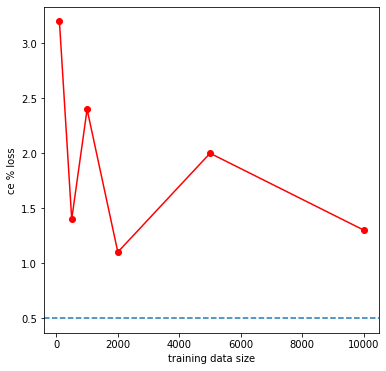

In [254]:
plt.figure(figsize=(6,6))
plt.axhline(y = 0.5,ls = "--",label = "bayes error")
plt.ylabel("ce % loss")
plt.xlabel("training data size")
plt.plot(data_size,ce_percnt_loss,"ro-",label ="50 % noise")
plt.savefig("50%noise_.pdf")

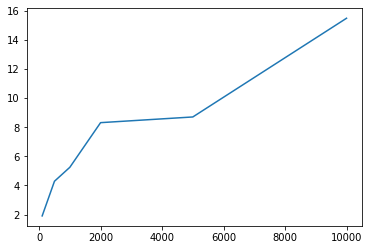

In [253]:
plt.plot(data_size,spectal_norm,label ="50 % noise")
